In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('/Users/amuratov/gits/EncodeNMF')


In [2]:
import OONMF
import OONMFhelpers as OH
import OONMFmetadata as OMD

In [3]:
today = OH.get_today()
k=16

usingCut = False
thecut = []


In [4]:
finname = 'ENCODE 733-sample list WM20180608 - ENCODE3 metadata 2-04-19.tsv'
MetaData  = pd.read_csv(finname, sep='\t')


In [5]:
MetaData.head()

,Included in 827-sample set?,Included in 665-sample set?,DCC SPOT1 >= 0.3?,DCC SPOT1 >= 0.25,DCC SPOT1 >= 0.2,TO BE INCLUDED,Candidate removal -- insert sizes & dupe rate,Candidate removal -- insert sizes,AG,LN,...,sample_dhs_protease_inhibitor,tissueculture_creation_date,fractionation_id,fractionation_method,fractionation_yield,fractionation_num_nuclei,BAM file,NMF component,Biosample protocol,Experiment protocol
0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,5636,1203,...,NaN,NaN,NaN,NaN,NaN,NaN,/net/seq/data/aggregations/LN1203/aggregation-...,lymphoid,Biosample protocol,Experiment protocol
1,Yes,Yes,Yes,Yes,Yes,Yes,No,No,5635,1207,...,NaN,NaN,NaN,NaN,NaN,NaN,/net/seq/data/aggregations/LN1207/aggregation-...,digestive,Biosample protocol,Experiment protocol
2,Yes,Yes,Yes,Yes,Yes,Yes,No,No,5634,1222,...,NaN,NaN,NaN,NaN,NaN,NaN,/net/seq/data/aggregations/LN1222/aggregation-...,lymphoid,Biosample protocol,Experiment protocol
3,Yes,Yes,Yes,Yes,Yes,Yes,No,No,4219,1264,...,NaN,NaN,NaN,NaN,NaN,NaN,/net/seq/data/aggregations/LN1264/aggregation-...,epithelial,Biosample protocol,Experiment protocol
4,Yes,Yes,Yes,Yes,Yes,Yes,No,No,4218,1269,...,NaN,NaN,NaN,NaN,NaN,NaN,/net/seq/data/aggregations/LN1269/aggregation-...,tissue-invariant,Biosample protocol,Experiment protocol


In [6]:
MetaData.shape

(733, 78)

In [7]:
sampnamePD = pd.read_table('sampnams_733.txt', header=None, names=['LN', 'DS', 'type'])
sampnamePD['full_name'] = sampnamePD.LN + '-' + sampnamePD.DS + '-' + sampnamePD.type

In [8]:
decomp = OONMF.NMFobject(theNcomps=k)


In [9]:
decomp.Basis_Names = sampnamePD.full_name.values


In [10]:
decomp.matrix_input_name(Basis_finname='2018-06-08NC16_NNDSVD_Basis.npy', Mixture_finname='2018-06-08NC16_NNDSVD_Mixture.npy')


In [11]:
decomp.read_matrix_input()


In [12]:
rosetta = OMD.get_rosetta(MetaData, decomp.Basis_Names)

In [13]:
categories = ['system', 'organ','Biological_state','subsystem','Sex','germ layer', 'Growth stage', 'class', 'lib_kit_method', 'Sample_group', 'Candidate removal -- insert sizes & dupe rate', 'Candidate removal -- insert sizes', 'Donor_ID', 'Ethnicity', 'lib_cleanup', 'sample_dhs_protease_inhibitor']

In [14]:
from scipy.stats import mannwhitneyu

*****************
Category  0 Hematopoietic
*****************
Category  1 Renal
*****************
Category  2 Connective
*****************
Category  3 Musculoskeletal
*****************
Category  4 Nervous
*****************
Category  5 Digestive
*****************
Category  6 Cardiovascular
*****************
Category  7 Respiratory
*****************
Category  8 Embryonic
*****************
Category  9 Integumentary
*****************
Category  10 Epithelial
*****************
Category  11 Fetal Life Support
*****************
Category  12 Genitourinary
*****************
Category  13 Endocrine
*****************
Category  14 Hepatic


<Figure size 432x288 with 0 Axes>

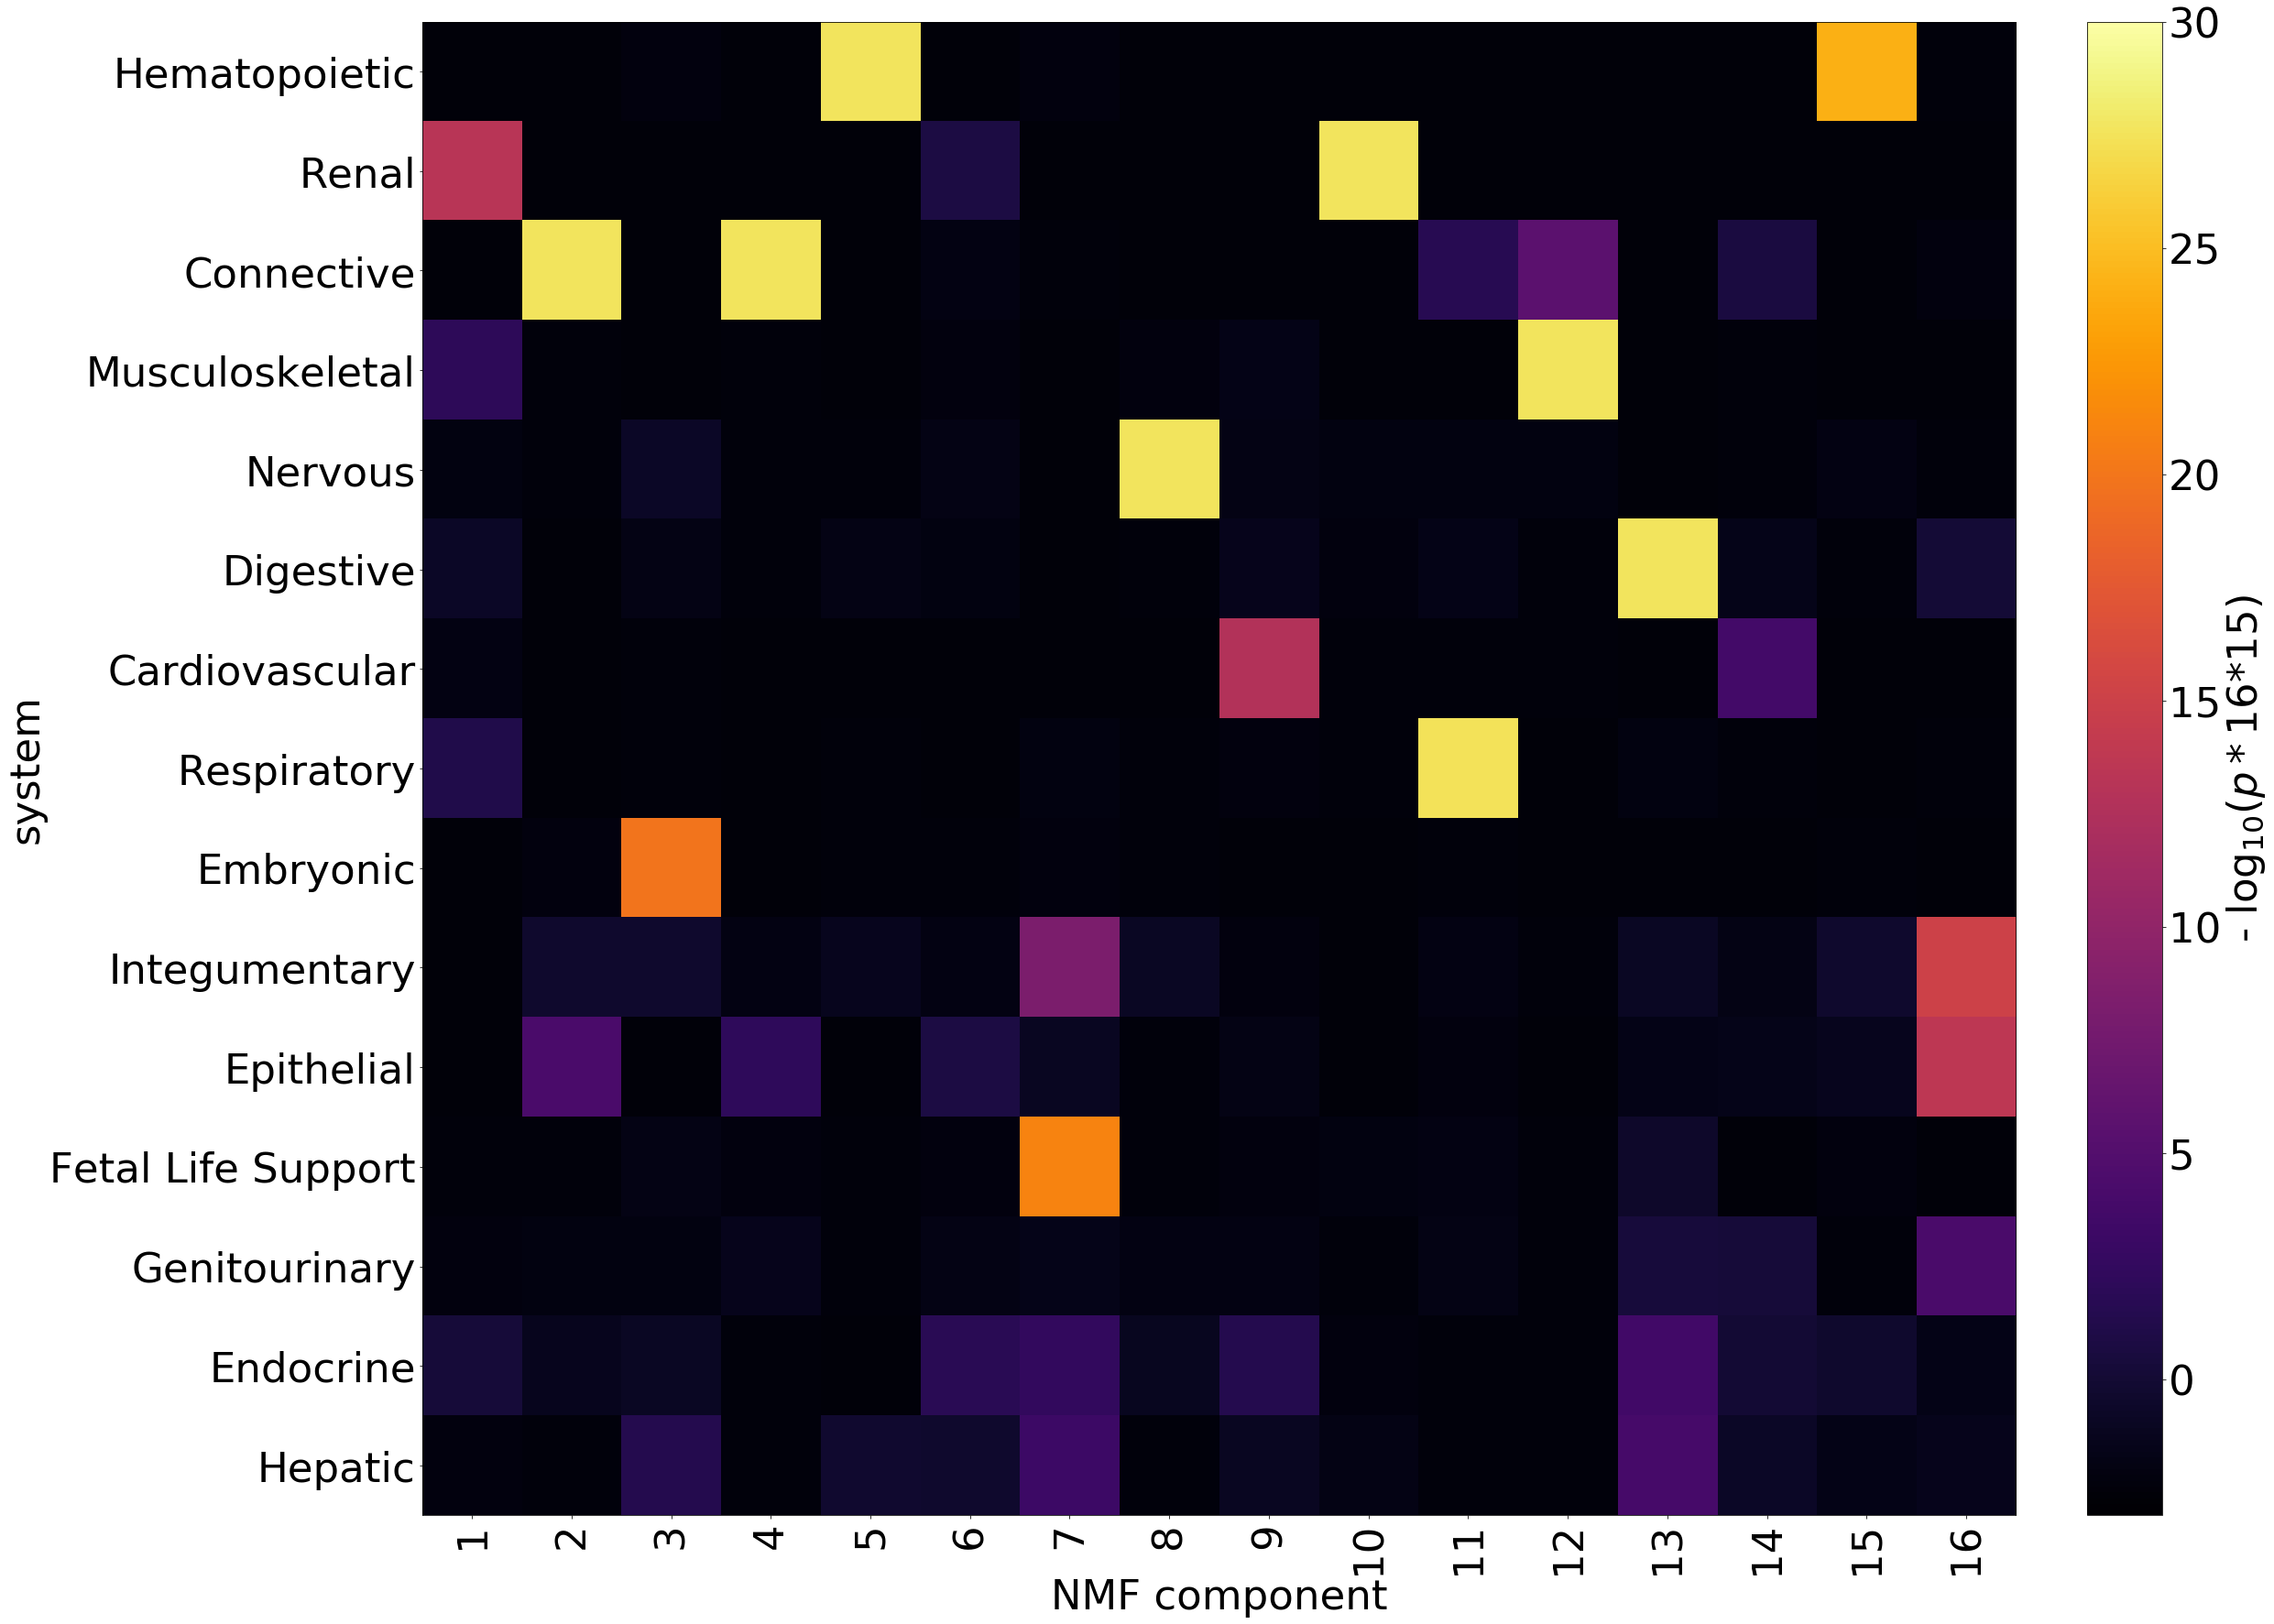

*****************
Category  0 Blood
*****************
Category  1 Kidney
*****************
Category  2 Skin
*****************
Category  3 Lung
*****************
Category  4 Muscle
*****************
Category  5 Brain
*****************
Category  6 Heart
*****************
Category  7 Germ
*****************
Category  8 Placenta
*****************
Category  9 Eye
*****************
Category  10 Colon
*****************
Category  11 Mammary
*****************
Category  12 Stomach
*****************
Category  13 Large Intestine
*****************
Category  14 Bone
*****************
Category  15 Small Intestine
*****************
Category  16 Spinal Cord
*****************
Category  17 Adrenal Gland
*****************
Category  18 Liver
*****************
Category  19 Prostate


<Figure size 432x288 with 0 Axes>

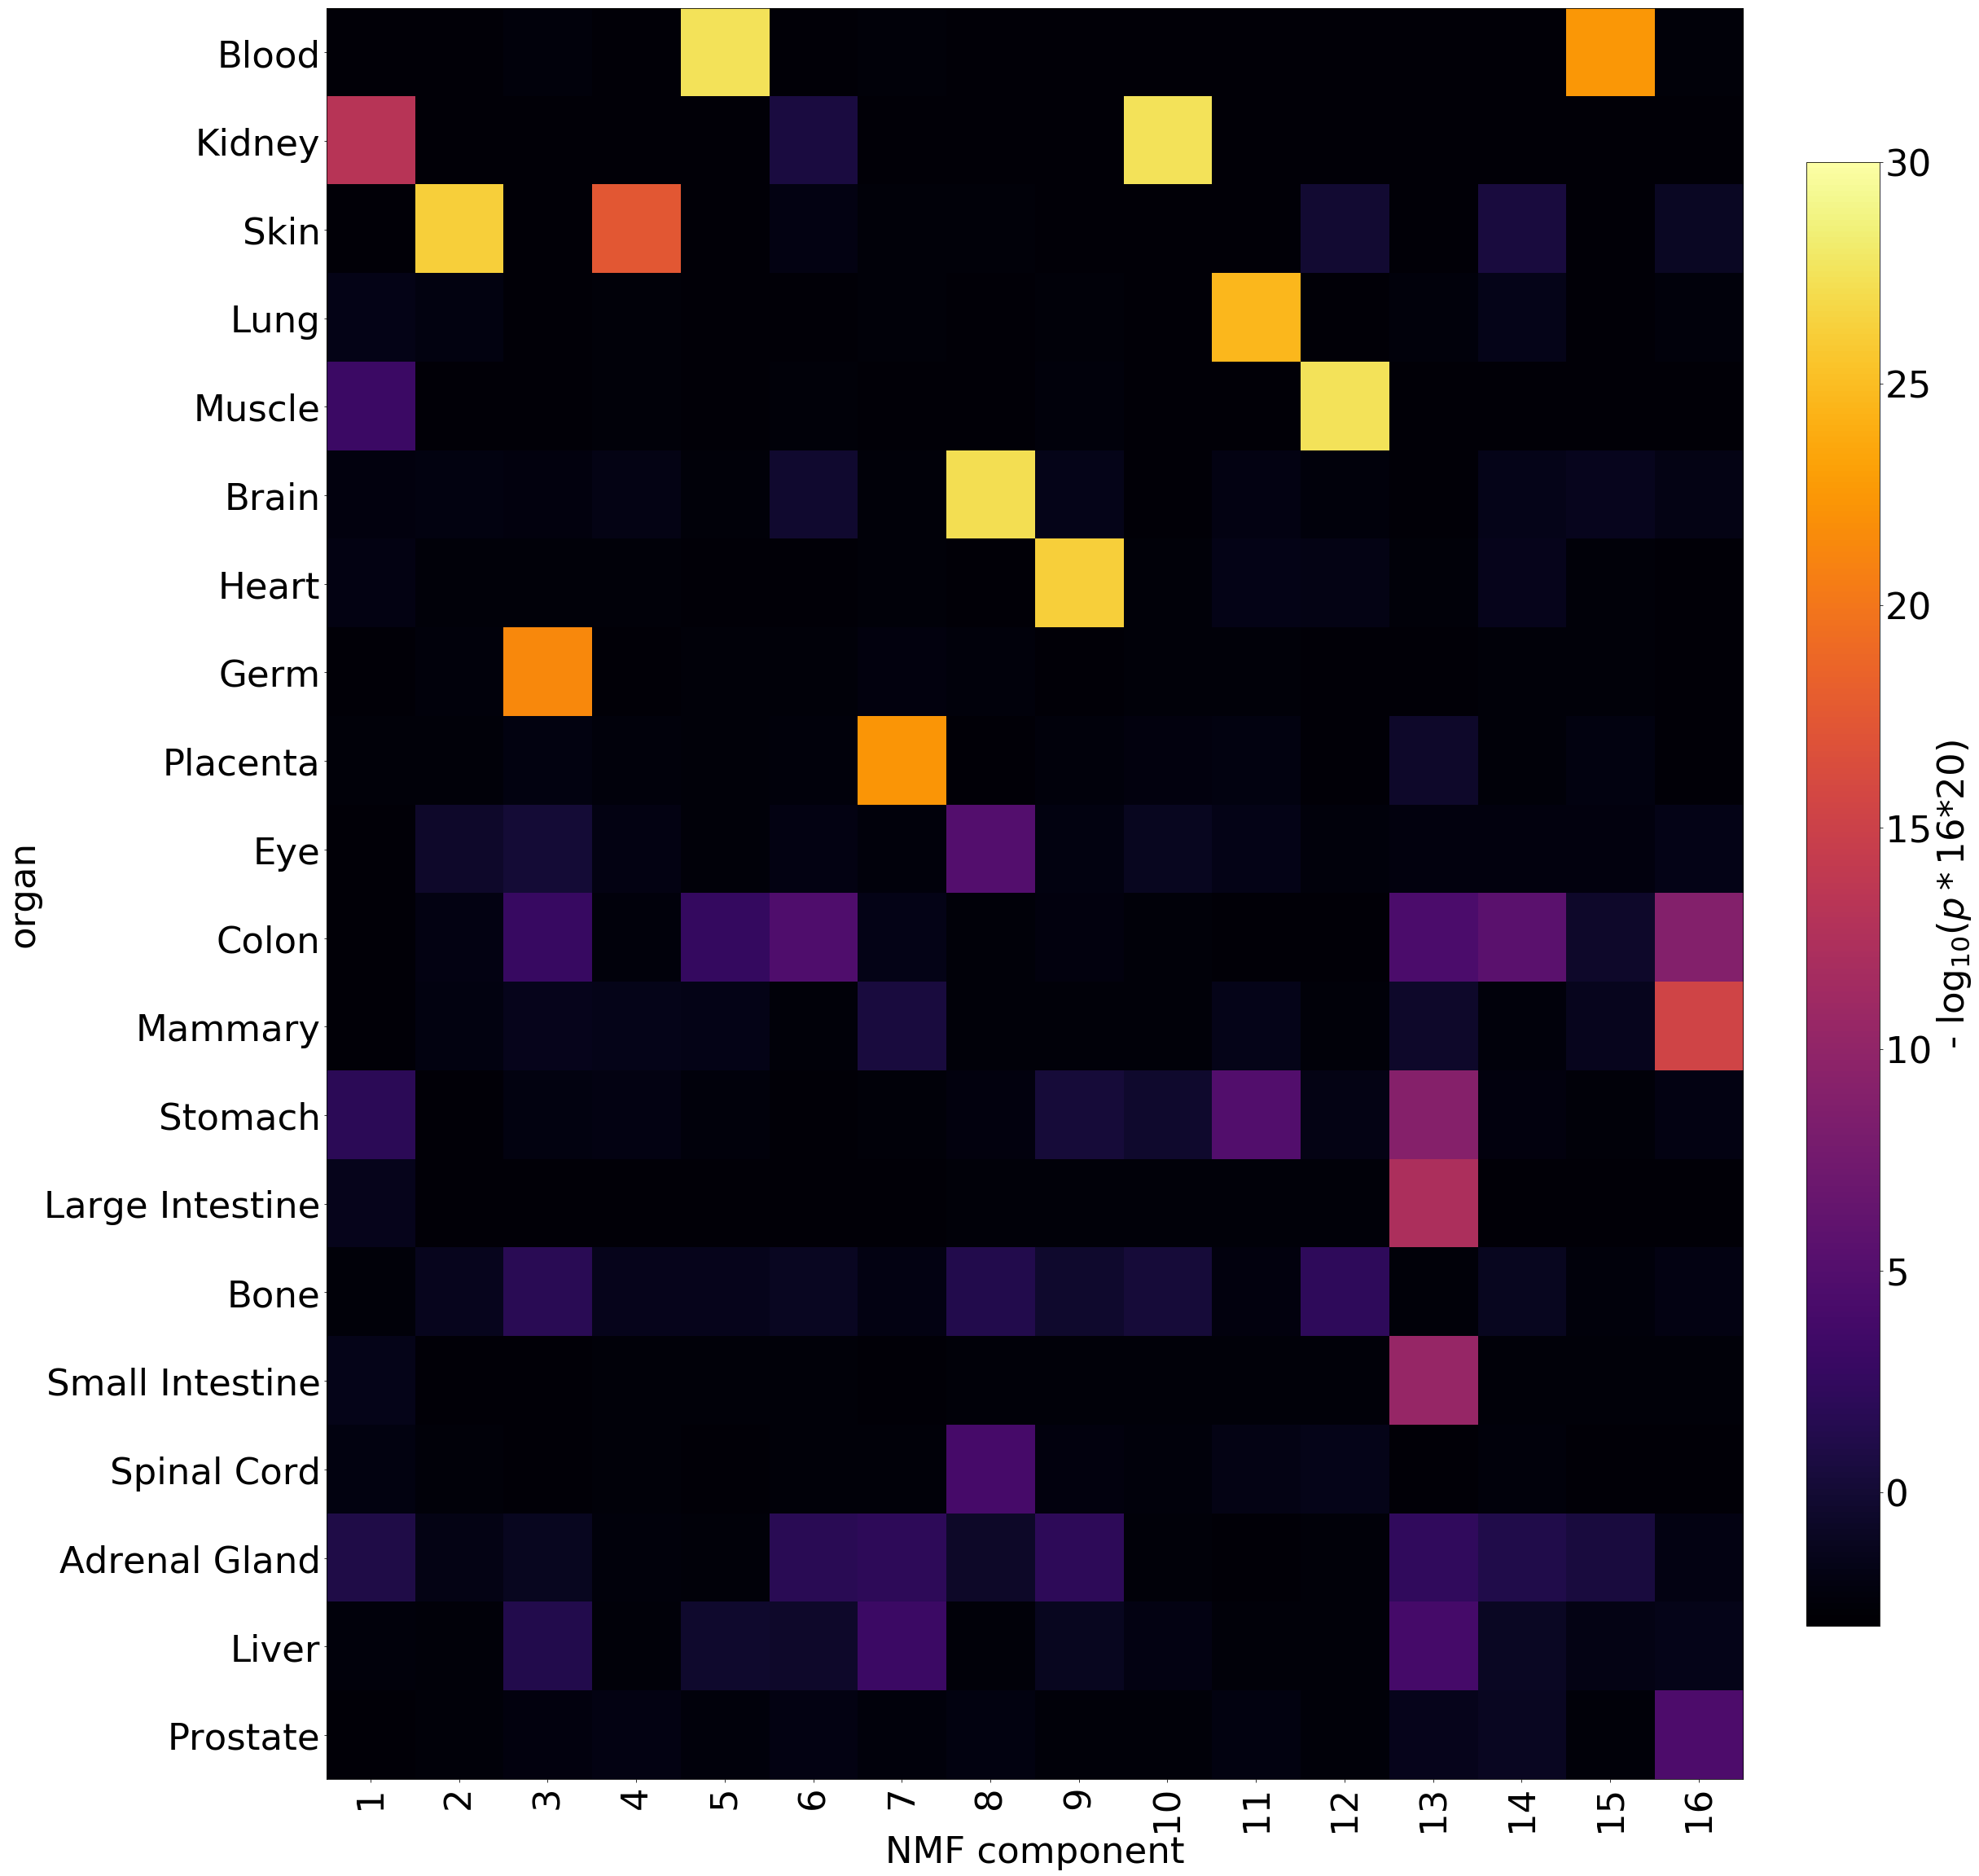

*****************
Category  0 Primary
*****************
Category  1 Cancer
*****************
Category  2 Immortalized
*****************
Category  3 ESC
*****************
Category  4 Stem Cells
*****************
Category  5 iPSC


<Figure size 432x288 with 0 Axes>

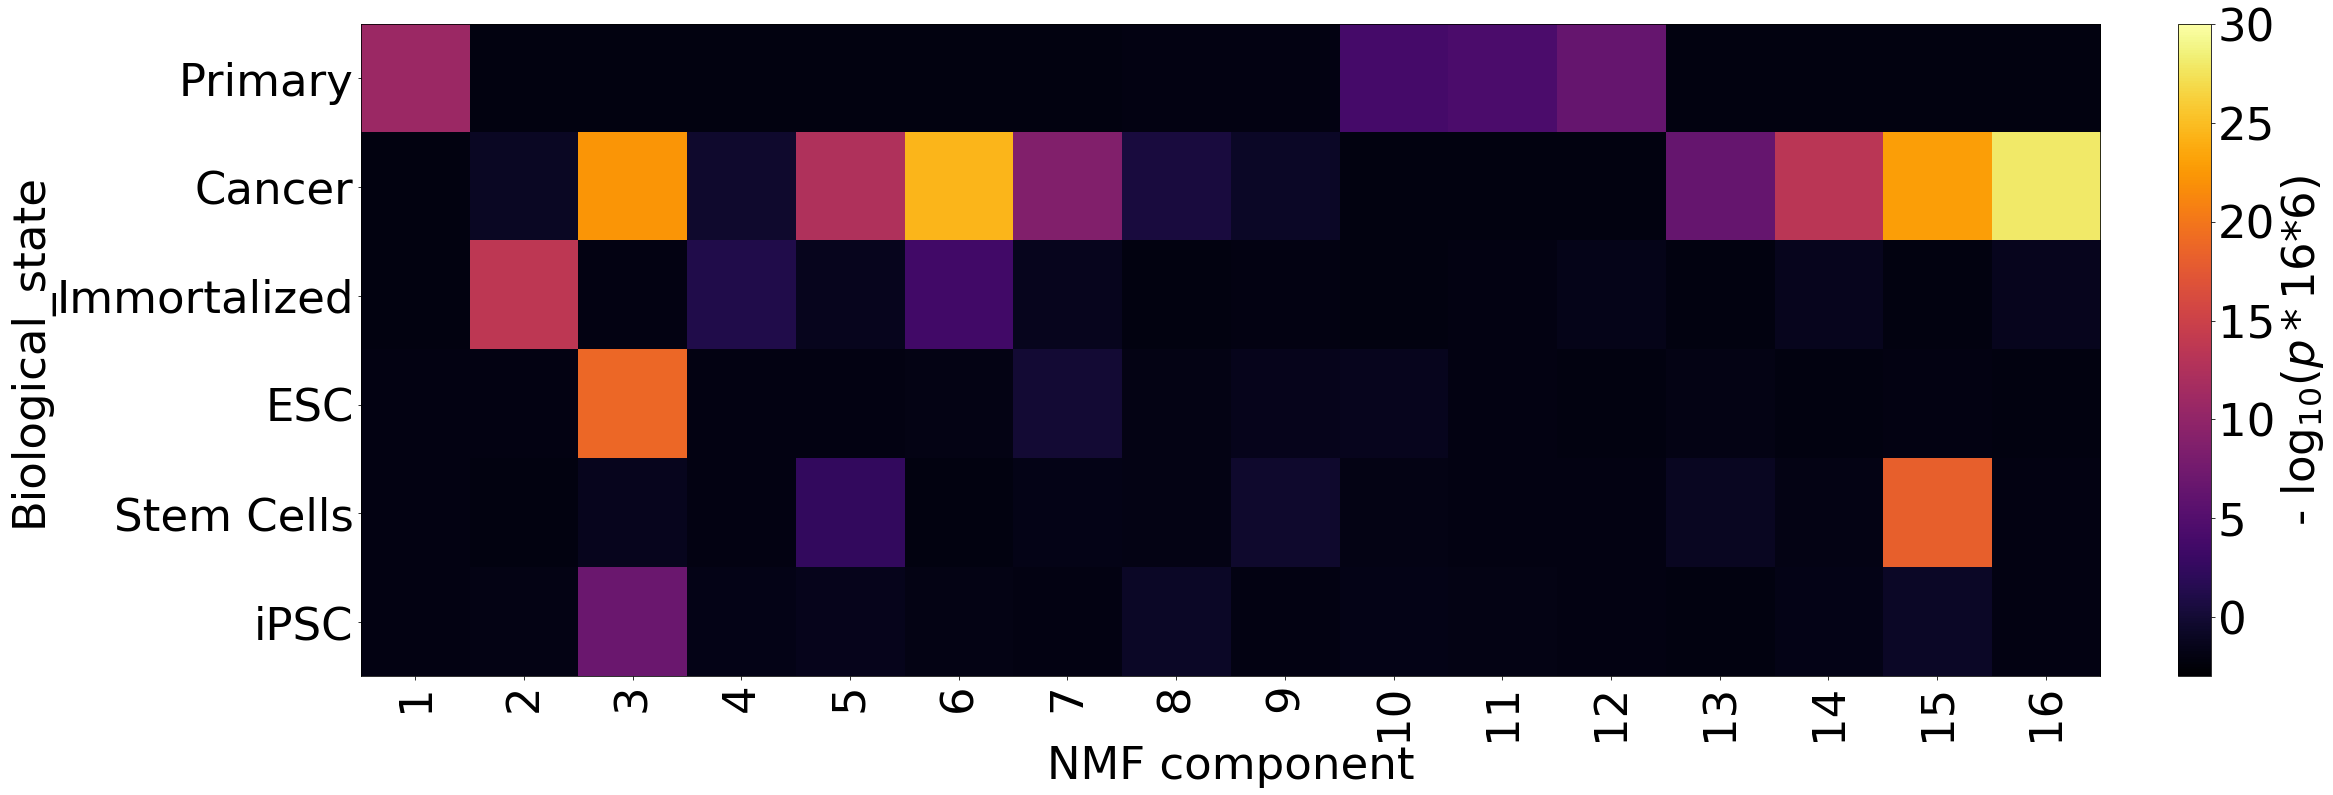

*****************
Category  0 None
*****************
Category  1 Skeletal Muscle
*****************
Category  2 T-cell
*****************
Category  3 Cardiac
*****************
Category  4 Lymphoid
*****************
Category  5 Vascular
*****************
Category  6 Progenitor
*****************
Category  7 Erythroid
*****************
Category  8 Myeloid
*****************
Category  9 Cardiac Muscle
*****************
Category  10 Smooth Muscle


<Figure size 432x288 with 0 Axes>

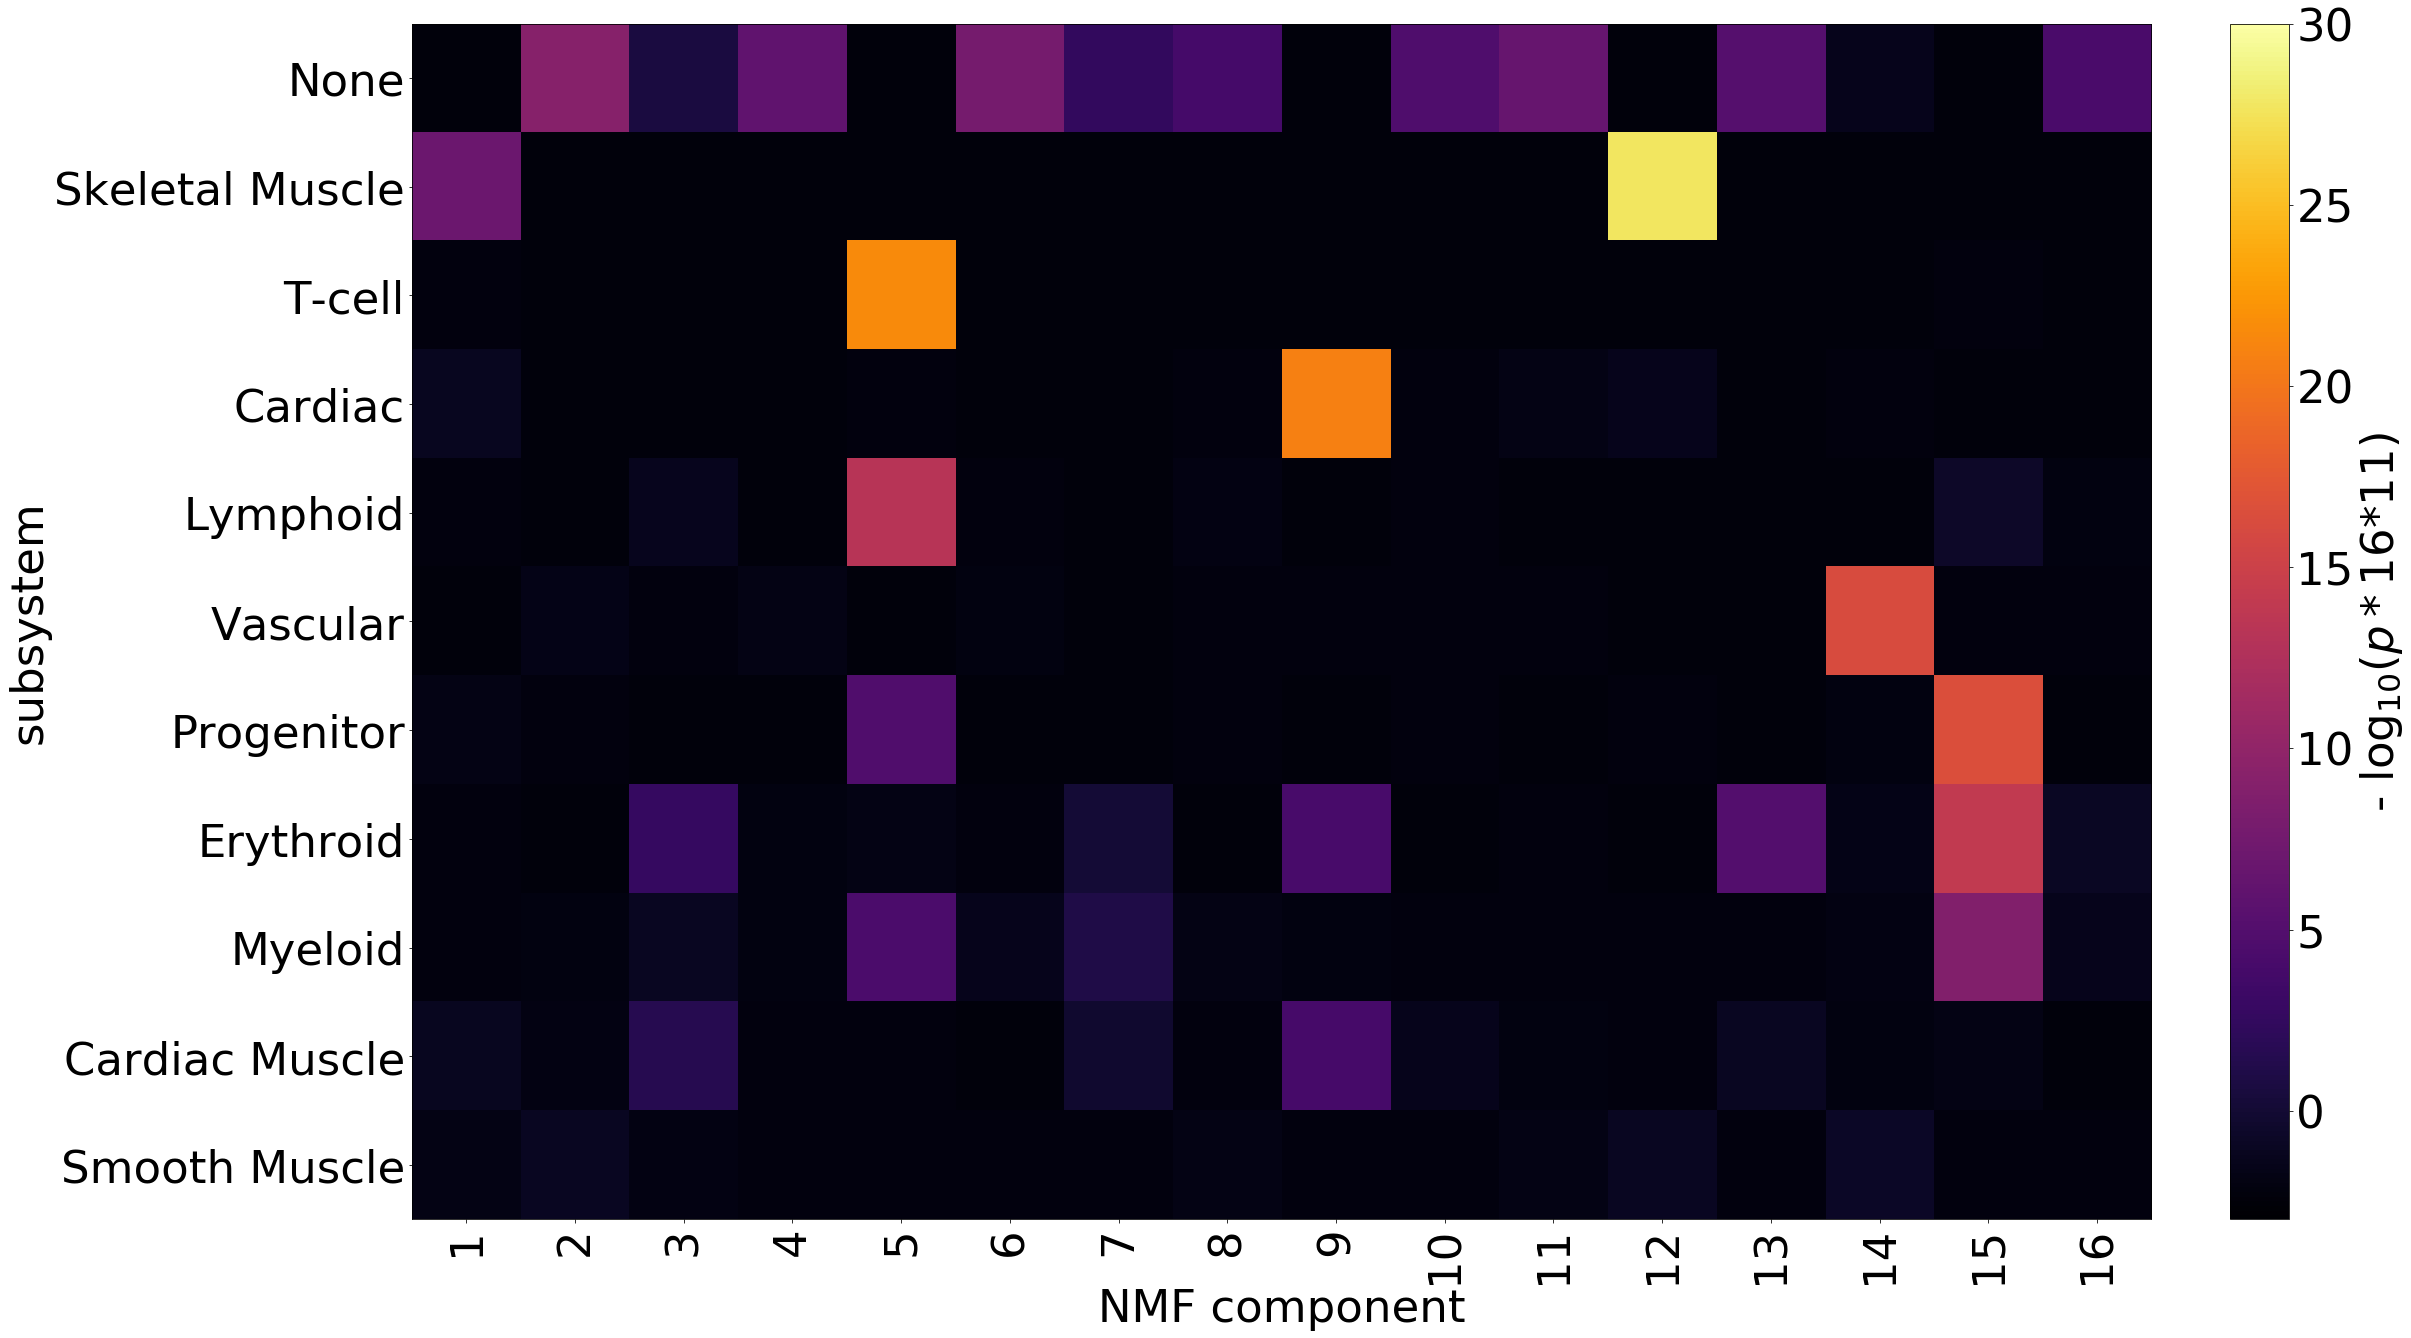

*****************
Category  0 M
*****************
Category  1 F
*****************
Category  2 None
*****************
Category  3 U
*****************
Category  4 F?


<Figure size 432x288 with 0 Axes>

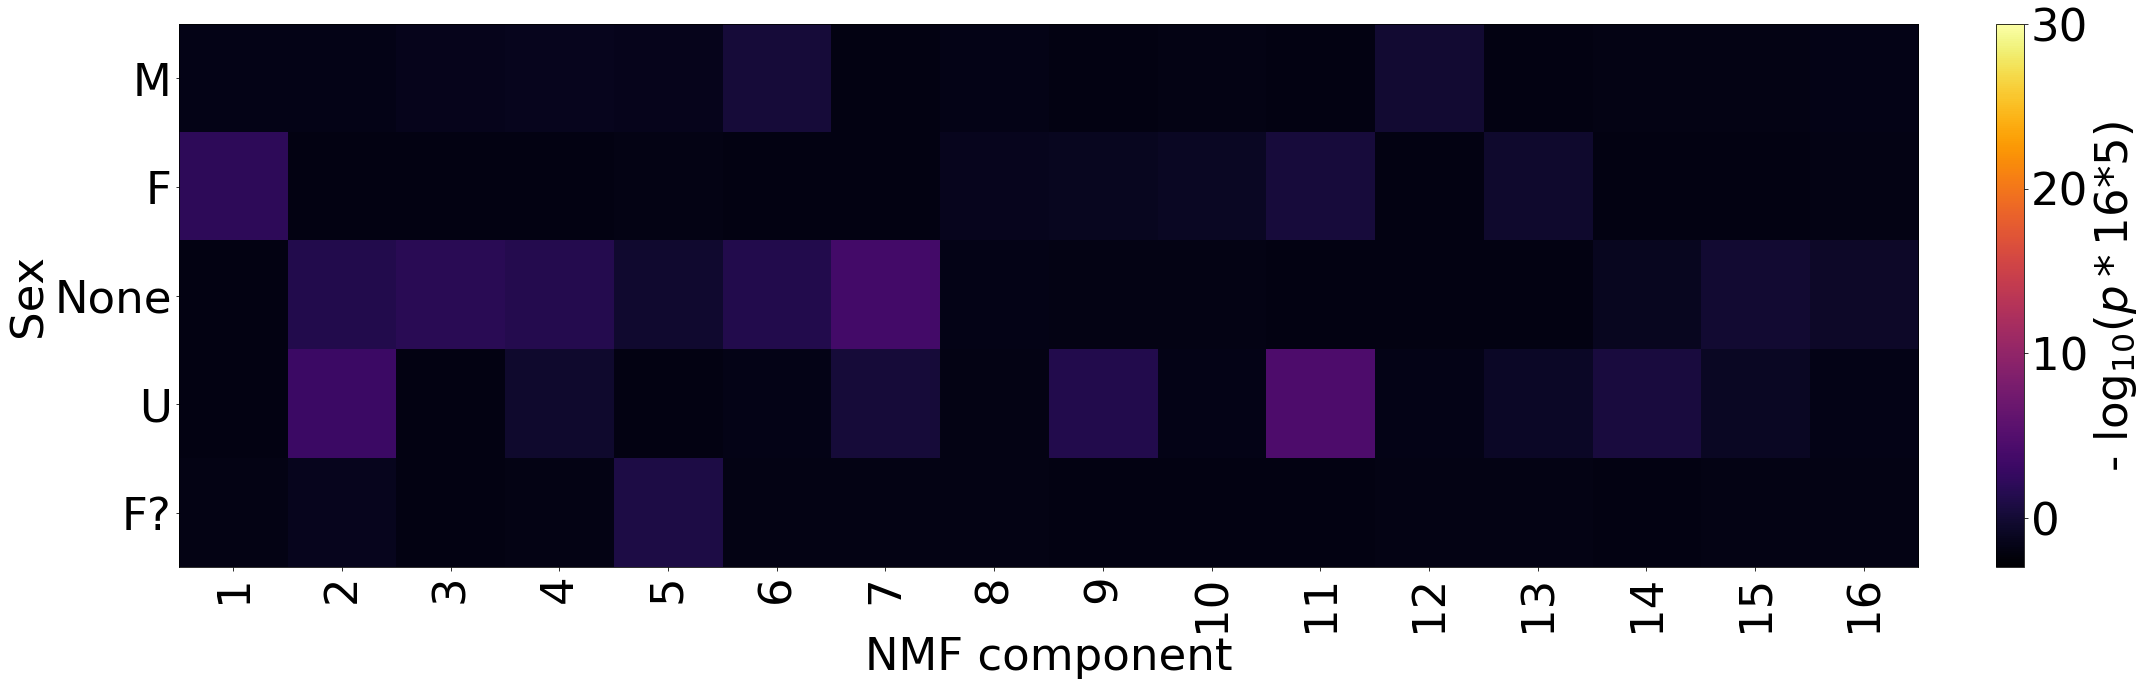

*****************
Category  0 Mesoderm
*****************
Category  1 Endoderm
*****************
Category  2 Ectoderm
*****************
Category  3 Primitive


<Figure size 432x288 with 0 Axes>

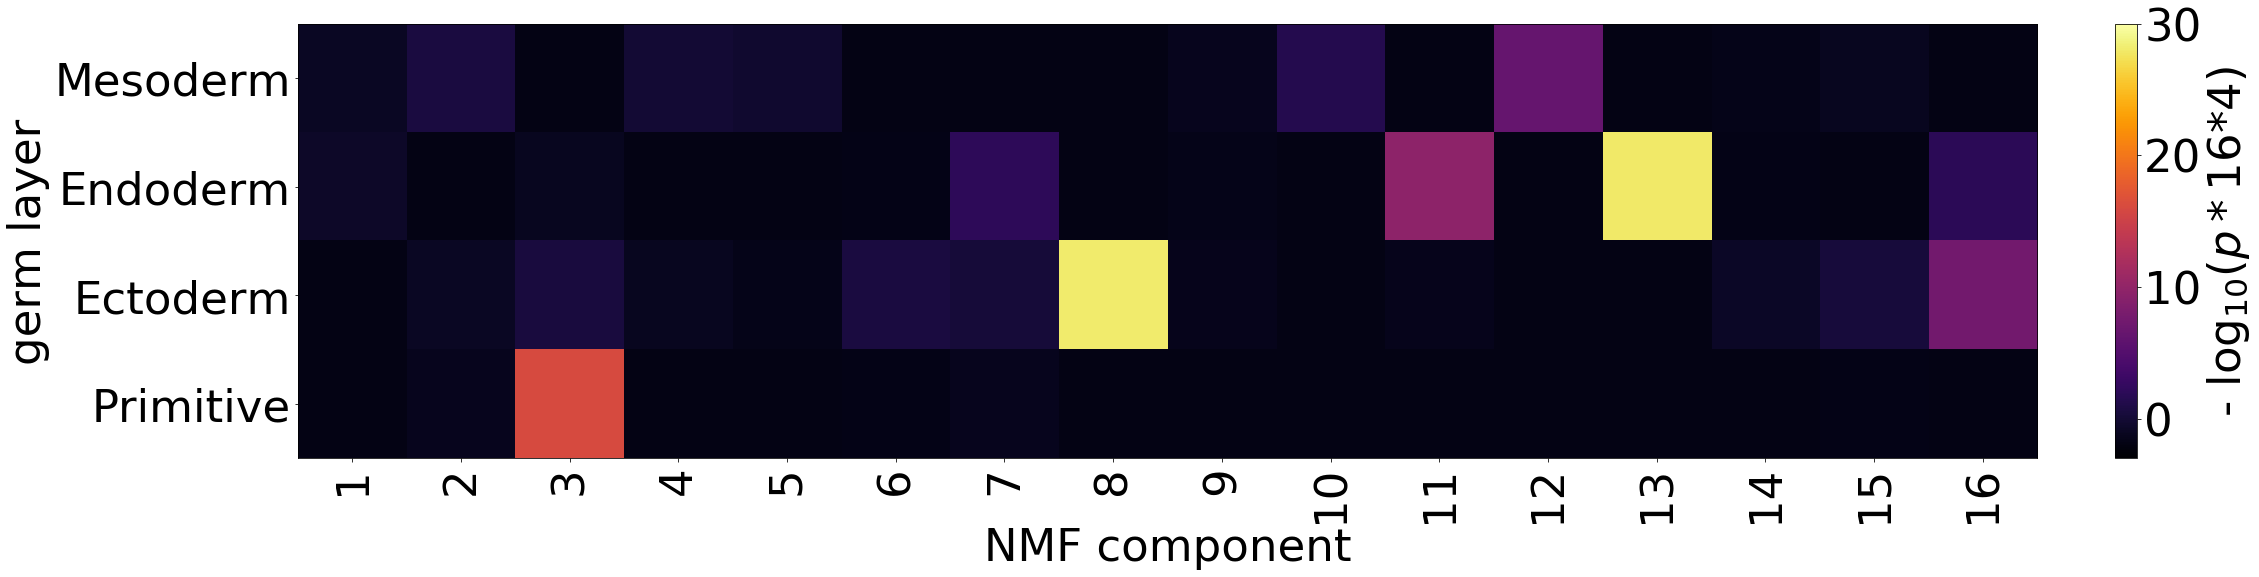

*****************
Category  0 Fetal
*****************
Category  1 Adult
*****************
Category  2 Neonatal
*****************
Category  3 Child
*****************
Category  4 Embryonic


<Figure size 432x288 with 0 Axes>

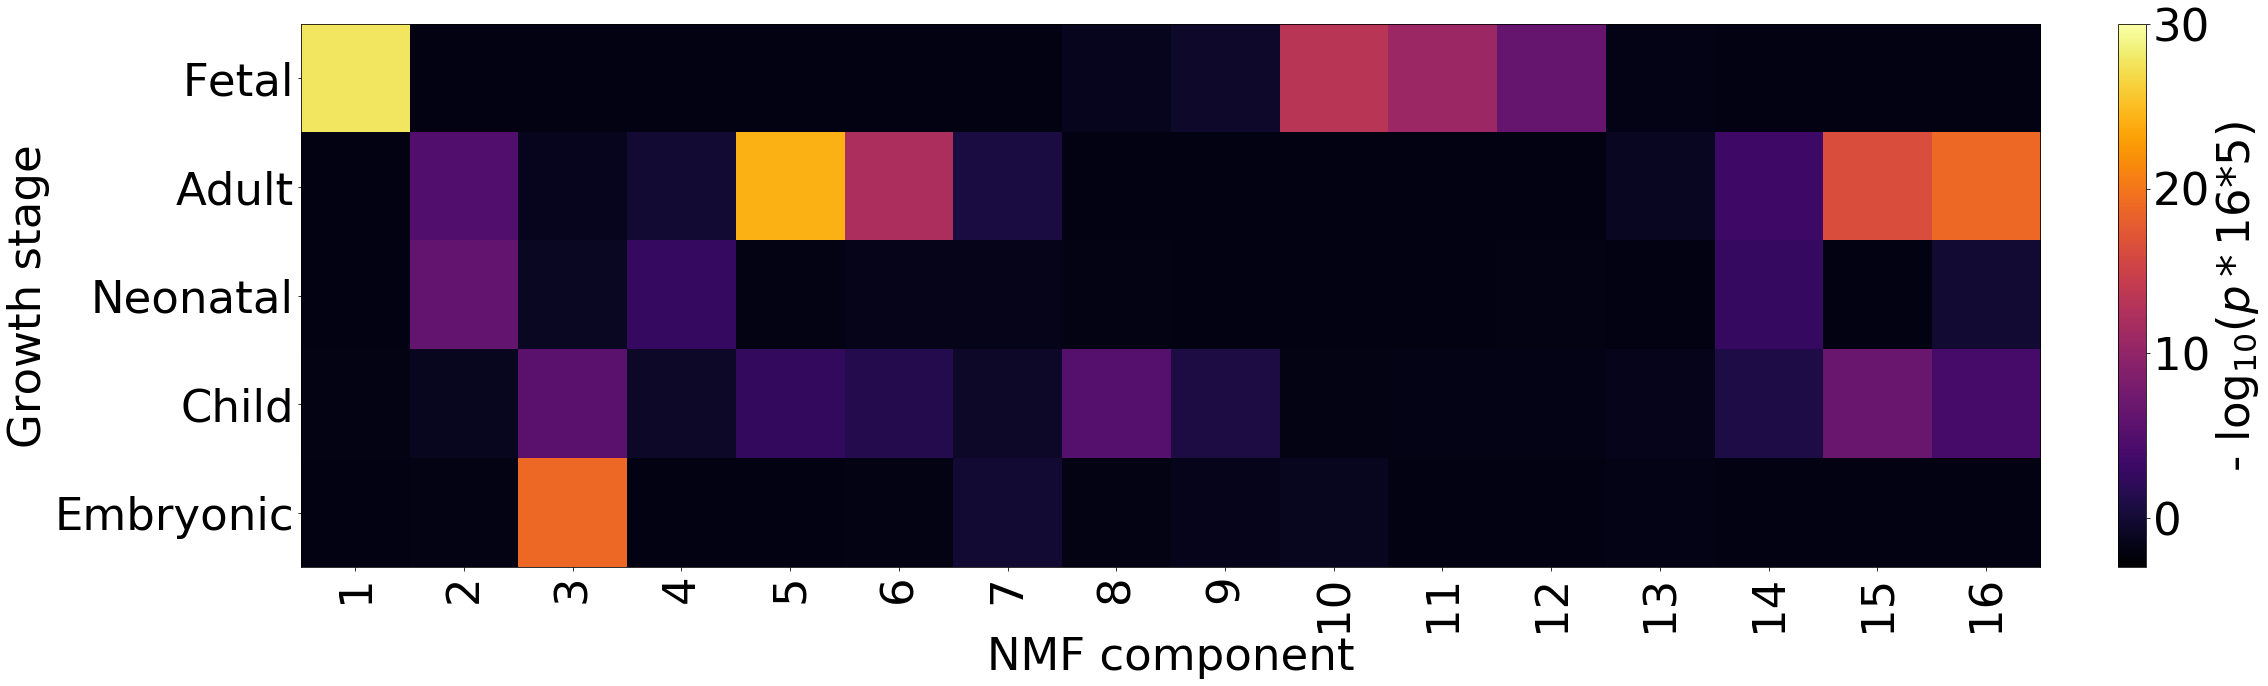

*****************
Category  0 Fetal
*****************
Category  1 Lines
*****************
Category  2 Primary
*****************
Category  3 Adult


<Figure size 432x288 with 0 Axes>

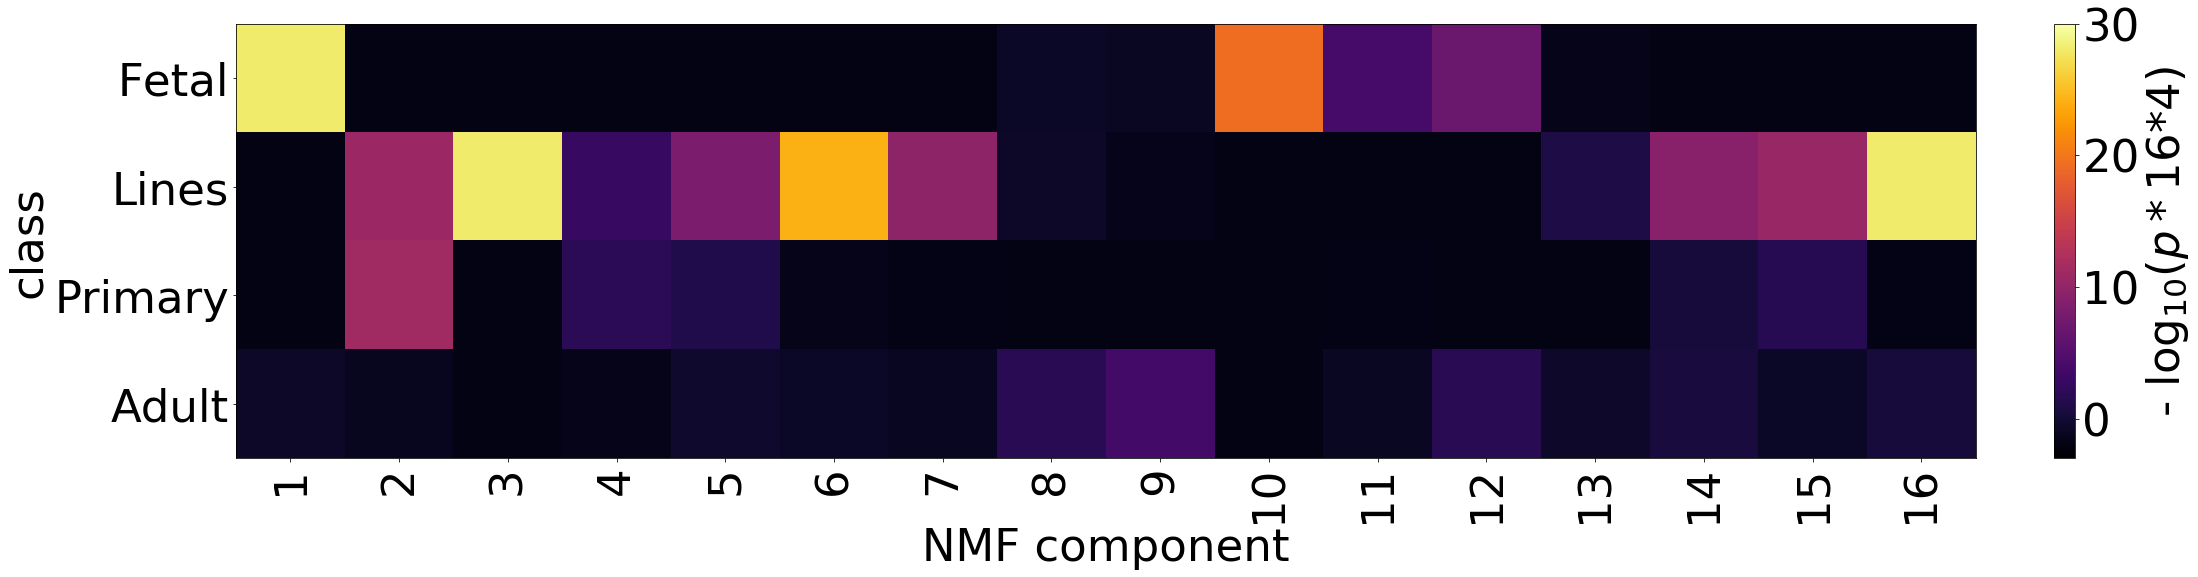

*****************
Category  0 PE
*****************
Category  1 TS
*****************
Category  2 In-PE
*****************
Category  3 None
*****************
Category  4 FC-121-2001 DNA TruSeq v2-Set A
*****************
Category  5 FC-121-1001 DNA TruSeq - Set A
*****************
Category  6 FC-121-2002 DNA TruSeq v2-Set B
*****************
Category  7 Thruplex DNA-Seq Q
*****************
Category  8 Mondrian_8033-32_DNA_Ovation_SP_Ultralow
*****************
Category  9 Molly's
*****************
Category  10 SSlib-JV7Q
*****************
Category  11 Thruplex DNA-Seq H
*****************
Category  12 SSlib-JV5
*****************
Category  13 Jeff's ssDNA protocol (T4) CL78v8
*****************
Category  14 PE-I
*****************
Category  15 Jeff's ssDNA protocol (T4)
*****************
Category  16 SSlib-JV7
*****************
Category  17 FC-121-1002 DNA TruSeq –Set B
*****************
Category  18 SSlib-jv6
*****************
Category  19 SSlib-JV8


<Figure size 432x288 with 0 Axes>

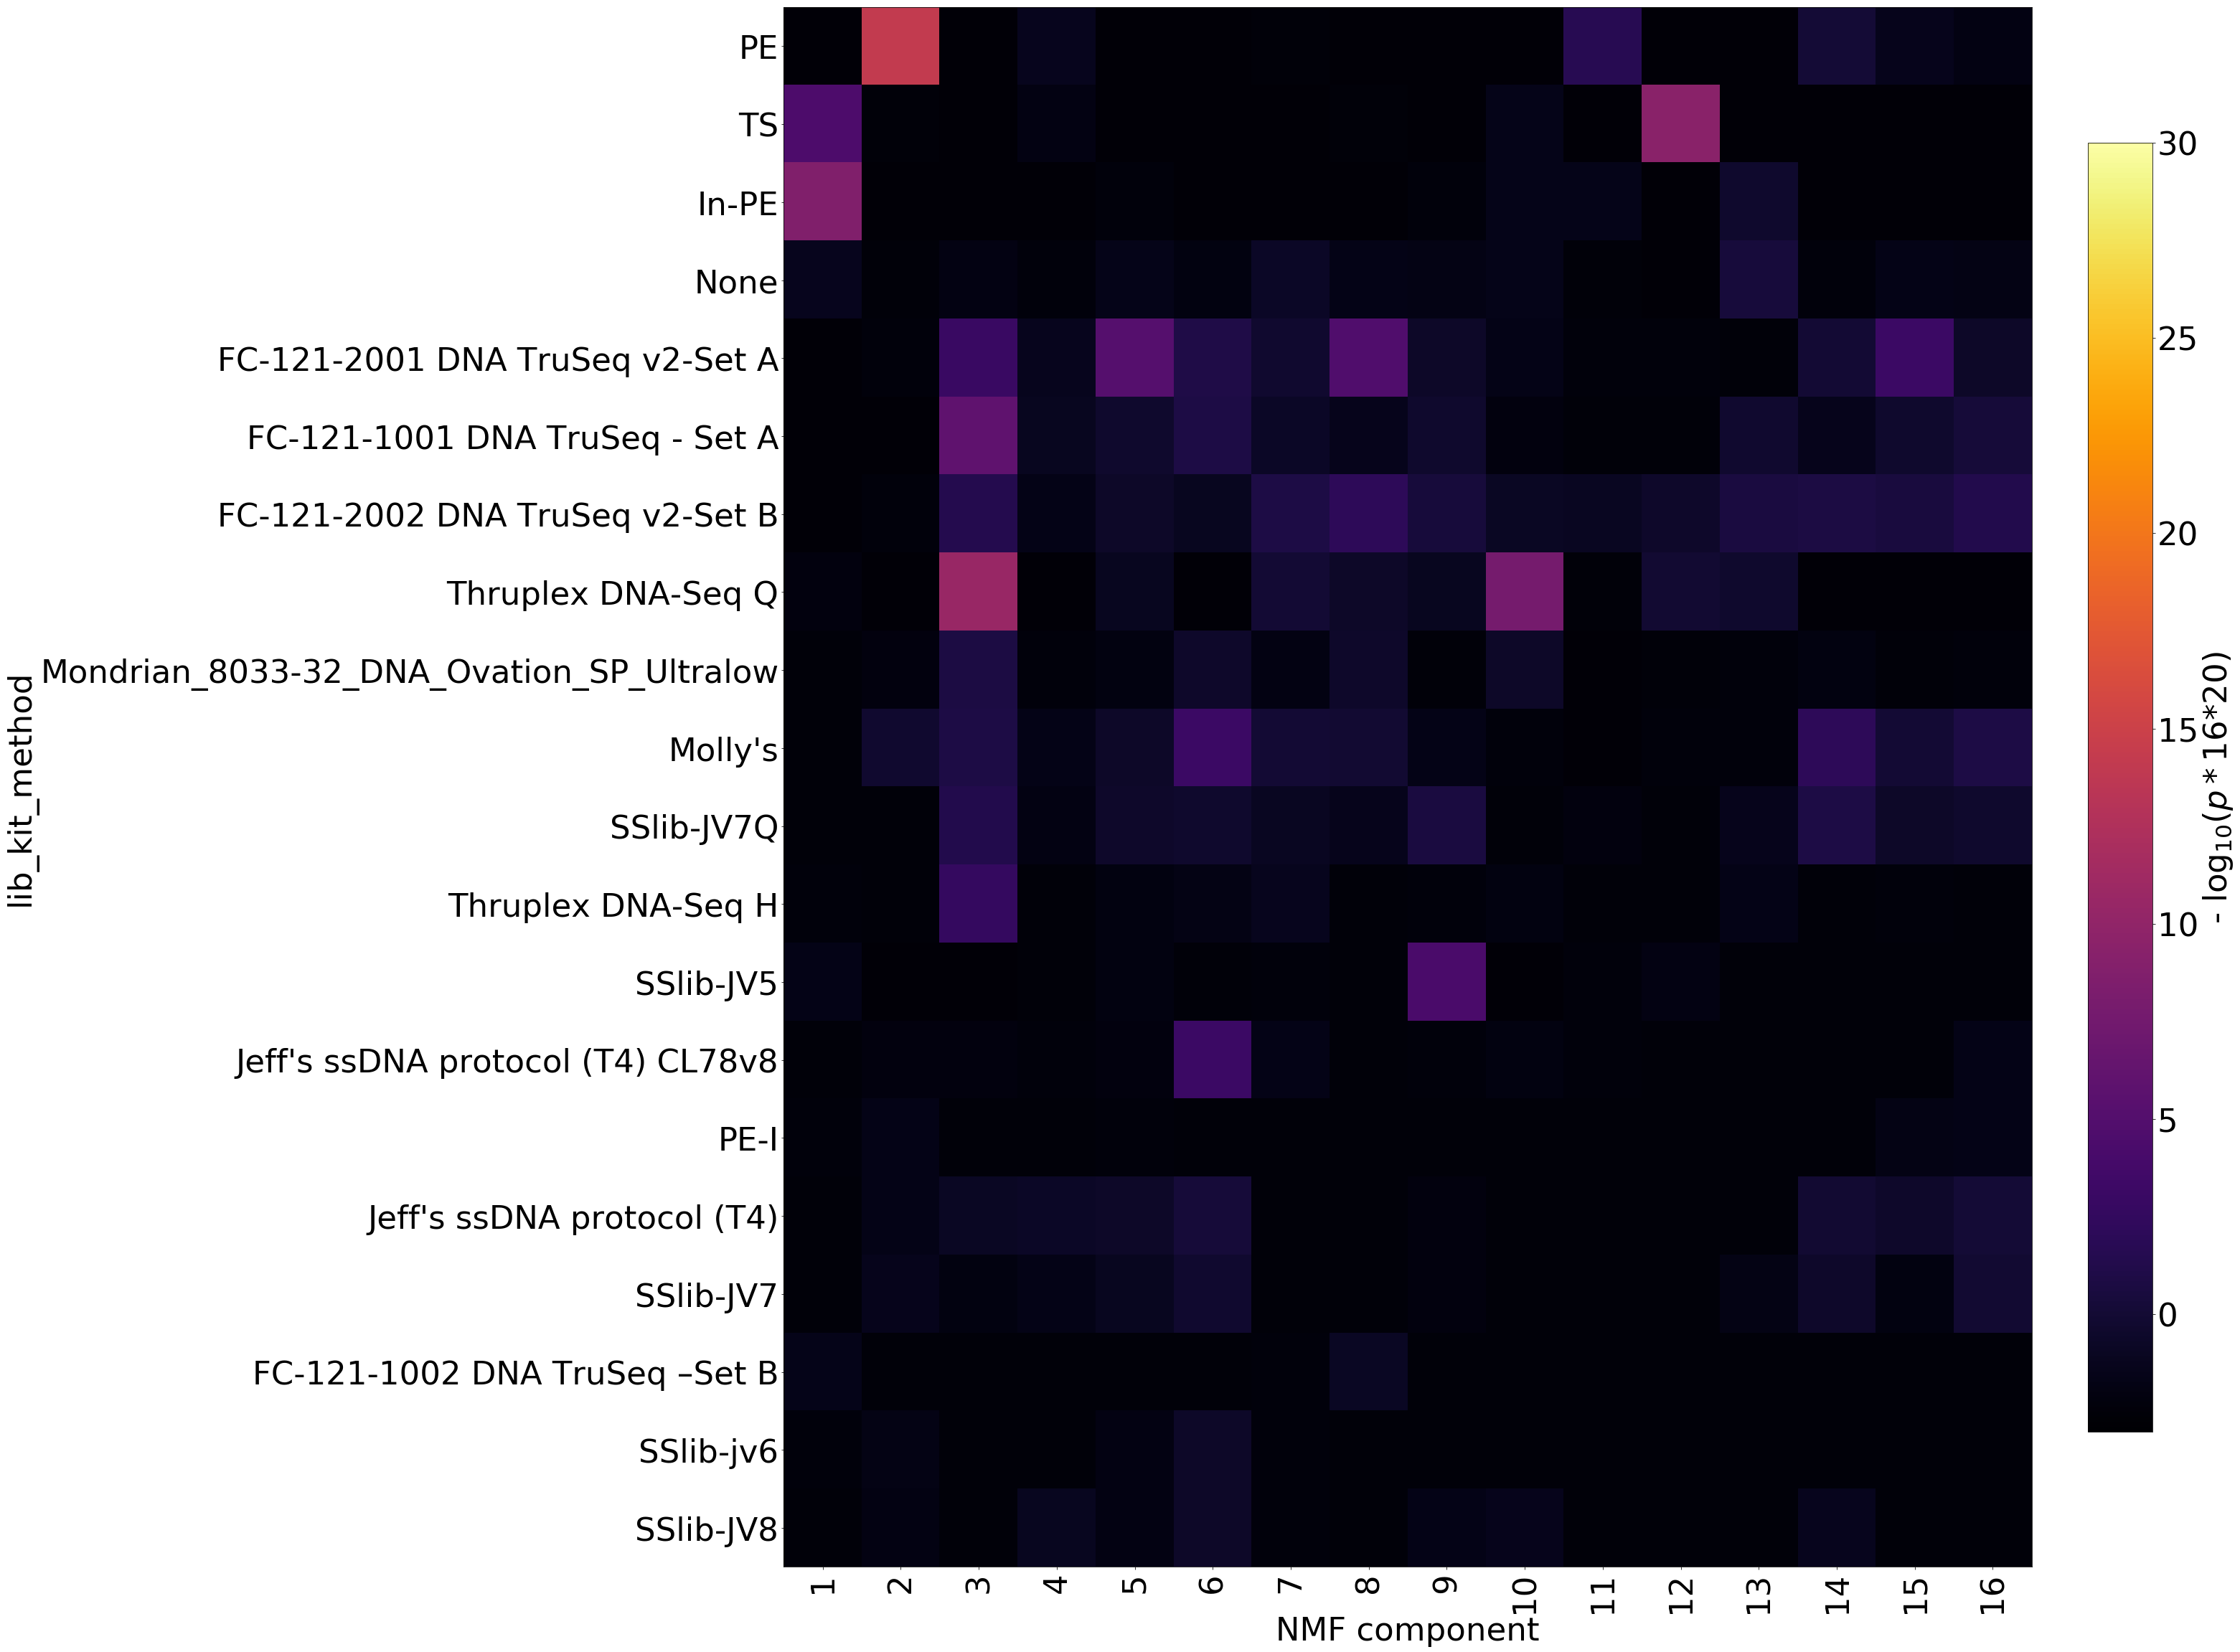

*****************
Category  0 Primary
*****************
Category  1 Cancer
*****************
Category  2 Lines


<Figure size 432x288 with 0 Axes>

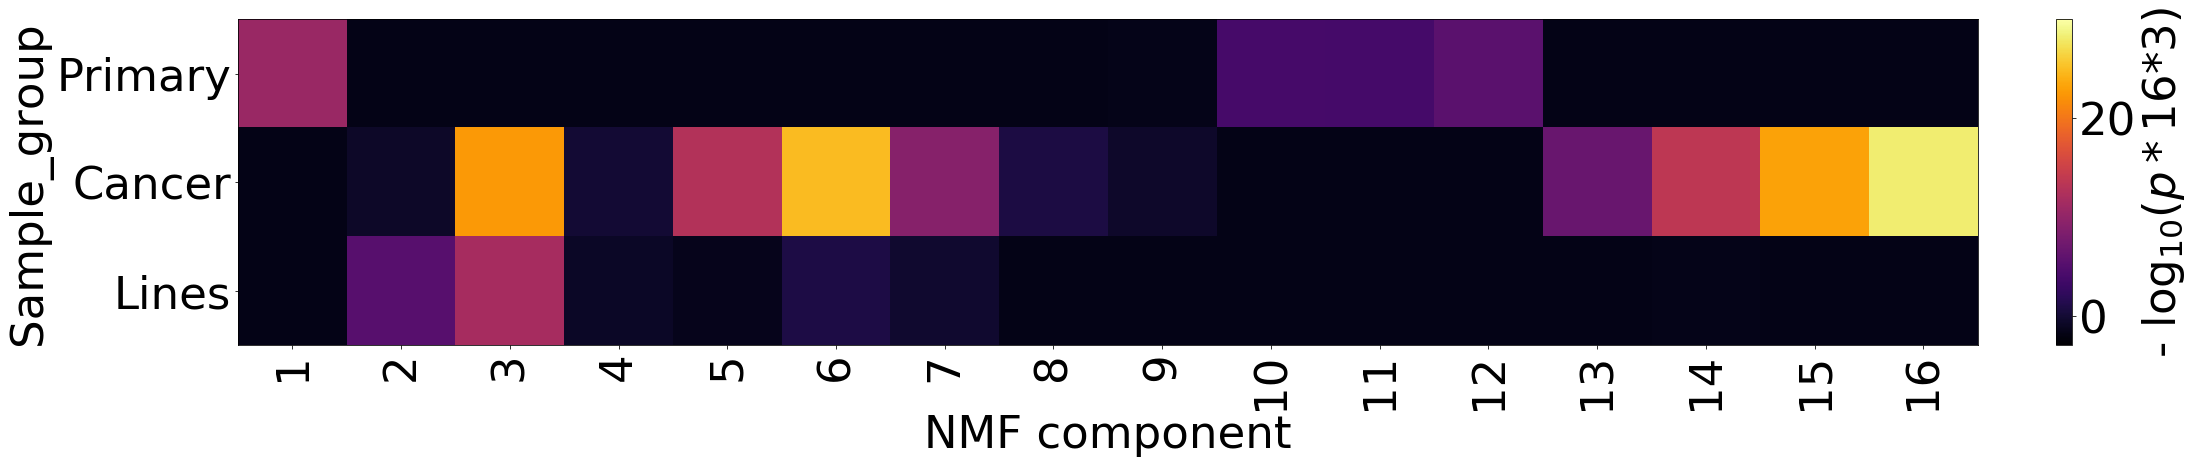

*****************
Category  0 No
*****************
Category  1 Yes


<Figure size 432x288 with 0 Axes>

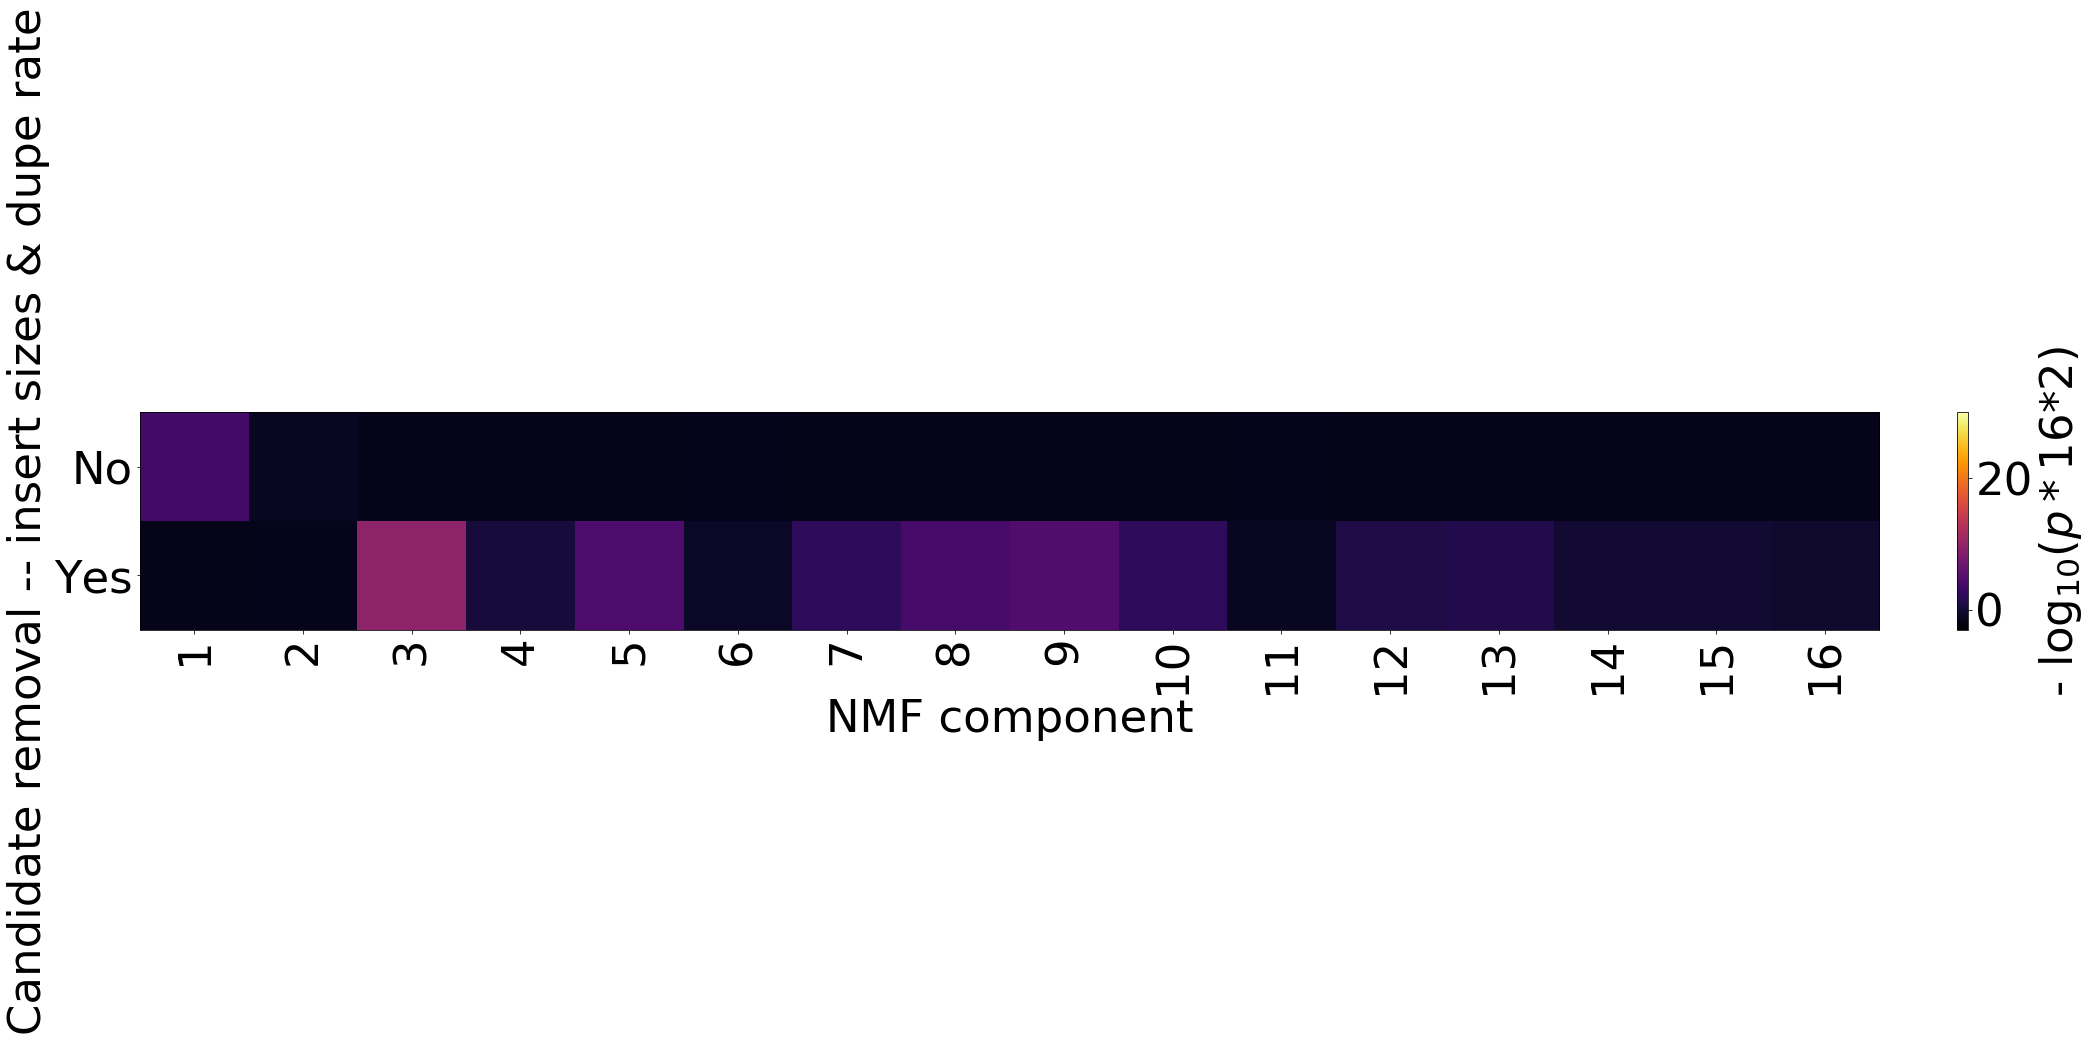

*****************
Category  0 No
*****************
Category  1 Yes


<Figure size 432x288 with 0 Axes>

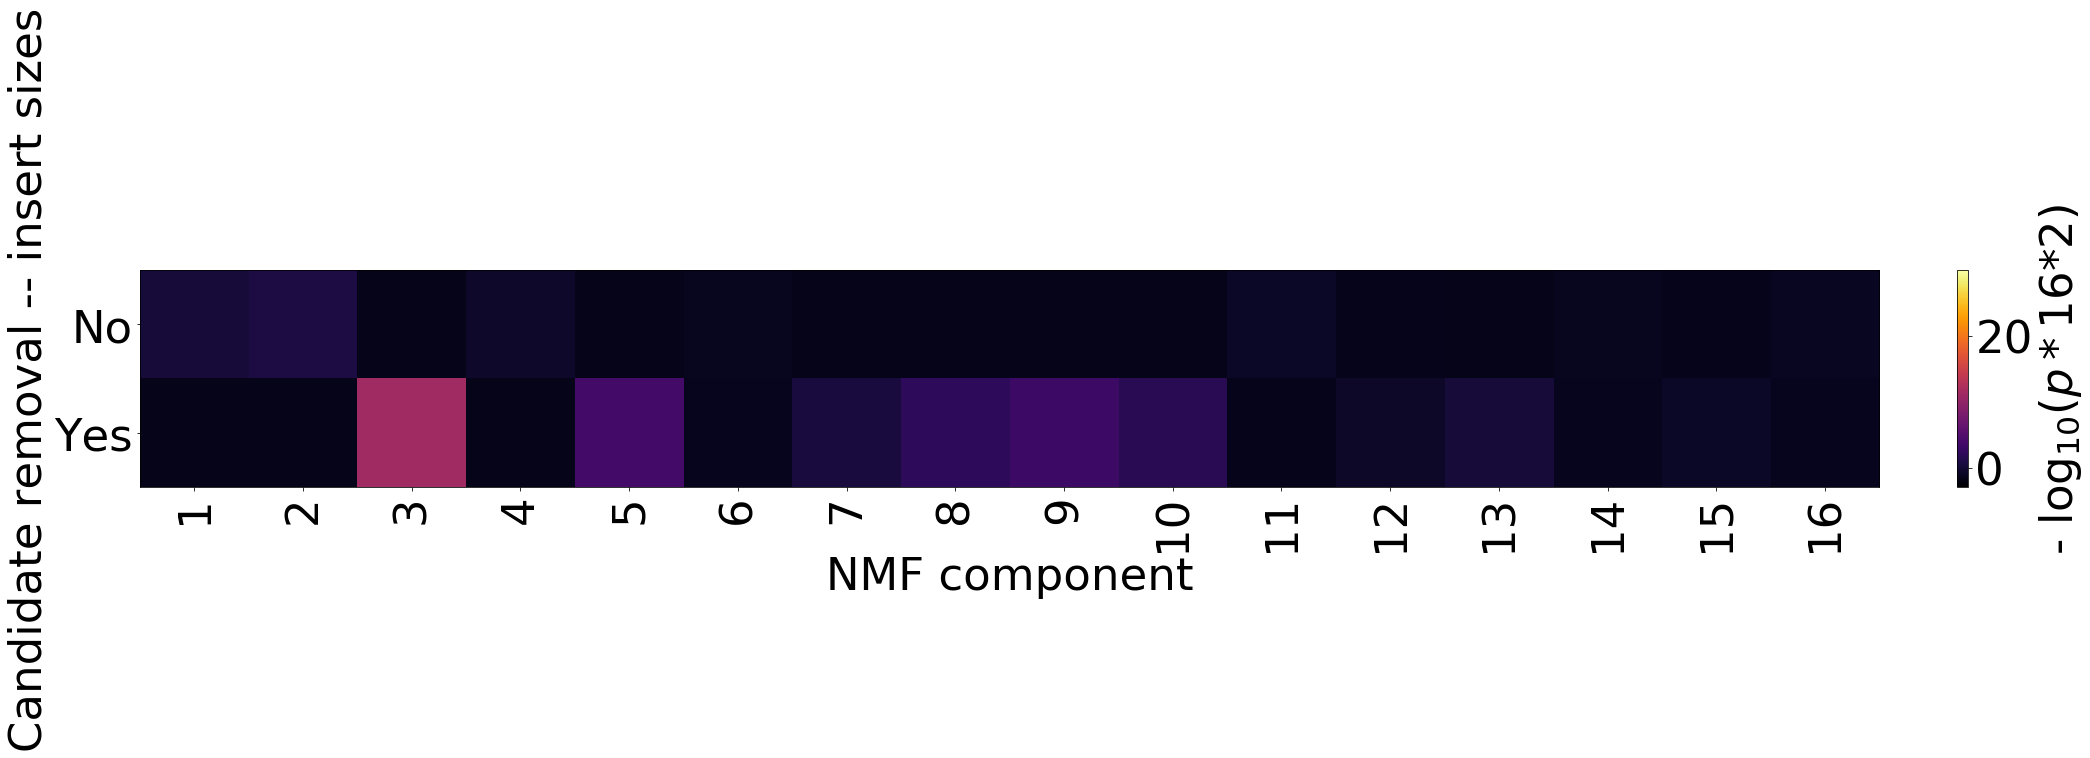

*****************
Category  0 None
*****************
Category  1 H24259
*****************
Category  2 RO 02366
*****************
Category  3 H24111
*****************
Category  4 H23887
*****************
Category  5 H23964
*****************
Category  6 H24089
*****************
Category  7 H24409
*****************
Category  8 H23604
*****************
Category  9 H25574
*****************
Category  10 H23758
*****************
Category  11 H24078
*****************
Category  12 H23914
*****************
Category  13 H24005
*****************
Category  14 H24510
*****************
Category  15 Skin 02
*****************
Category  16 RO 01701
*****************
Category  17 H24297
*****************
Category  18 H23941
*****************
Category  19 H24218


<Figure size 432x288 with 0 Axes>

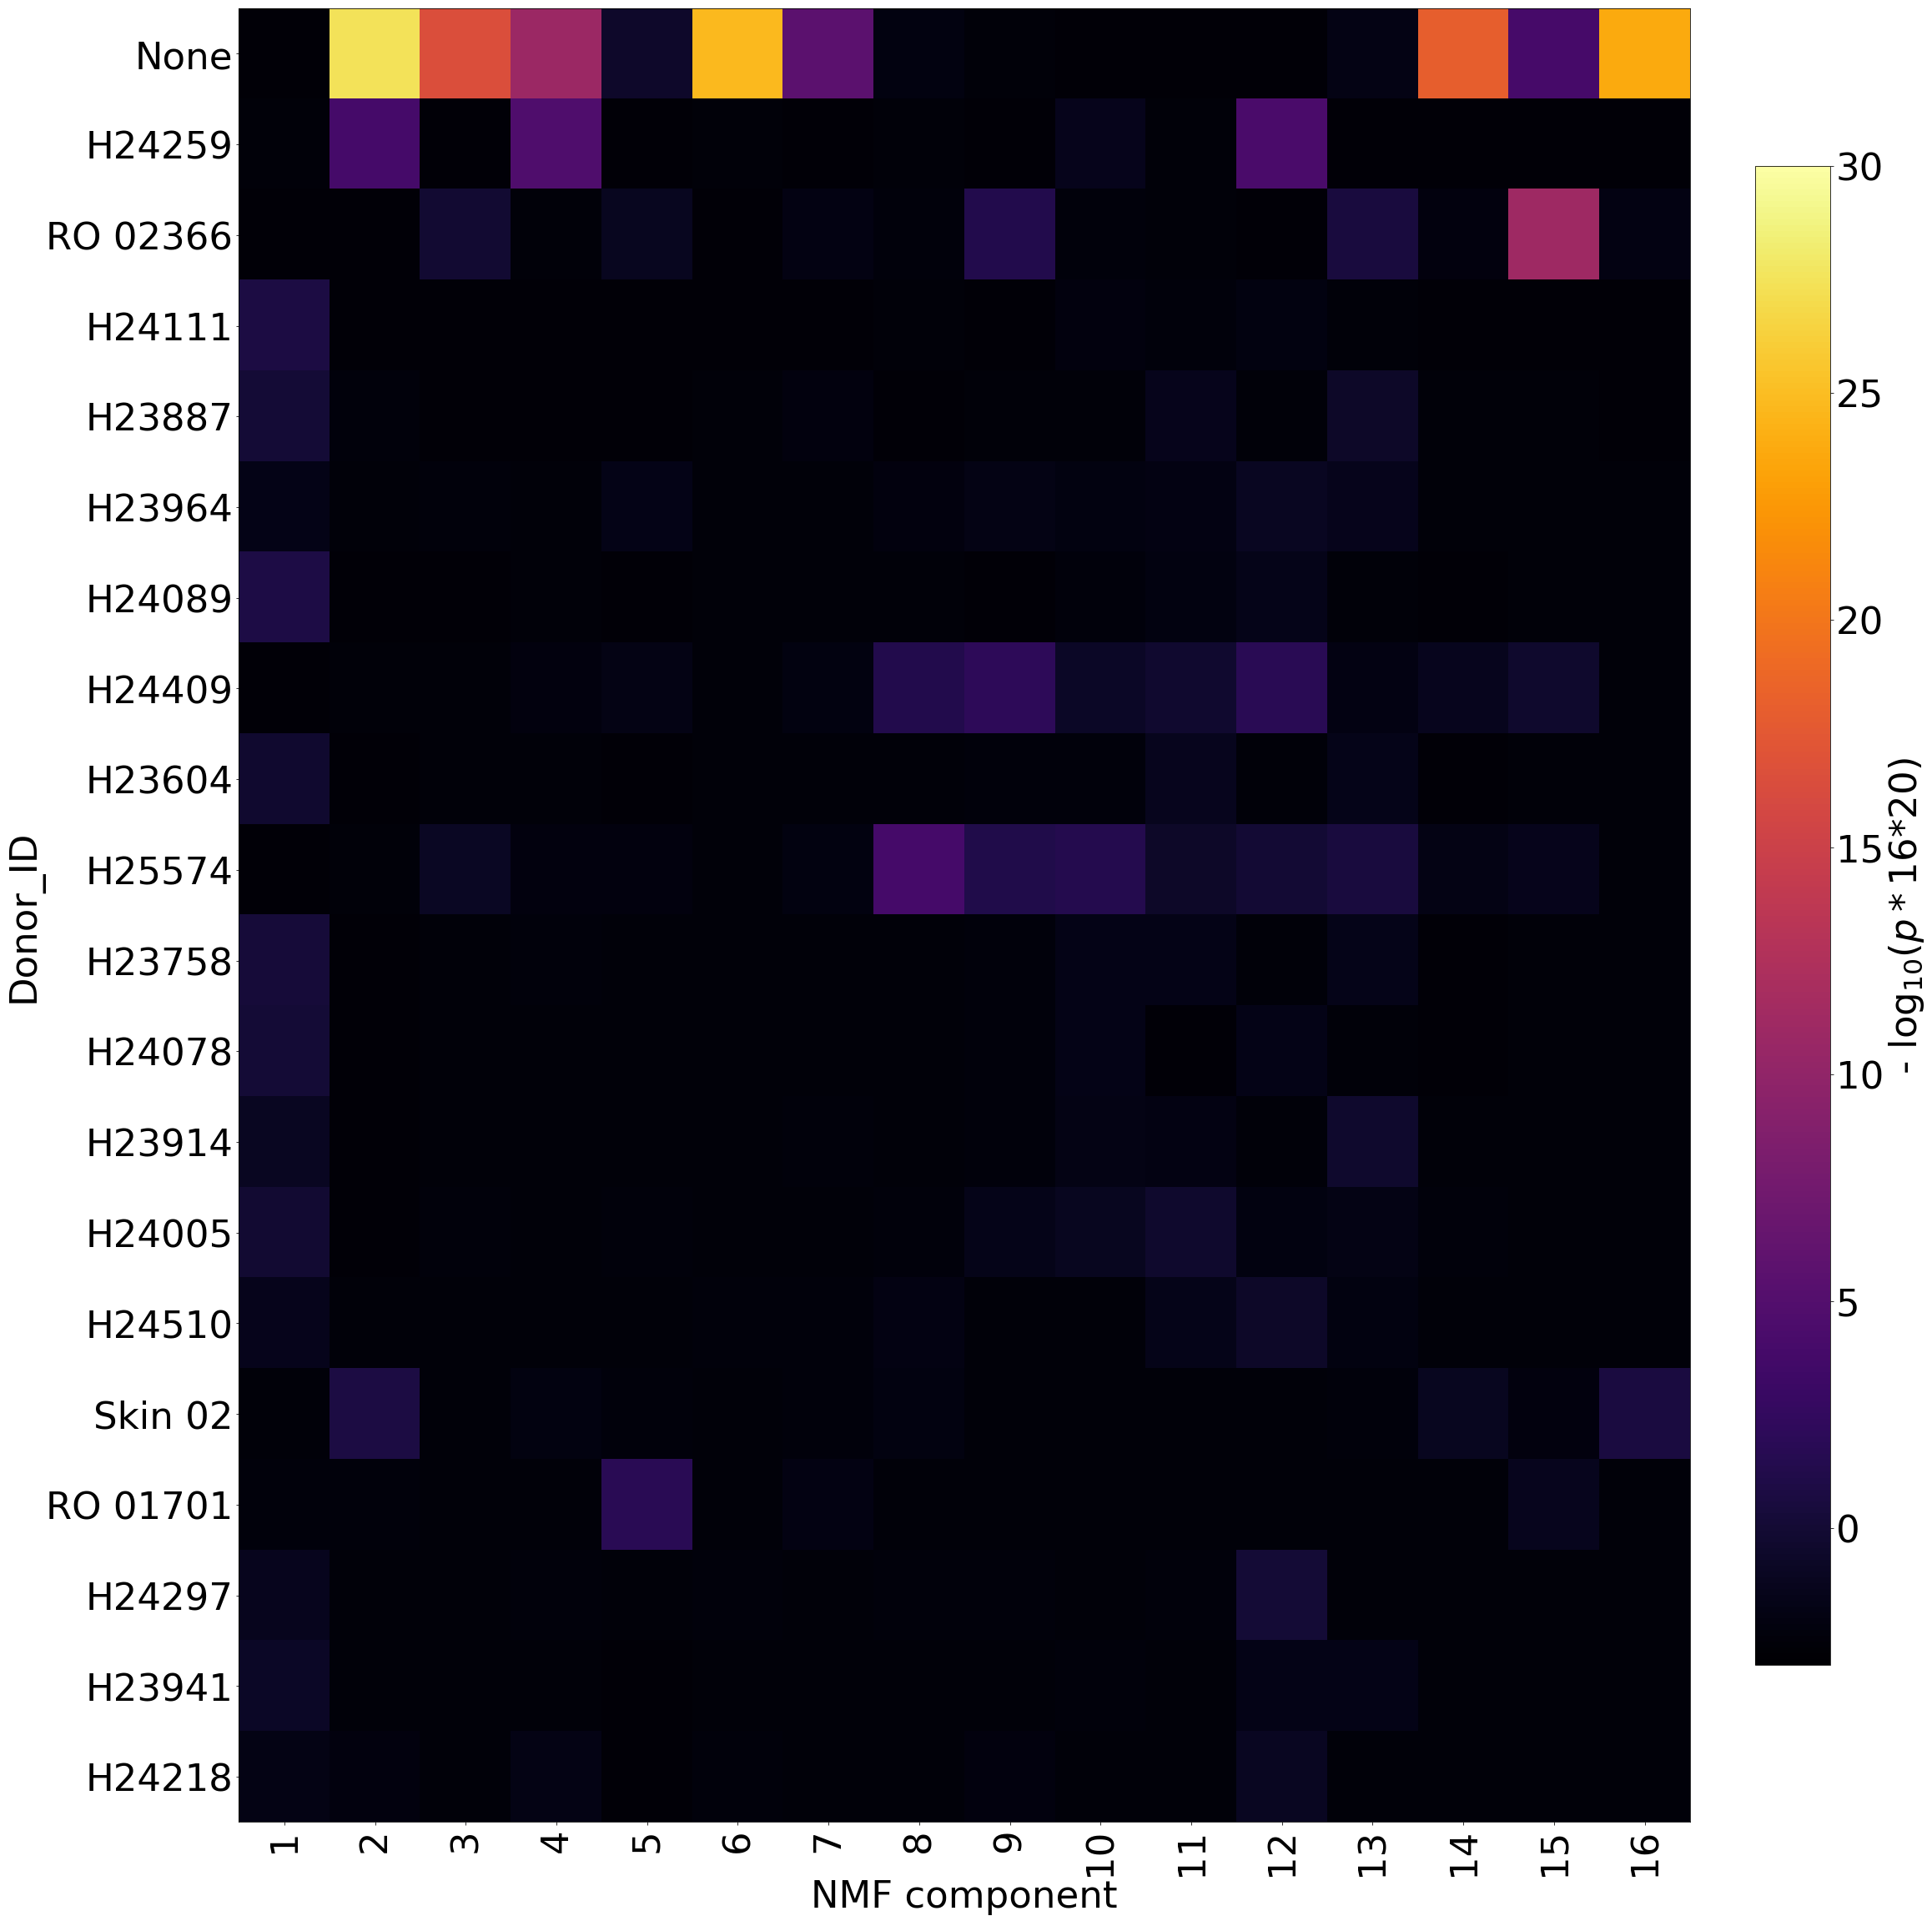

*****************
Category  0 None
*****************
Category  1 Cauc
*****************
Category  2 Afr-Am
*****************
Category  3 Hisp
*****************
Category  4 Cauc/Other


<Figure size 432x288 with 0 Axes>

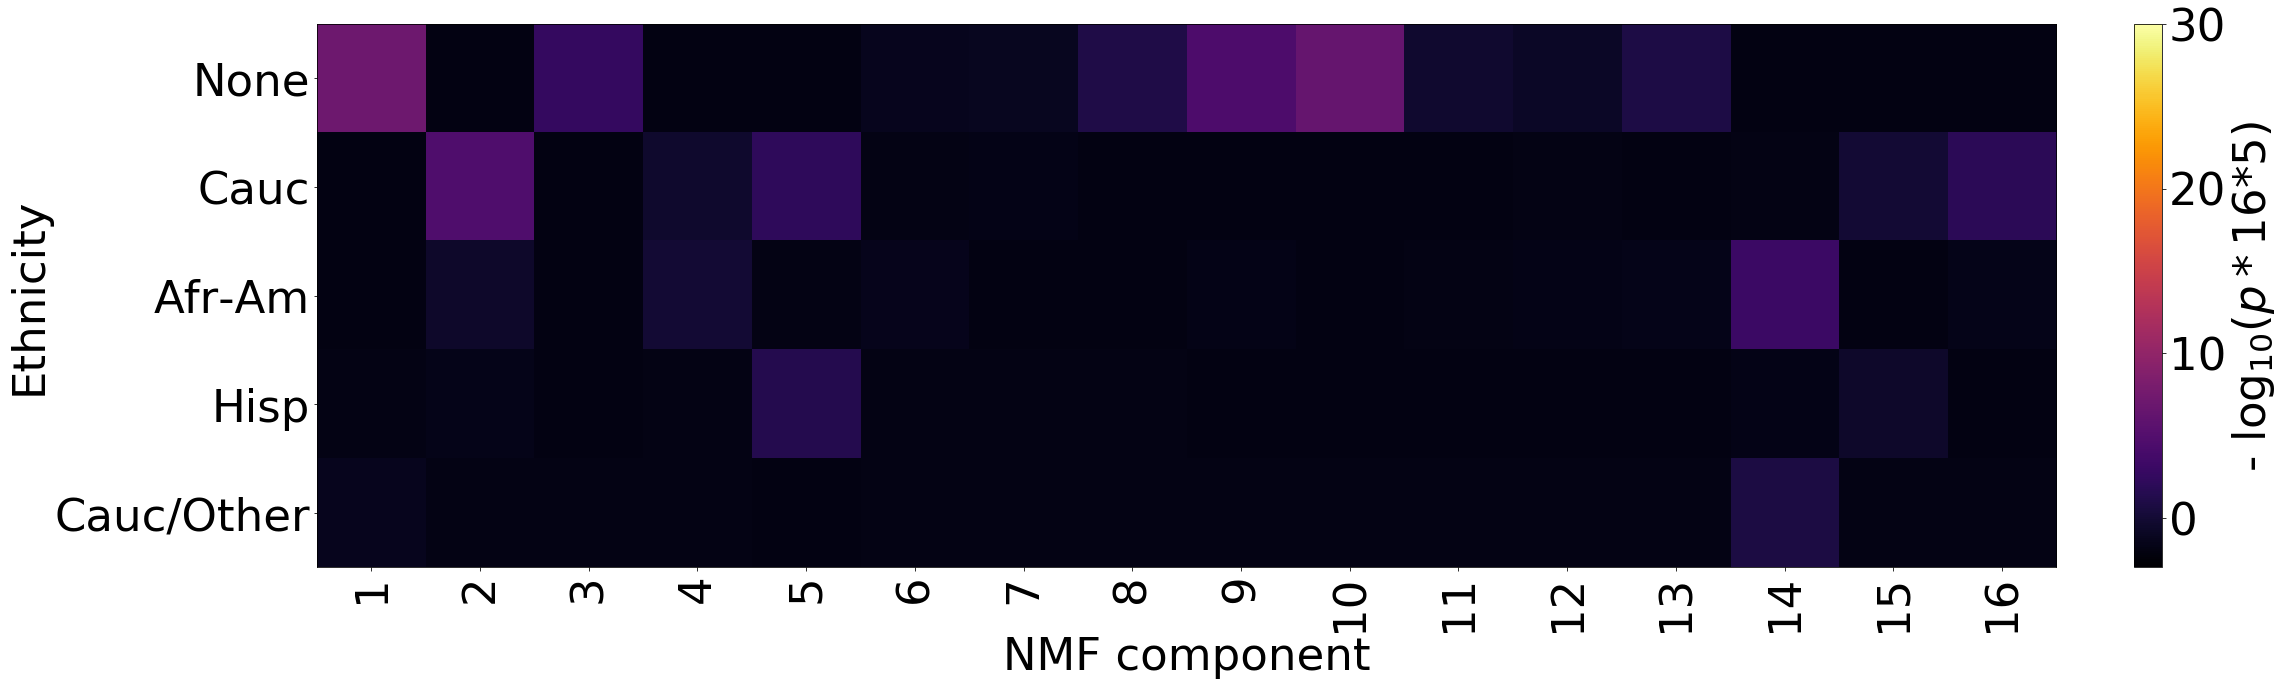

*****************
Category  0 minElute
*****************
Category  1 None
*****************
Category  2 Sucrose
*****************
Category  3 microcon
*****************
Category  4 min-elute
*****************
Category  5 new Sucrose
*****************
Category  6 micrcon
*****************
Category  7 MinElute


<Figure size 432x288 with 0 Axes>

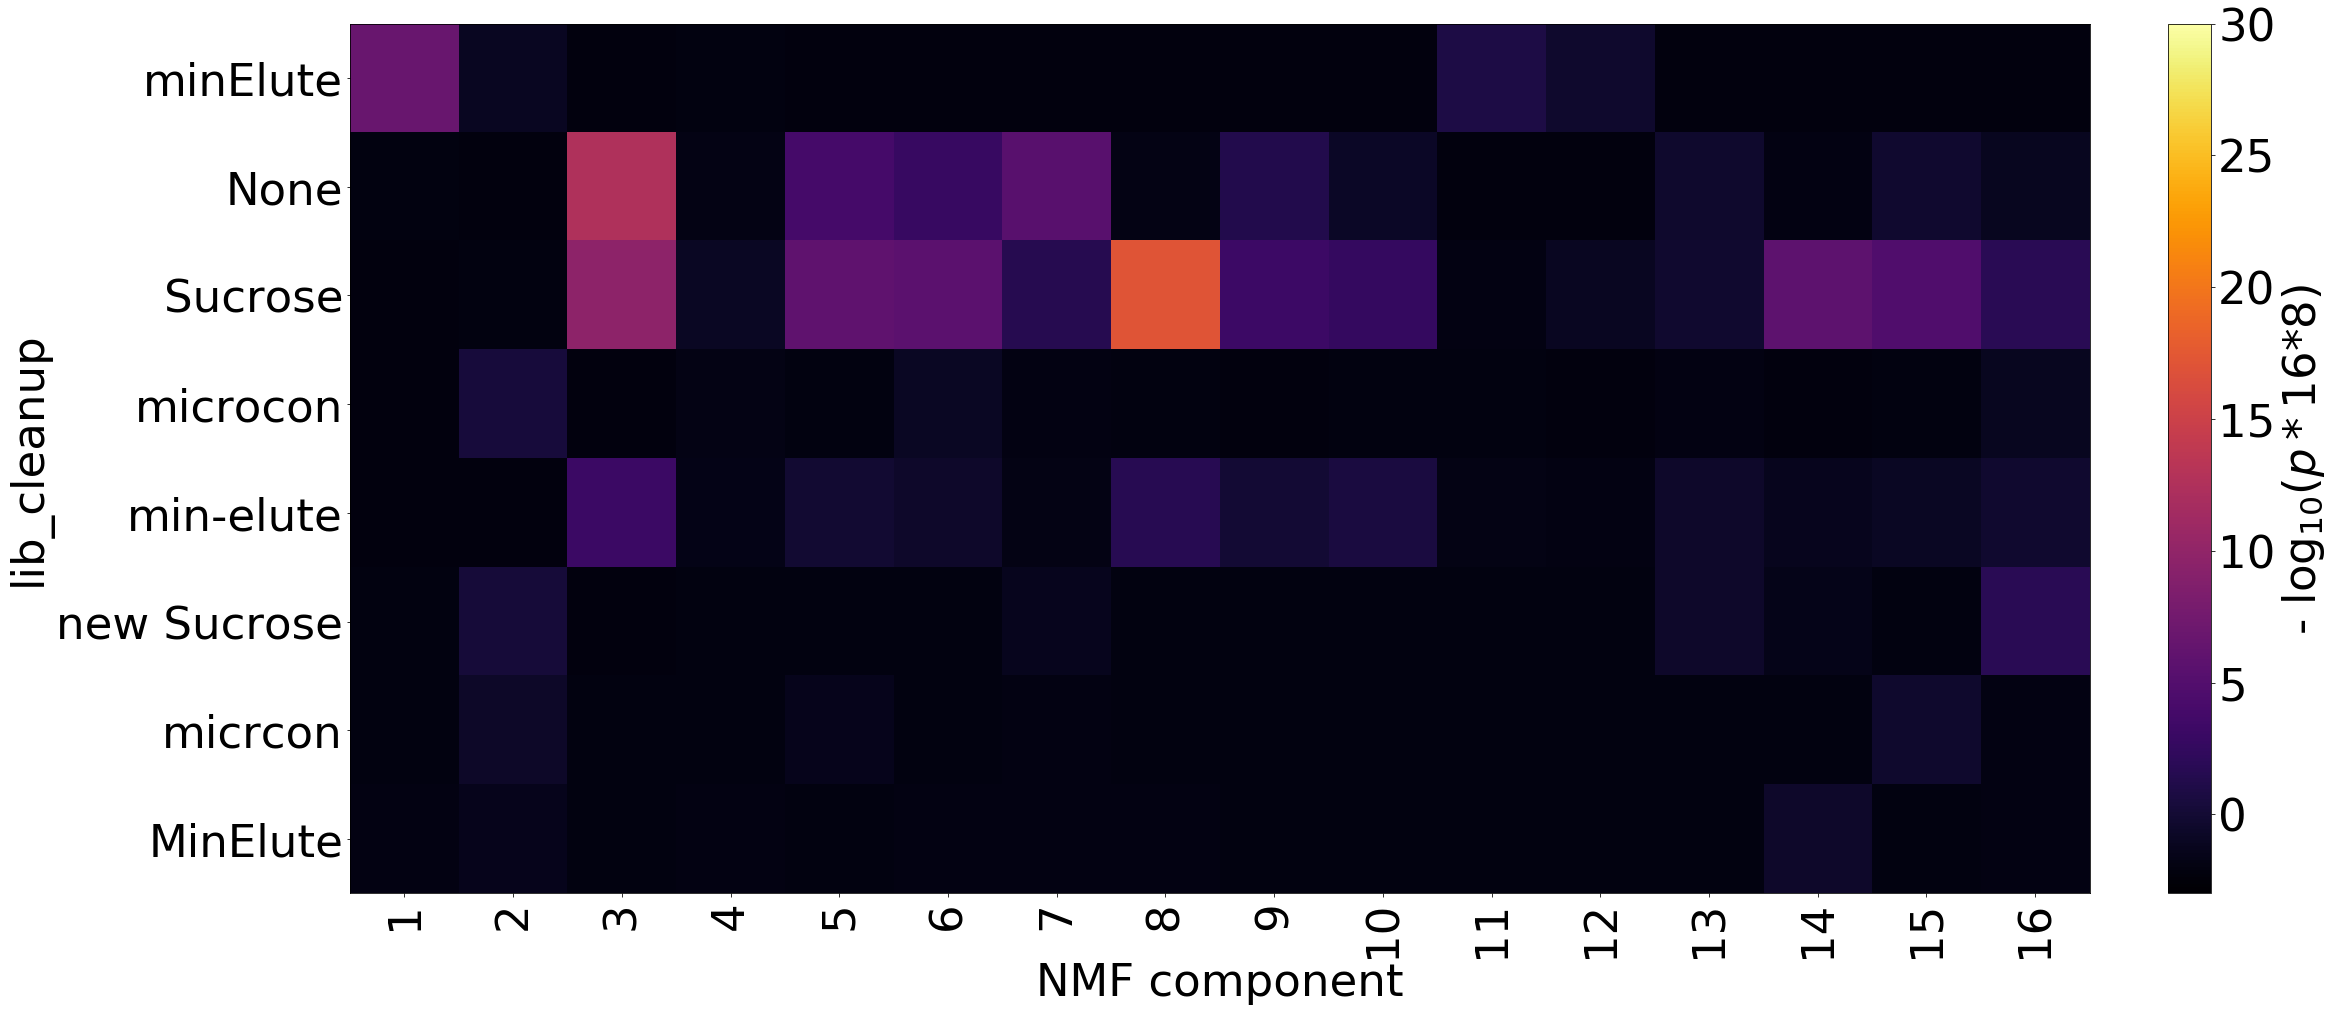

*****************
Category  0 A+Sucrose
*****************
Category  1 PBS+A
*****************
Category  2 None
*****************
Category  3 Buffer A
*****************
Category  4 PBS
*****************
Category  5 Sucrose HLB solution+A


<Figure size 432x288 with 0 Axes>

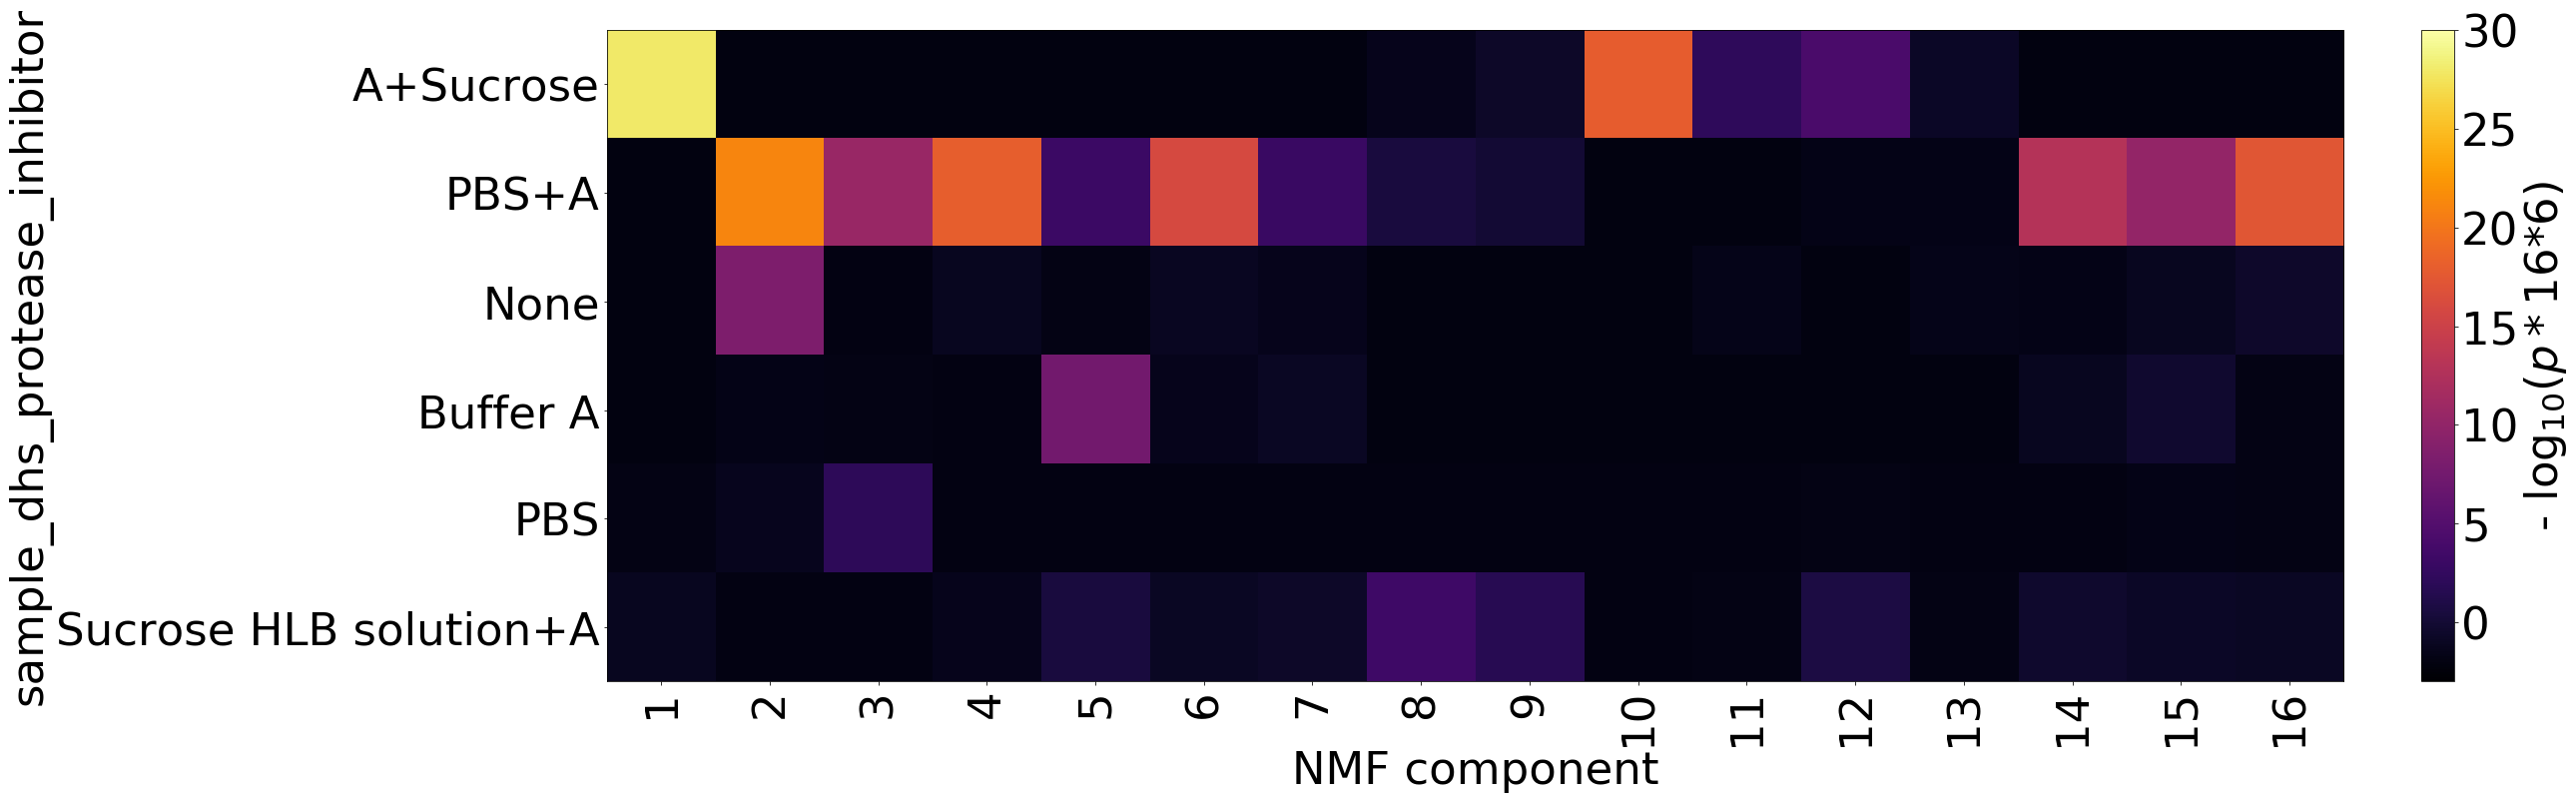

In [15]:
for my_cat_str in categories:
    MetaData[my_cat_str].fillna('None', inplace=True)
    (SystemChart,SystemTypes) = OMD.make_significance_plot(MetaData, decomp.Basis, my_cat_str, rosetta,thecmap='inferno', NMFCOMPS=k,filename_addon='', write_mode=False)

###  Each of the $k=16$ components have strong Mann Whitney U associations with a metadata caterogy (especially: system, subsystem, biological state) that is distinct and unique.

### when we add a 17th component, it is entirely unclear what additional metadata association we see. 

*****************
Category  0 Hematopoietic
*****************
Category  1 Renal
*****************
Category  2 Connective
*****************
Category  3 Musculoskeletal
*****************
Category  4 Nervous
*****************
Category  5 Digestive
*****************
Category  6 Cardiovascular
*****************
Category  7 Respiratory
*****************
Category  8 Embryonic
*****************
Category  9 Integumentary
*****************
Category  10 Epithelial
*****************
Category  11 Fetal Life Support
*****************
Category  12 Genitourinary
*****************
Category  13 Endocrine
*****************
Category  14 Hepatic


<Figure size 432x288 with 0 Axes>

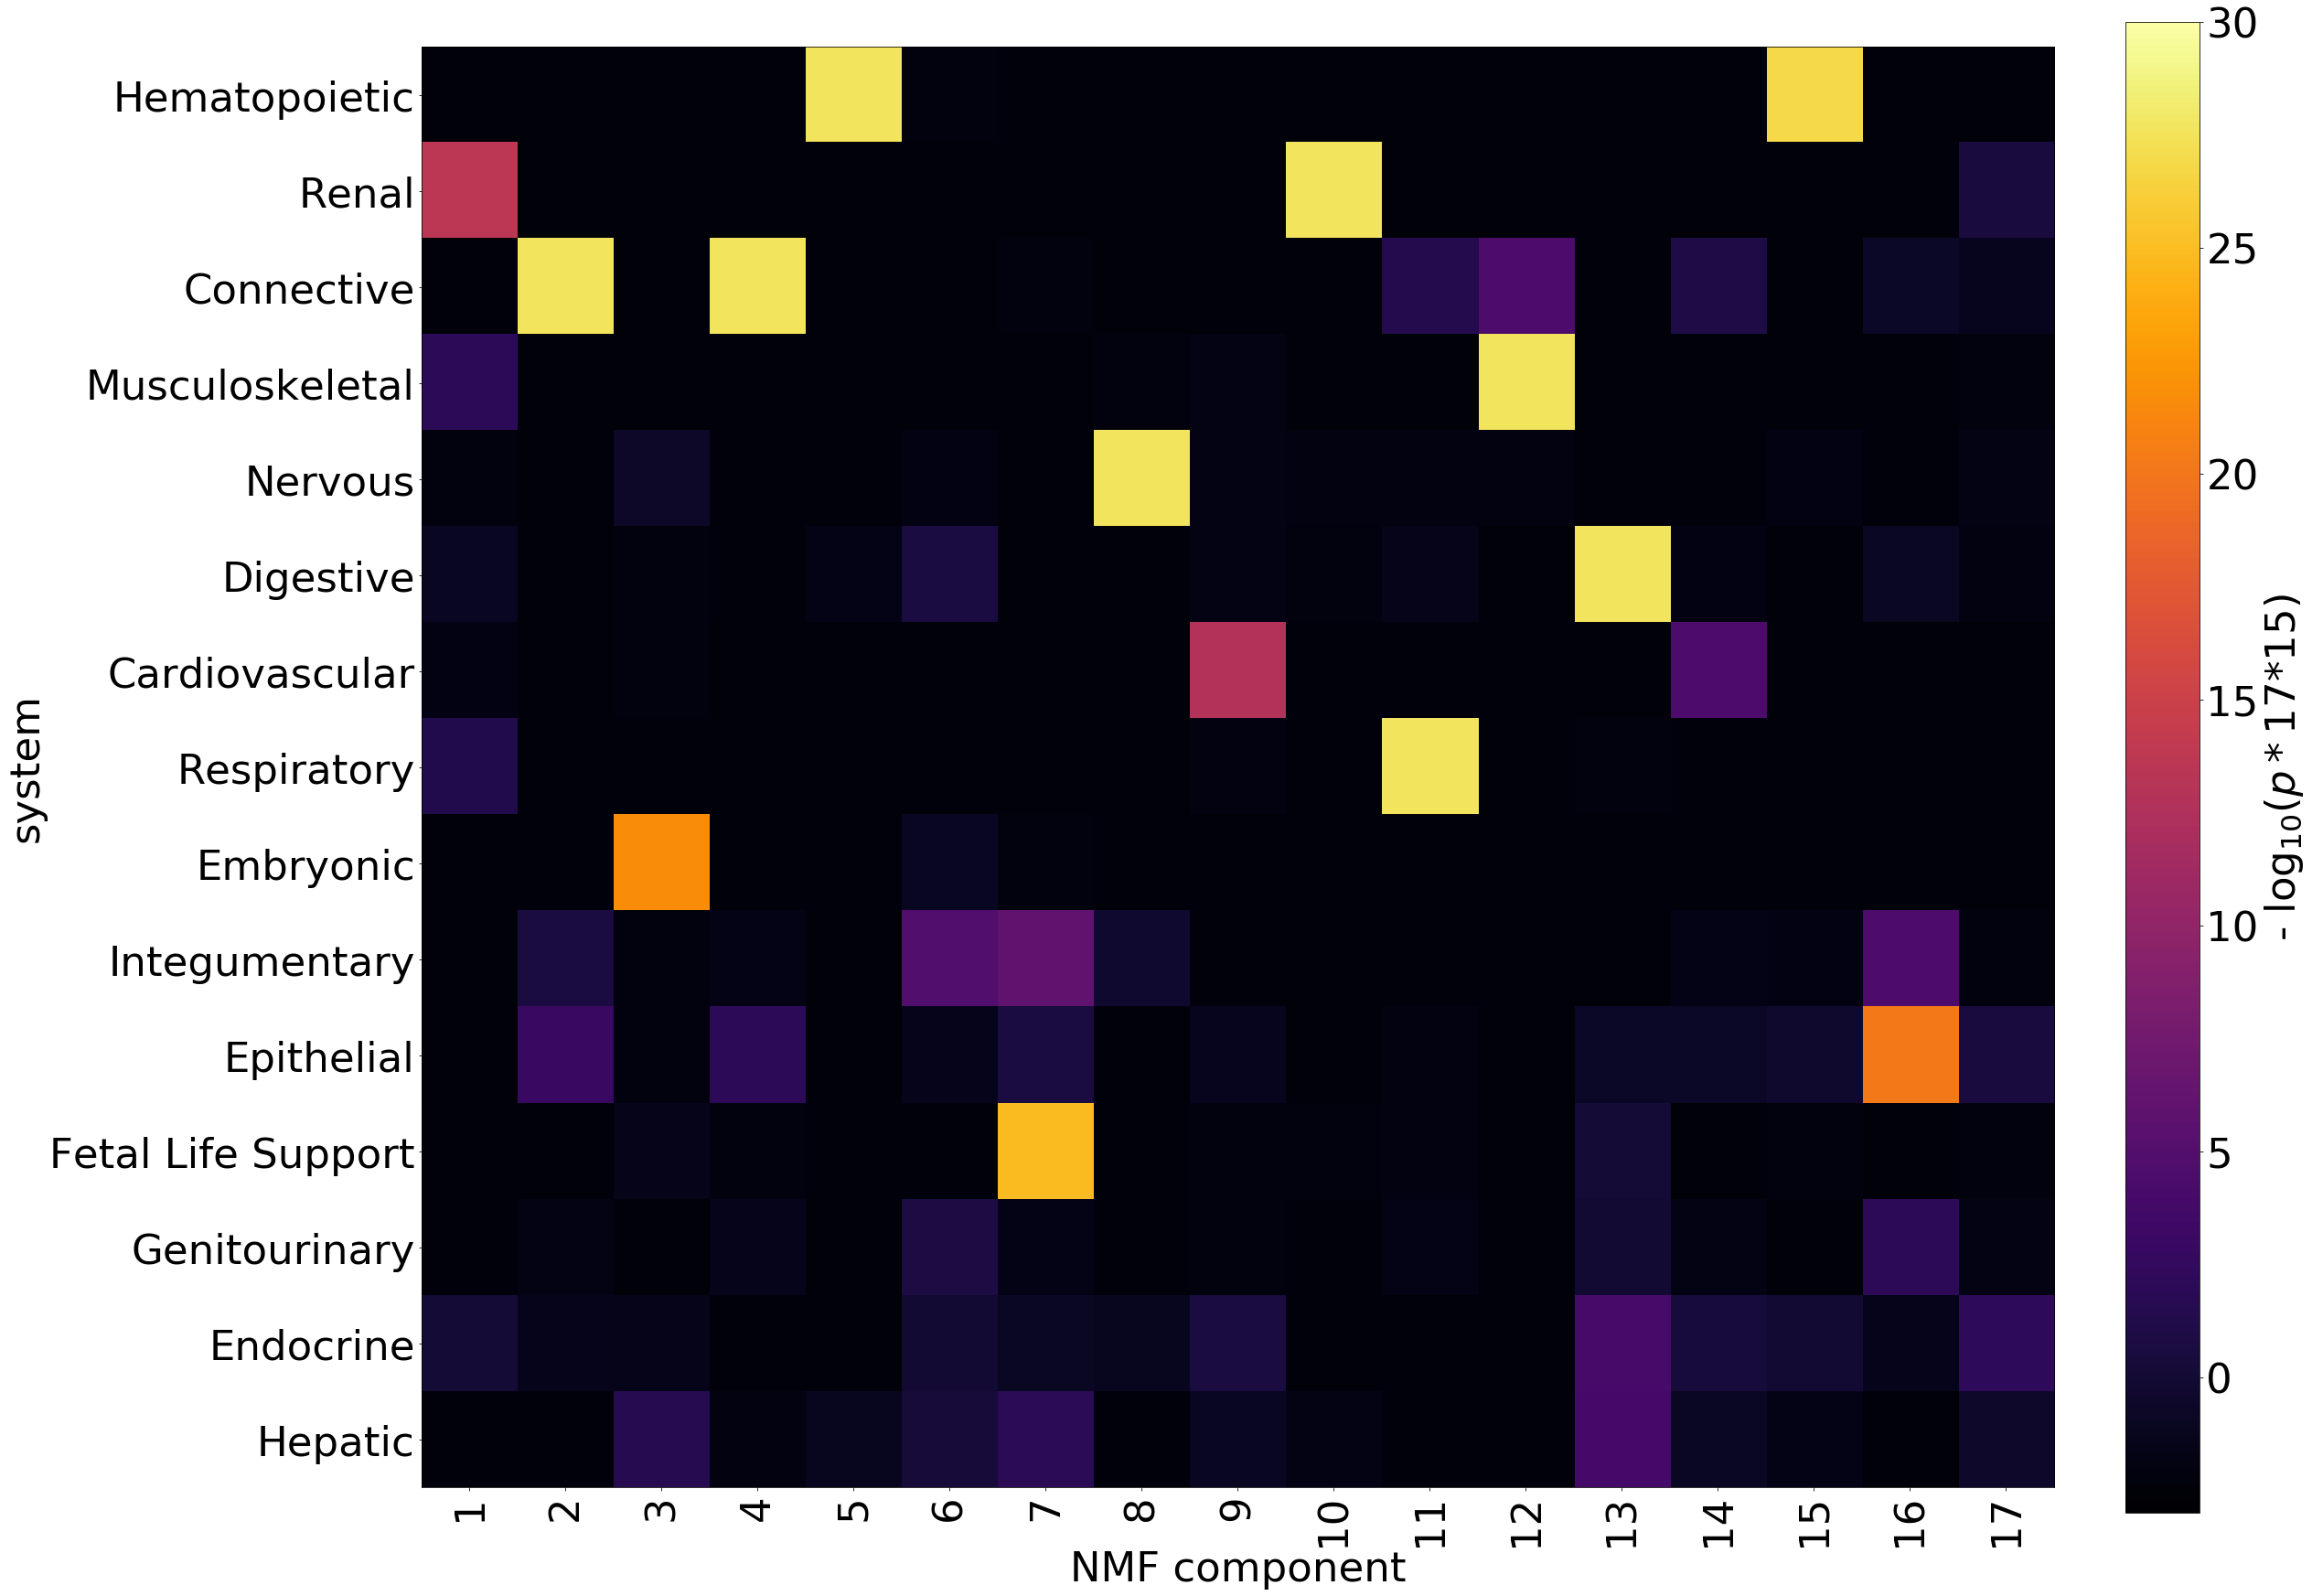

*****************
Category  0 Blood
*****************
Category  1 Kidney
*****************
Category  2 Skin
*****************
Category  3 Lung
*****************
Category  4 Muscle
*****************
Category  5 Brain
*****************
Category  6 Heart
*****************
Category  7 Germ
*****************
Category  8 Placenta
*****************
Category  9 Eye
*****************
Category  10 Colon
*****************
Category  11 Mammary
*****************
Category  12 Stomach
*****************
Category  13 Large Intestine
*****************
Category  14 Bone
*****************
Category  15 Small Intestine
*****************
Category  16 Spinal Cord
*****************
Category  17 Adrenal Gland
*****************
Category  18 Liver
*****************
Category  19 Prostate


<Figure size 432x288 with 0 Axes>

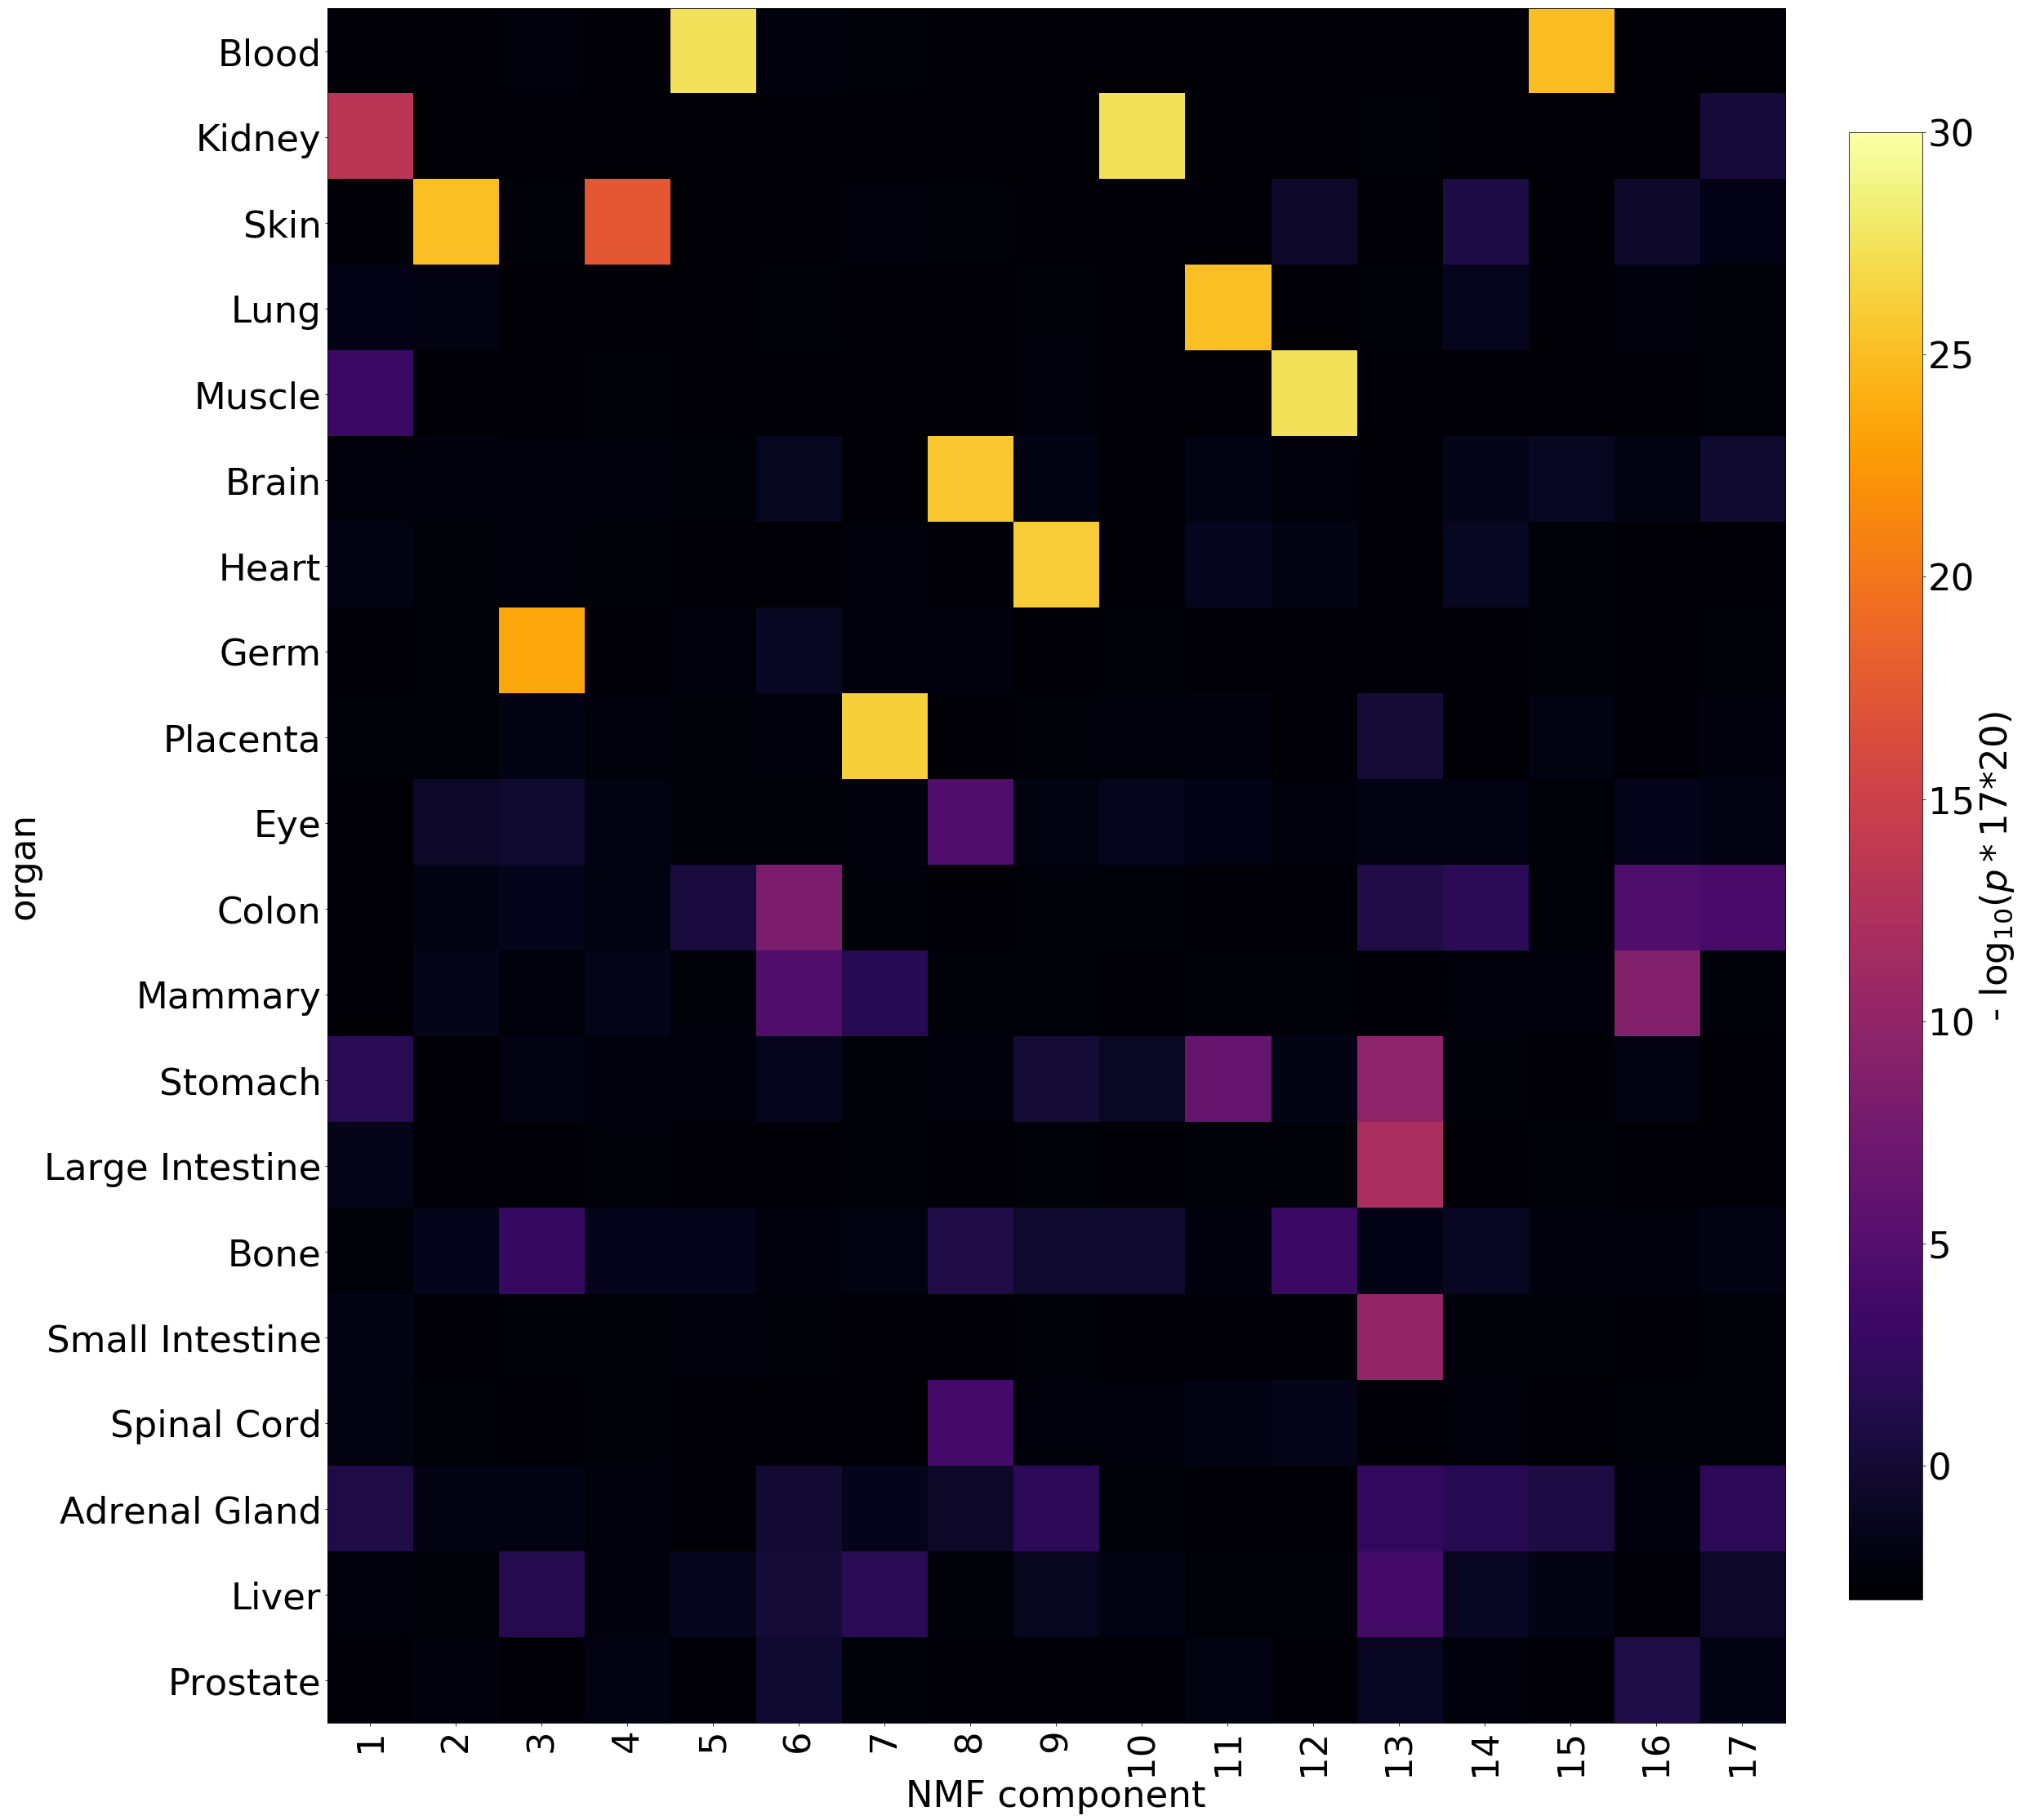

*****************
Category  0 Primary
*****************
Category  1 Cancer
*****************
Category  2 Immortalized
*****************
Category  3 ESC
*****************
Category  4 Stem Cells
*****************
Category  5 iPSC


<Figure size 432x288 with 0 Axes>

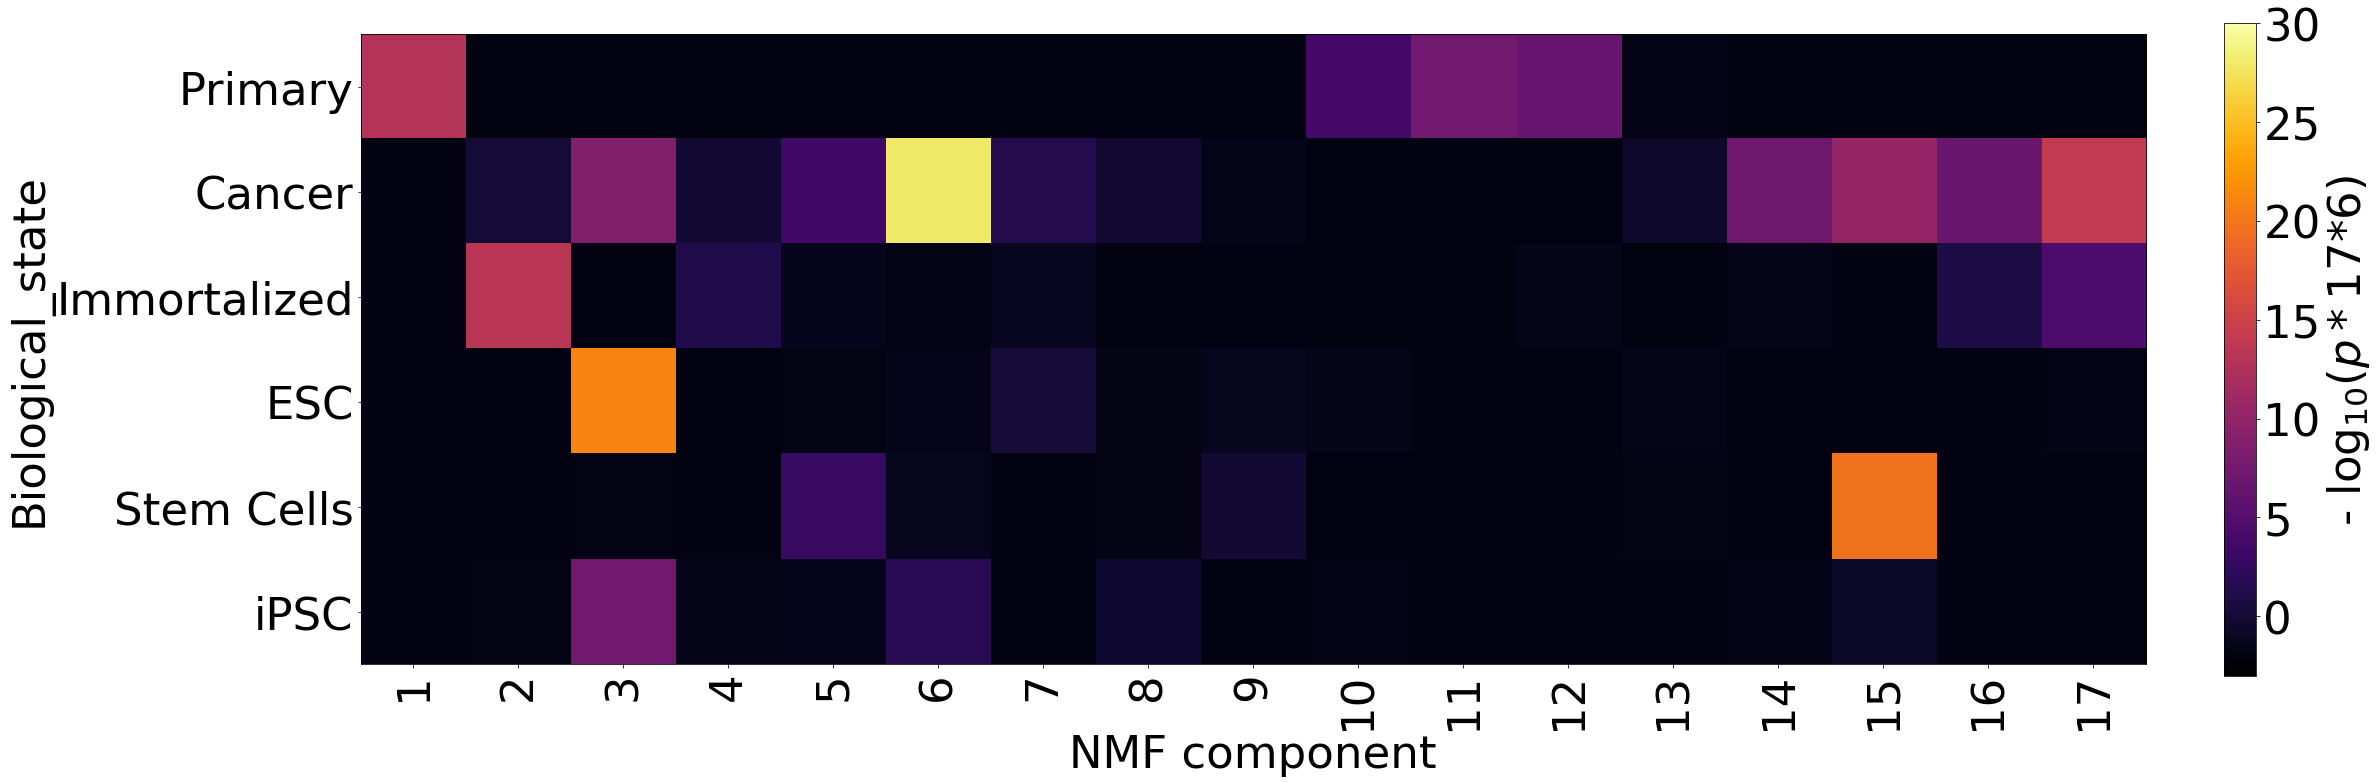

*****************
Category  0 None
*****************
Category  1 Skeletal Muscle
*****************
Category  2 T-cell
*****************
Category  3 Cardiac
*****************
Category  4 Lymphoid
*****************
Category  5 Vascular
*****************
Category  6 Progenitor
*****************
Category  7 Erythroid
*****************
Category  8 Myeloid
*****************
Category  9 Cardiac Muscle
*****************
Category  10 Smooth Muscle


<Figure size 432x288 with 0 Axes>

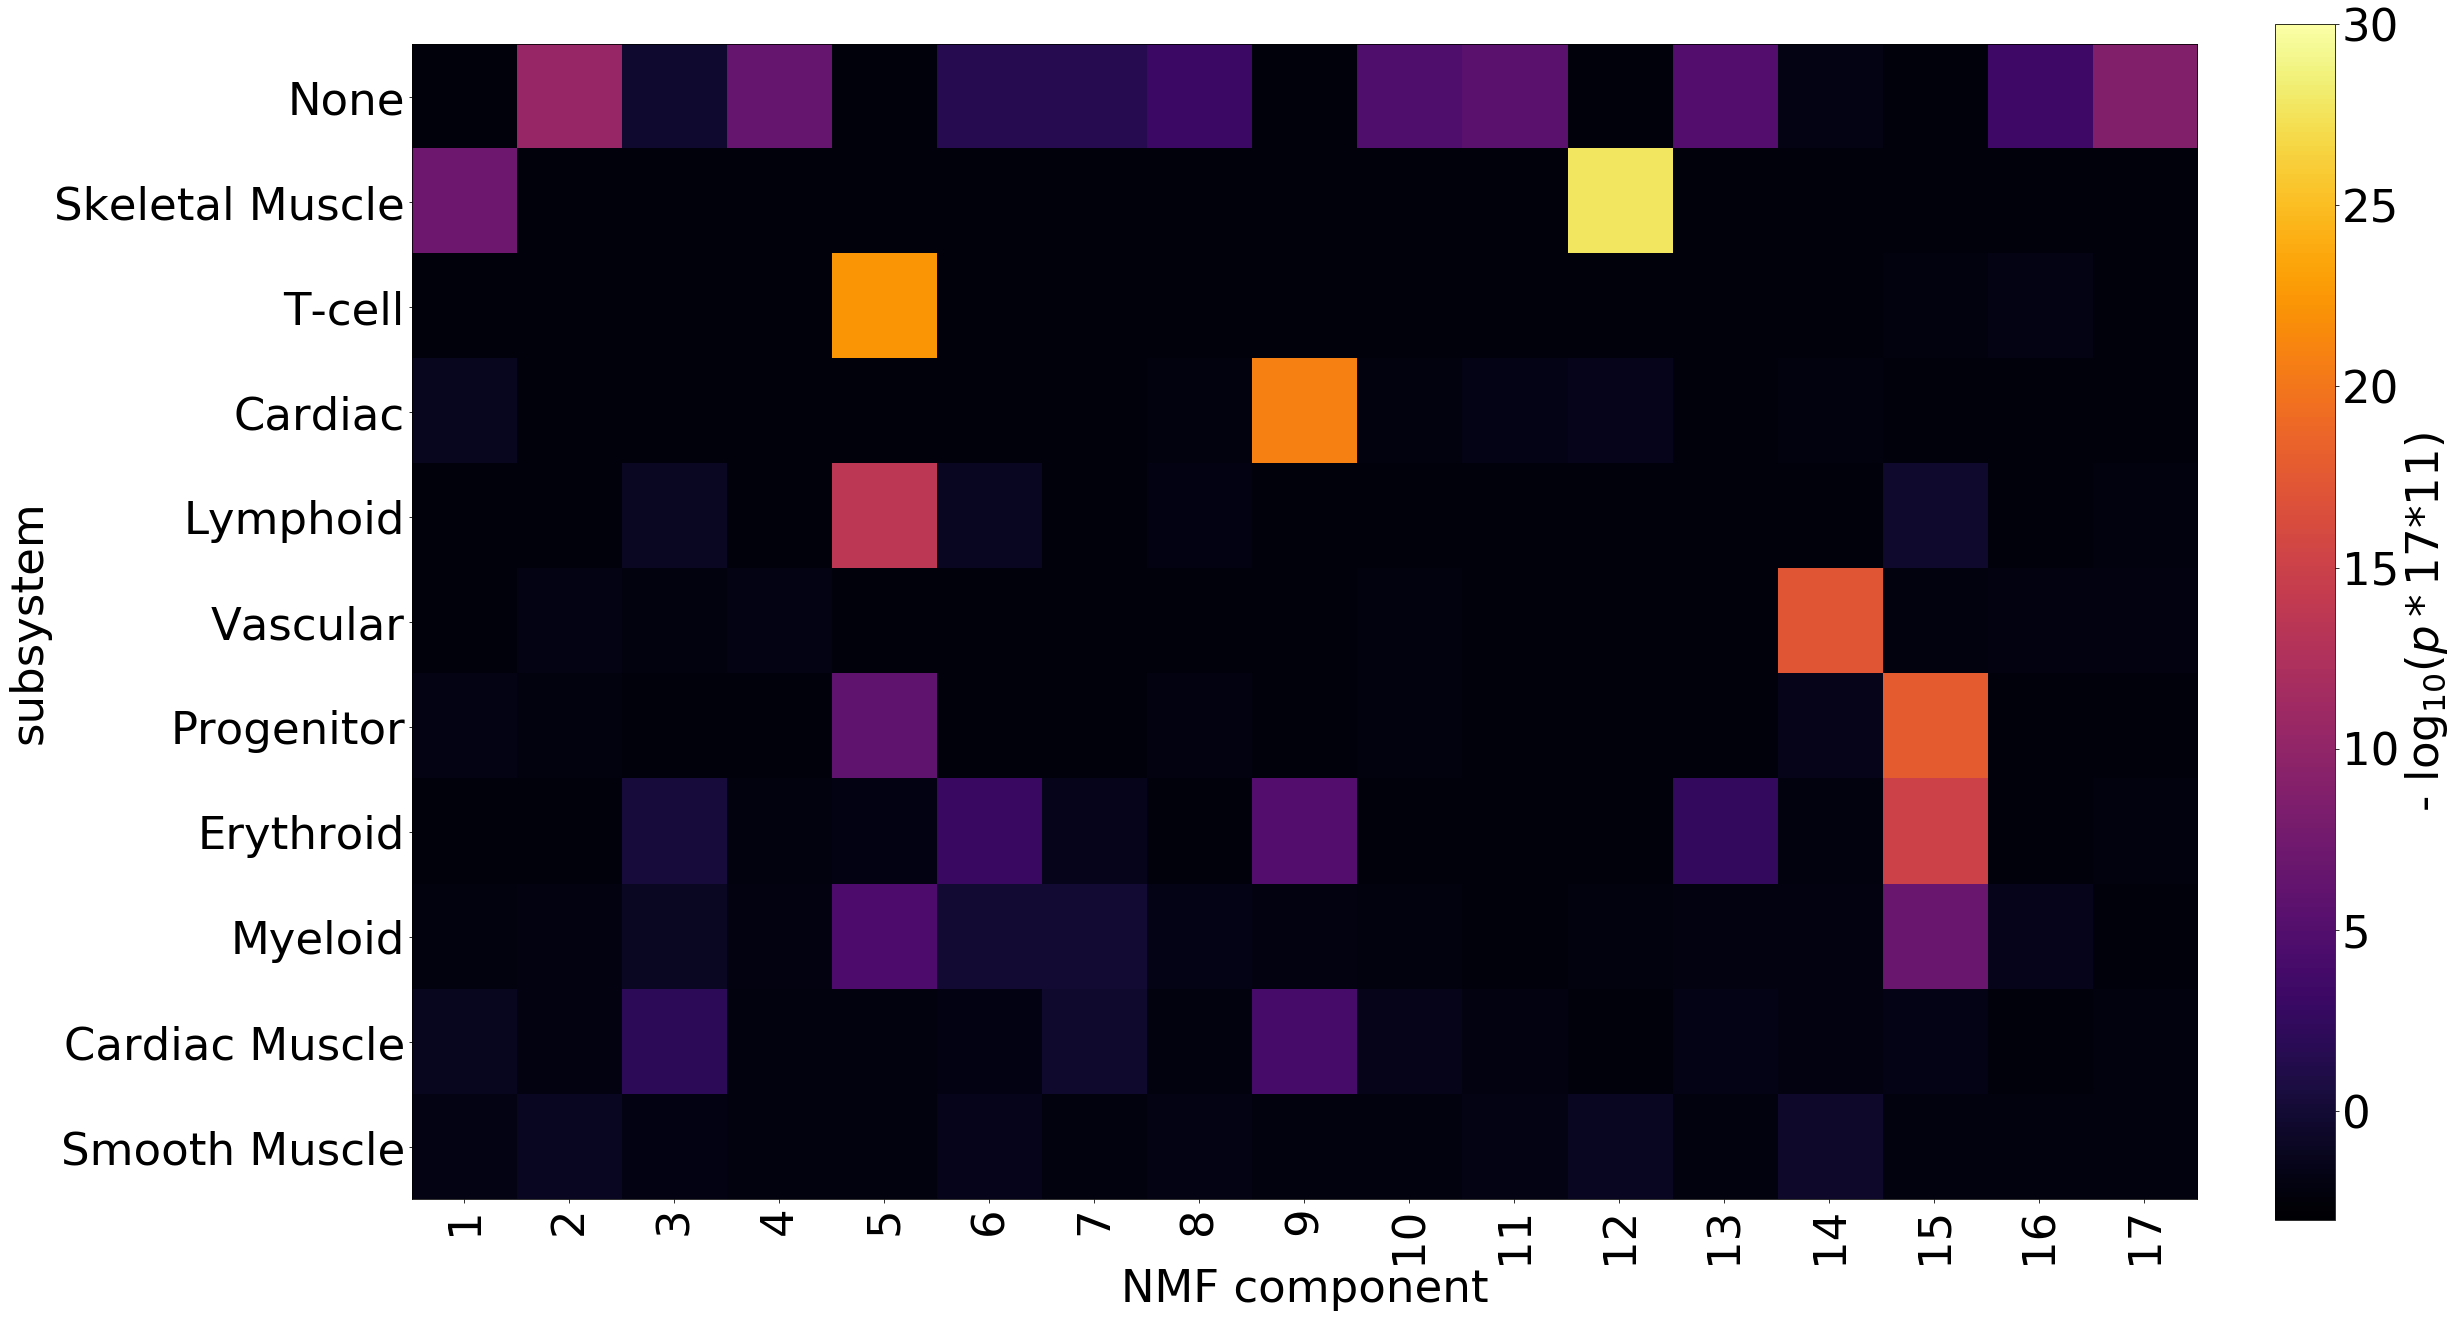

*****************
Category  0 M
*****************
Category  1 F
*****************
Category  2 None
*****************
Category  3 U
*****************
Category  4 F?


<Figure size 432x288 with 0 Axes>

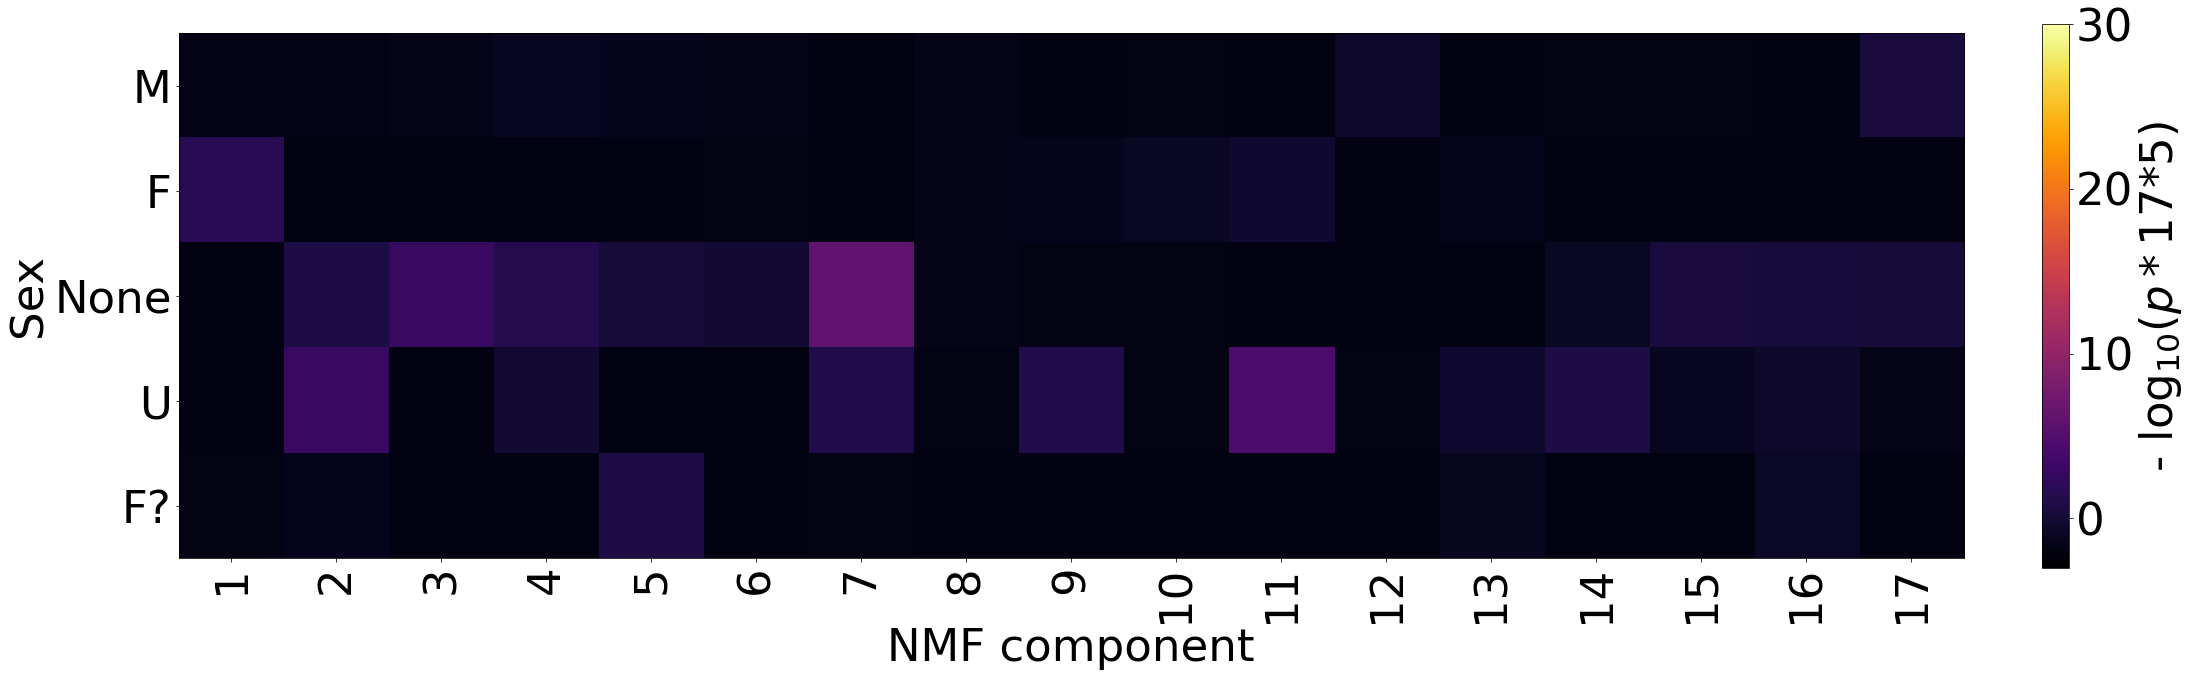

*****************
Category  0 Mesoderm
*****************
Category  1 Endoderm
*****************
Category  2 Ectoderm
*****************
Category  3 Primitive


<Figure size 432x288 with 0 Axes>

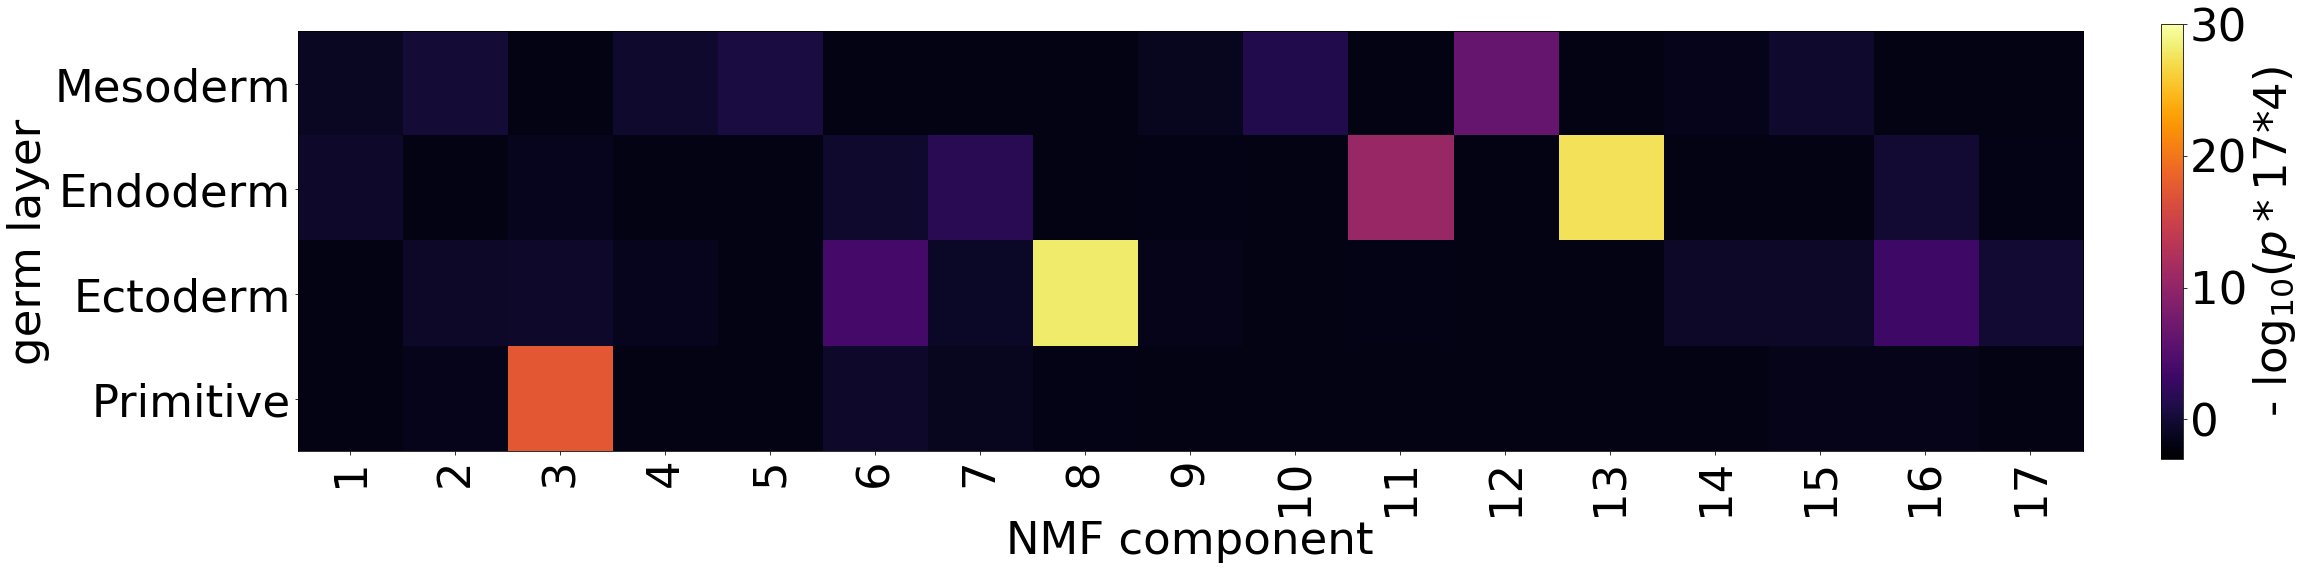

*****************
Category  0 Fetal
*****************
Category  1 Adult
*****************
Category  2 Neonatal
*****************
Category  3 Child
*****************
Category  4 Embryonic


<Figure size 432x288 with 0 Axes>

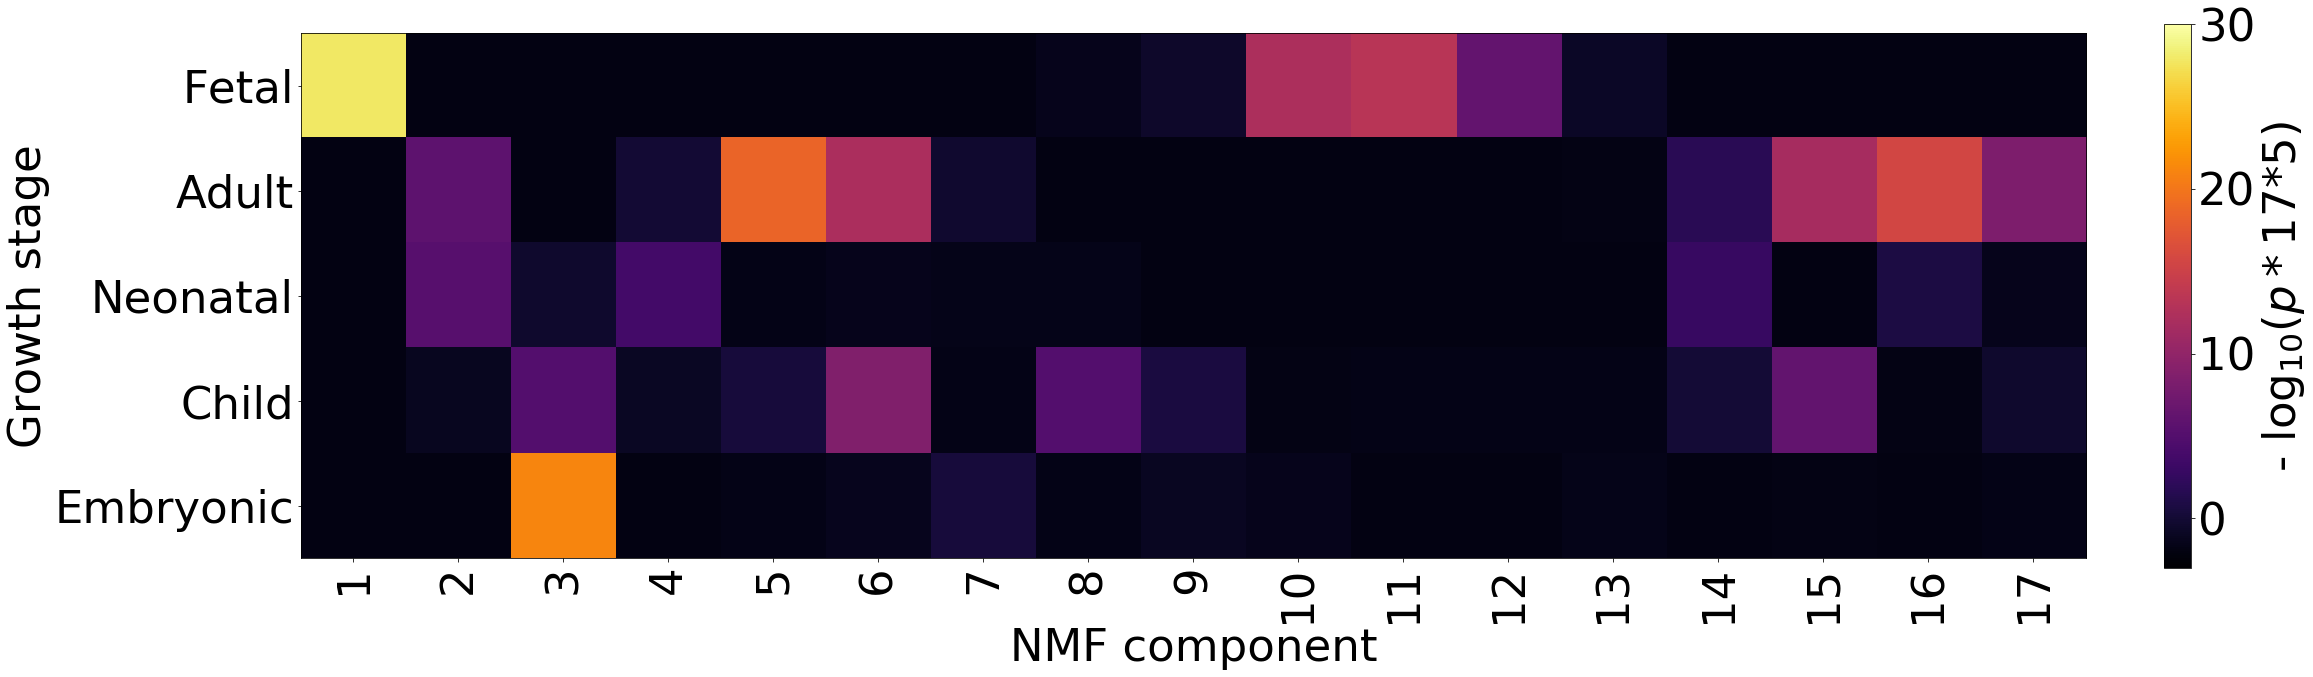

*****************
Category  0 Fetal
*****************
Category  1 Lines
*****************
Category  2 Primary
*****************
Category  3 Adult


<Figure size 432x288 with 0 Axes>

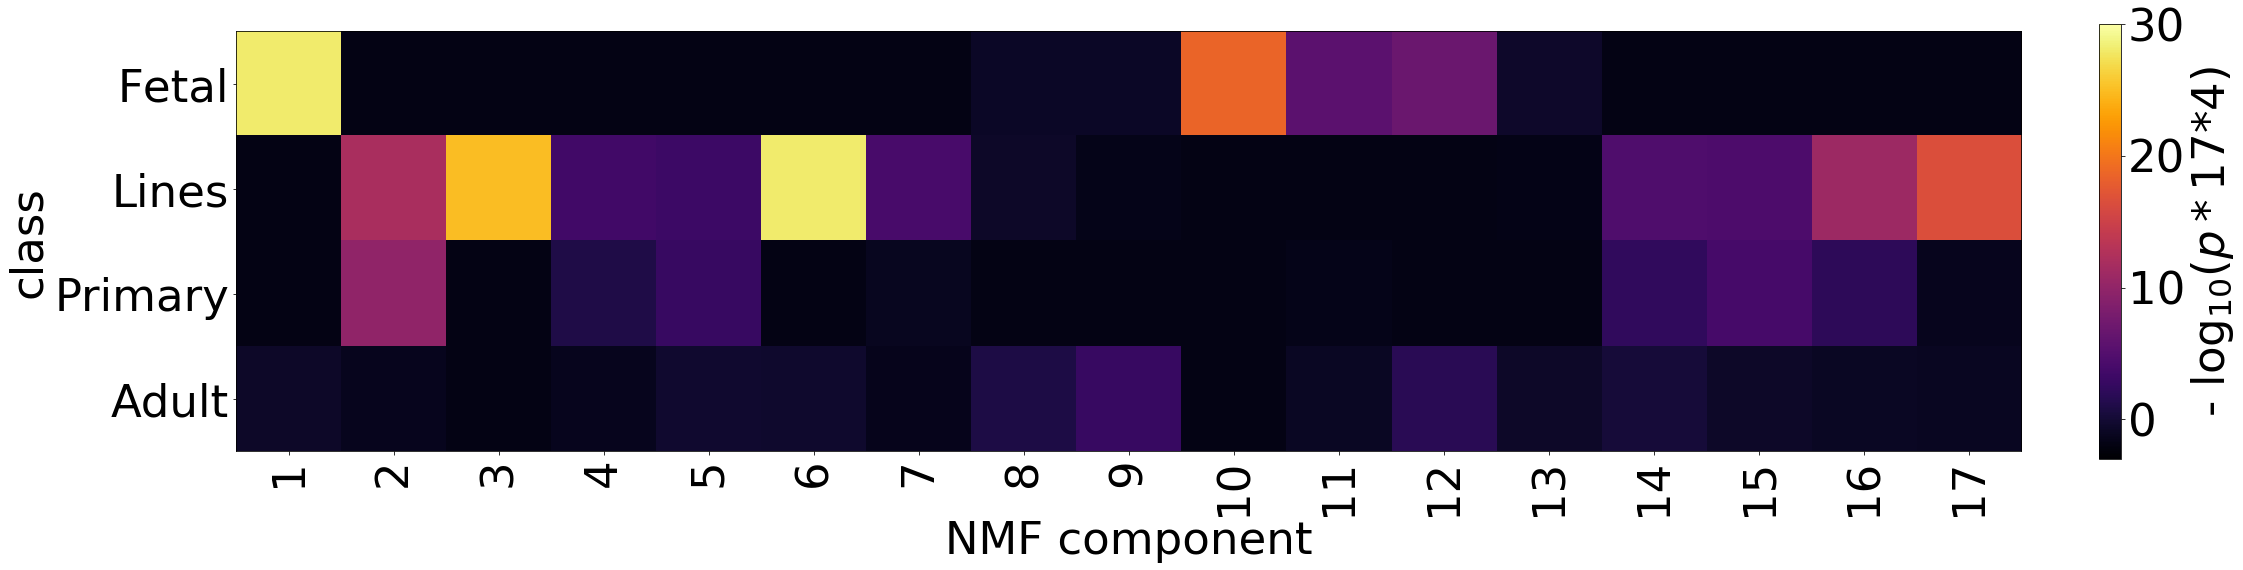

*****************
Category  0 PE
*****************
Category  1 TS
*****************
Category  2 In-PE
*****************
Category  3 None
*****************
Category  4 FC-121-2001 DNA TruSeq v2-Set A
*****************
Category  5 FC-121-1001 DNA TruSeq - Set A
*****************
Category  6 FC-121-2002 DNA TruSeq v2-Set B
*****************
Category  7 Thruplex DNA-Seq Q
*****************
Category  8 Mondrian_8033-32_DNA_Ovation_SP_Ultralow
*****************
Category  9 Molly's
*****************
Category  10 SSlib-JV7Q
*****************
Category  11 Thruplex DNA-Seq H
*****************
Category  12 SSlib-JV5
*****************
Category  13 Jeff's ssDNA protocol (T4) CL78v8
*****************
Category  14 PE-I
*****************
Category  15 Jeff's ssDNA protocol (T4)
*****************
Category  16 SSlib-JV7
*****************
Category  17 FC-121-1002 DNA TruSeq –Set B
*****************
Category  18 SSlib-jv6
*****************
Category  19 SSlib-JV8


<Figure size 432x288 with 0 Axes>

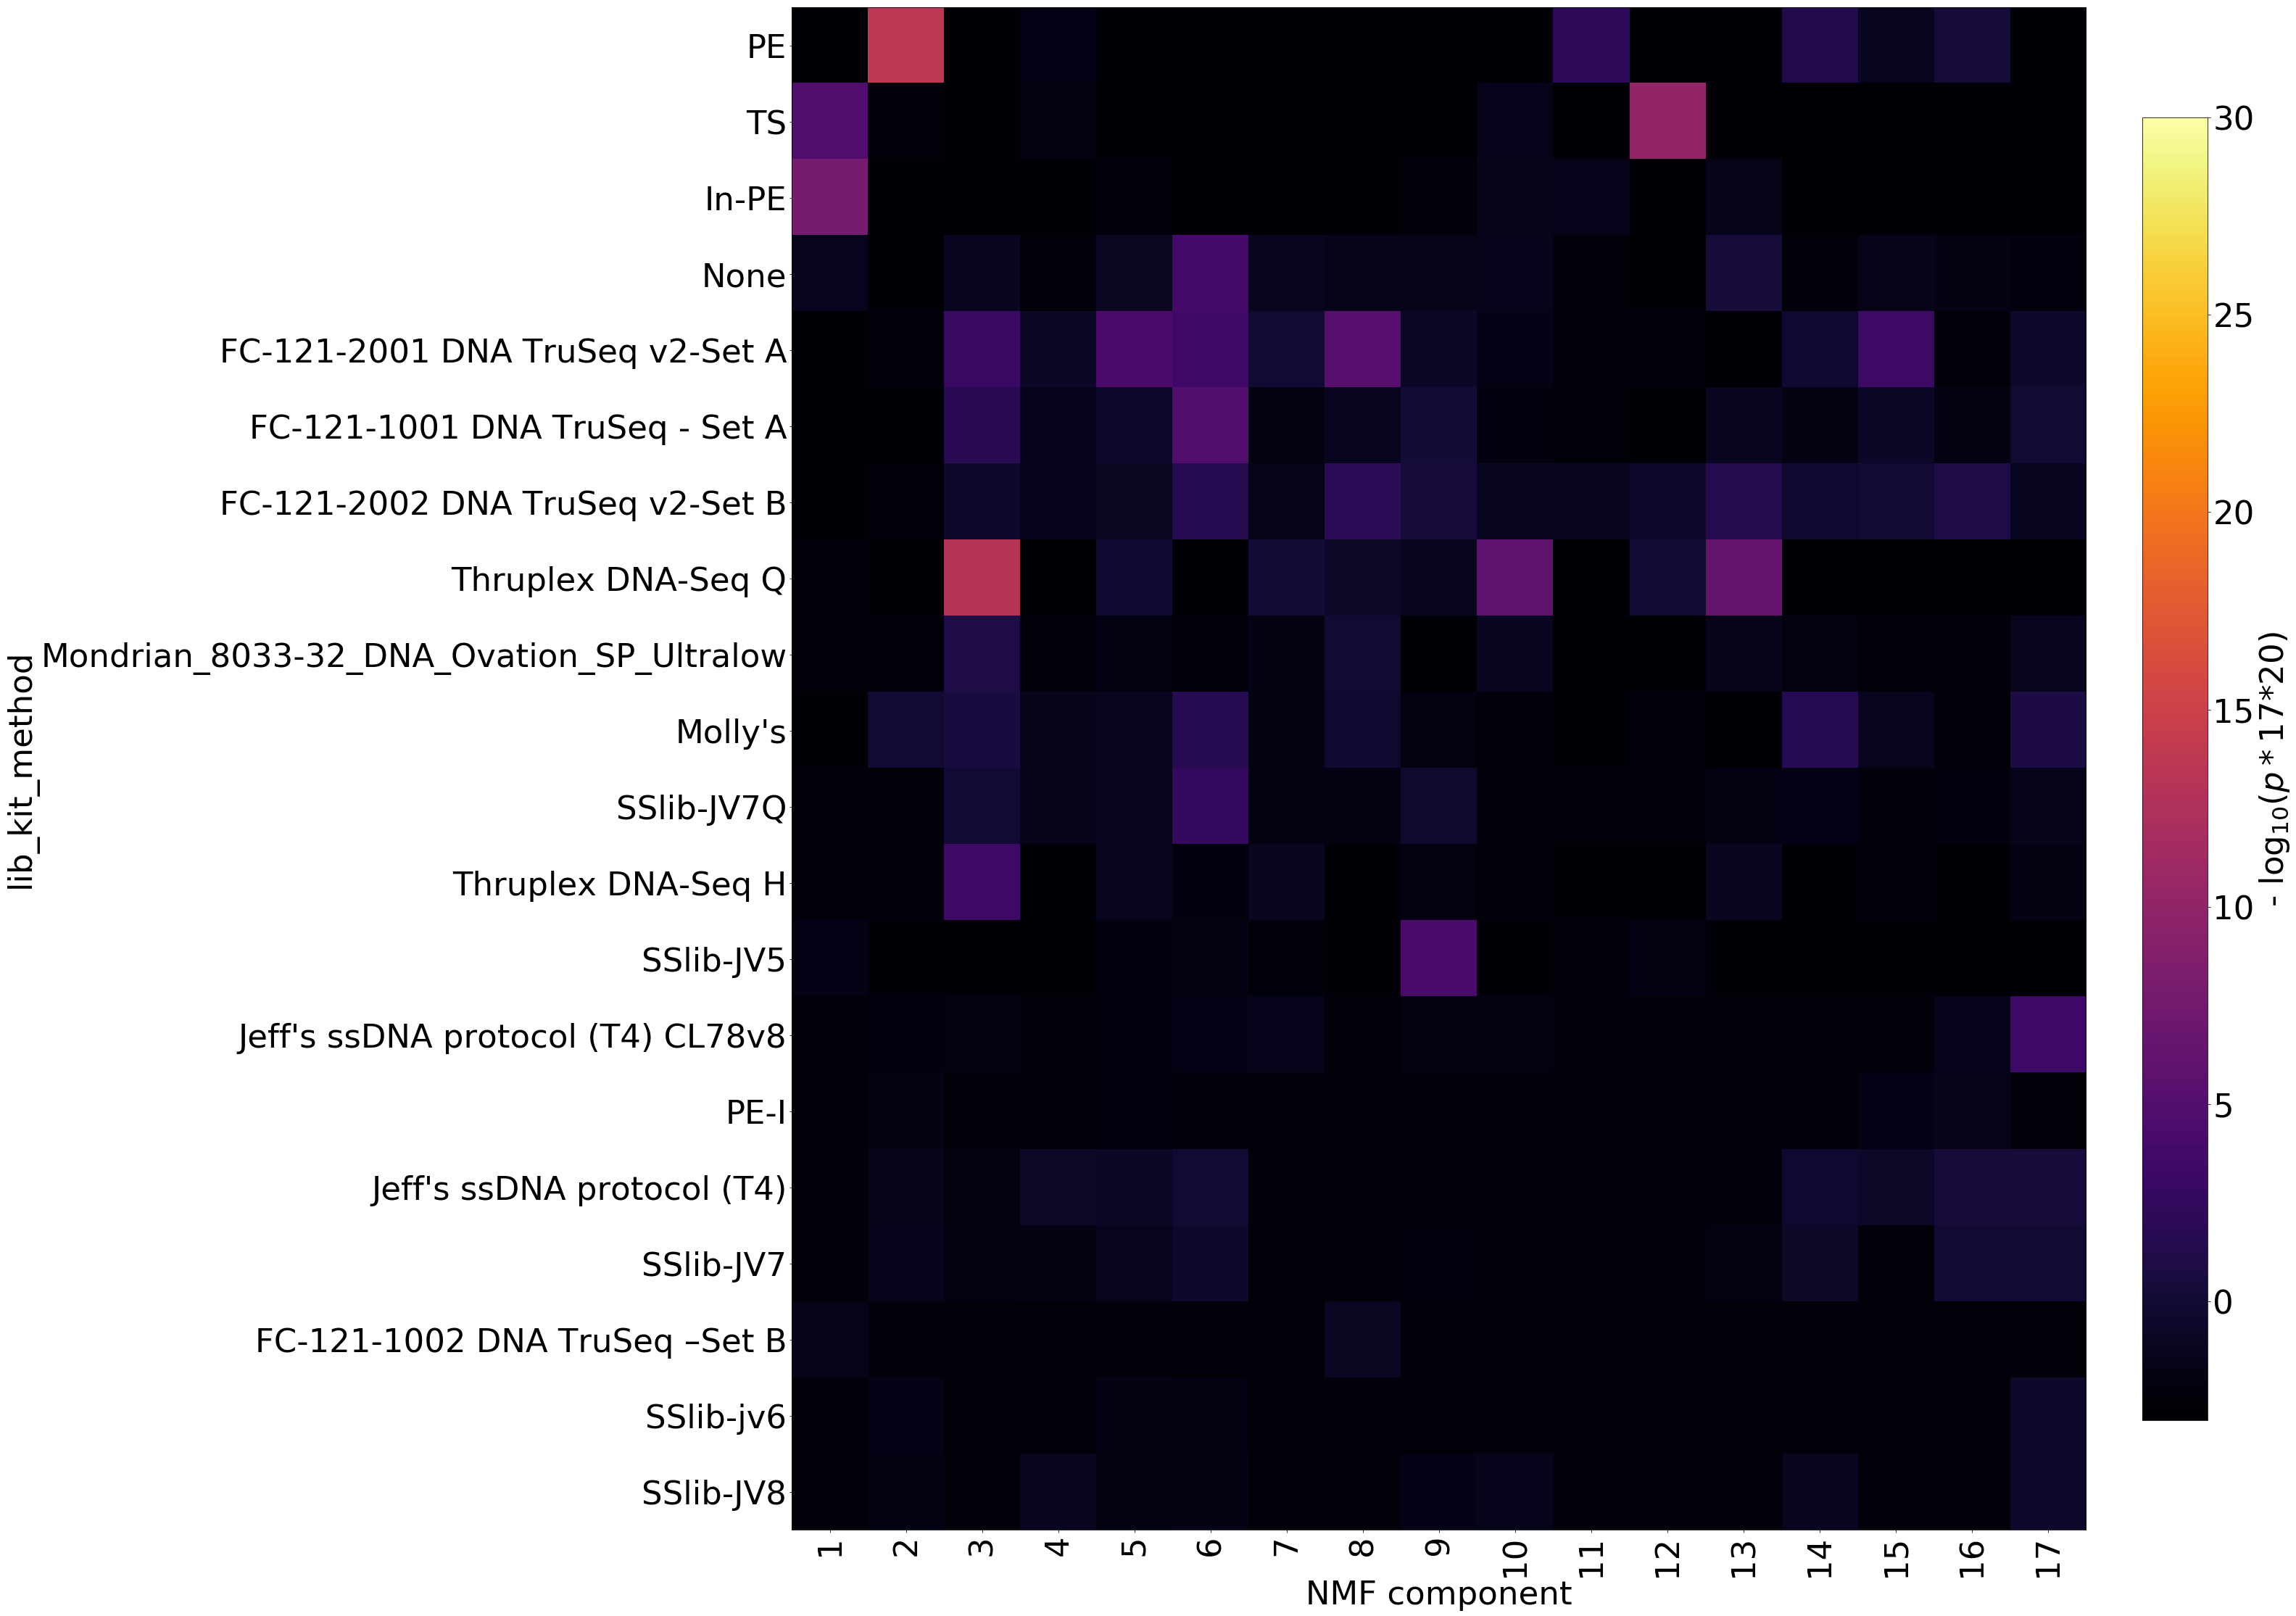

*****************
Category  0 Primary
*****************
Category  1 Cancer
*****************
Category  2 Lines


<Figure size 432x288 with 0 Axes>

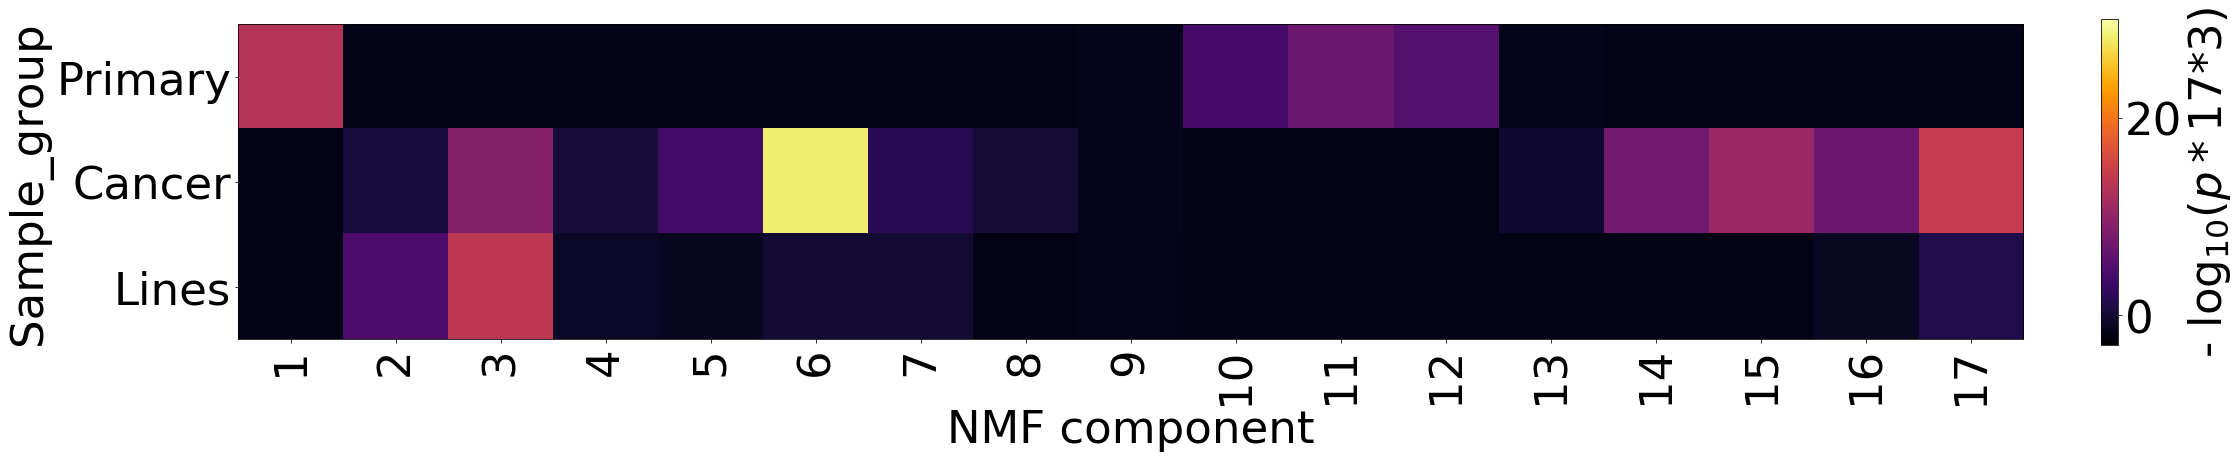

*****************
Category  0 No
*****************
Category  1 Yes


<Figure size 432x288 with 0 Axes>

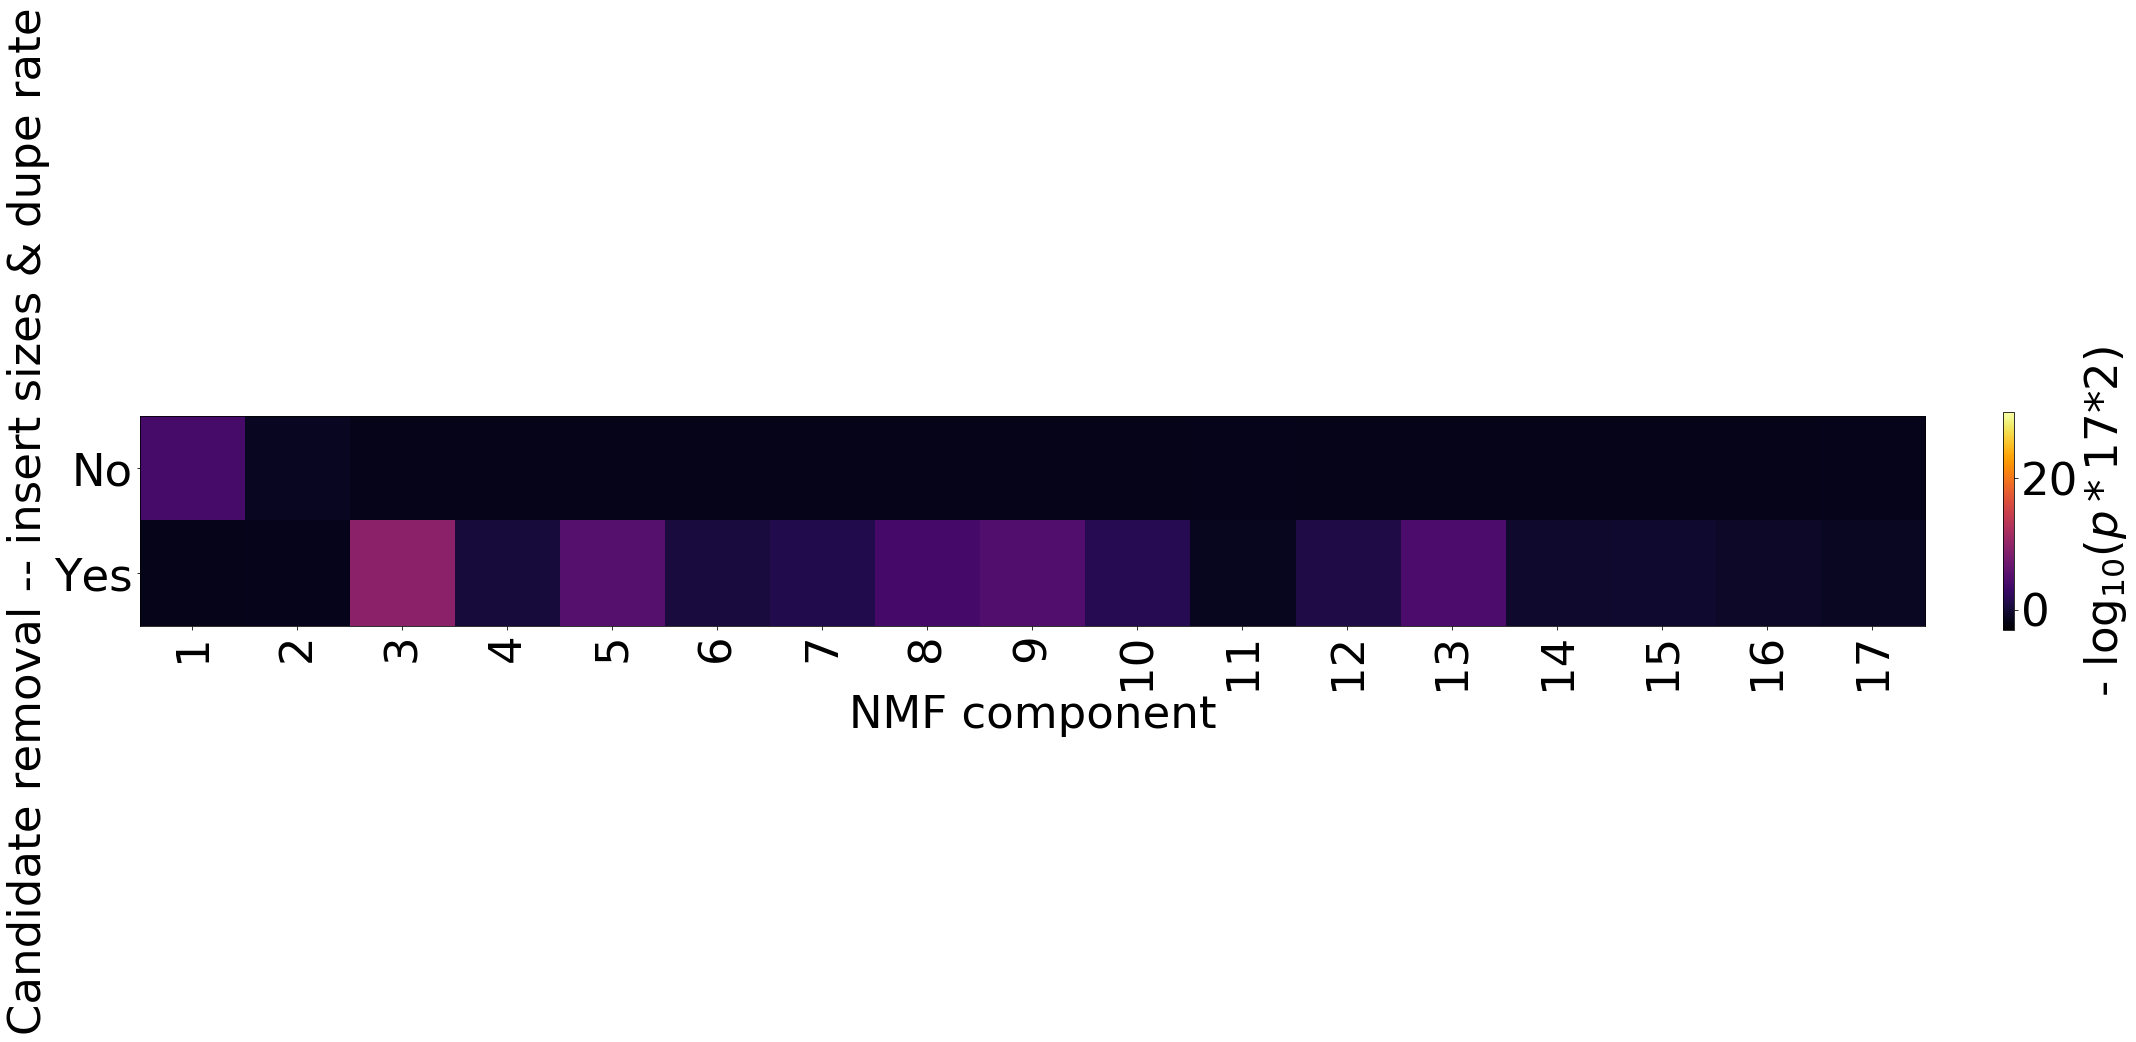

*****************
Category  0 No
*****************
Category  1 Yes


<Figure size 432x288 with 0 Axes>

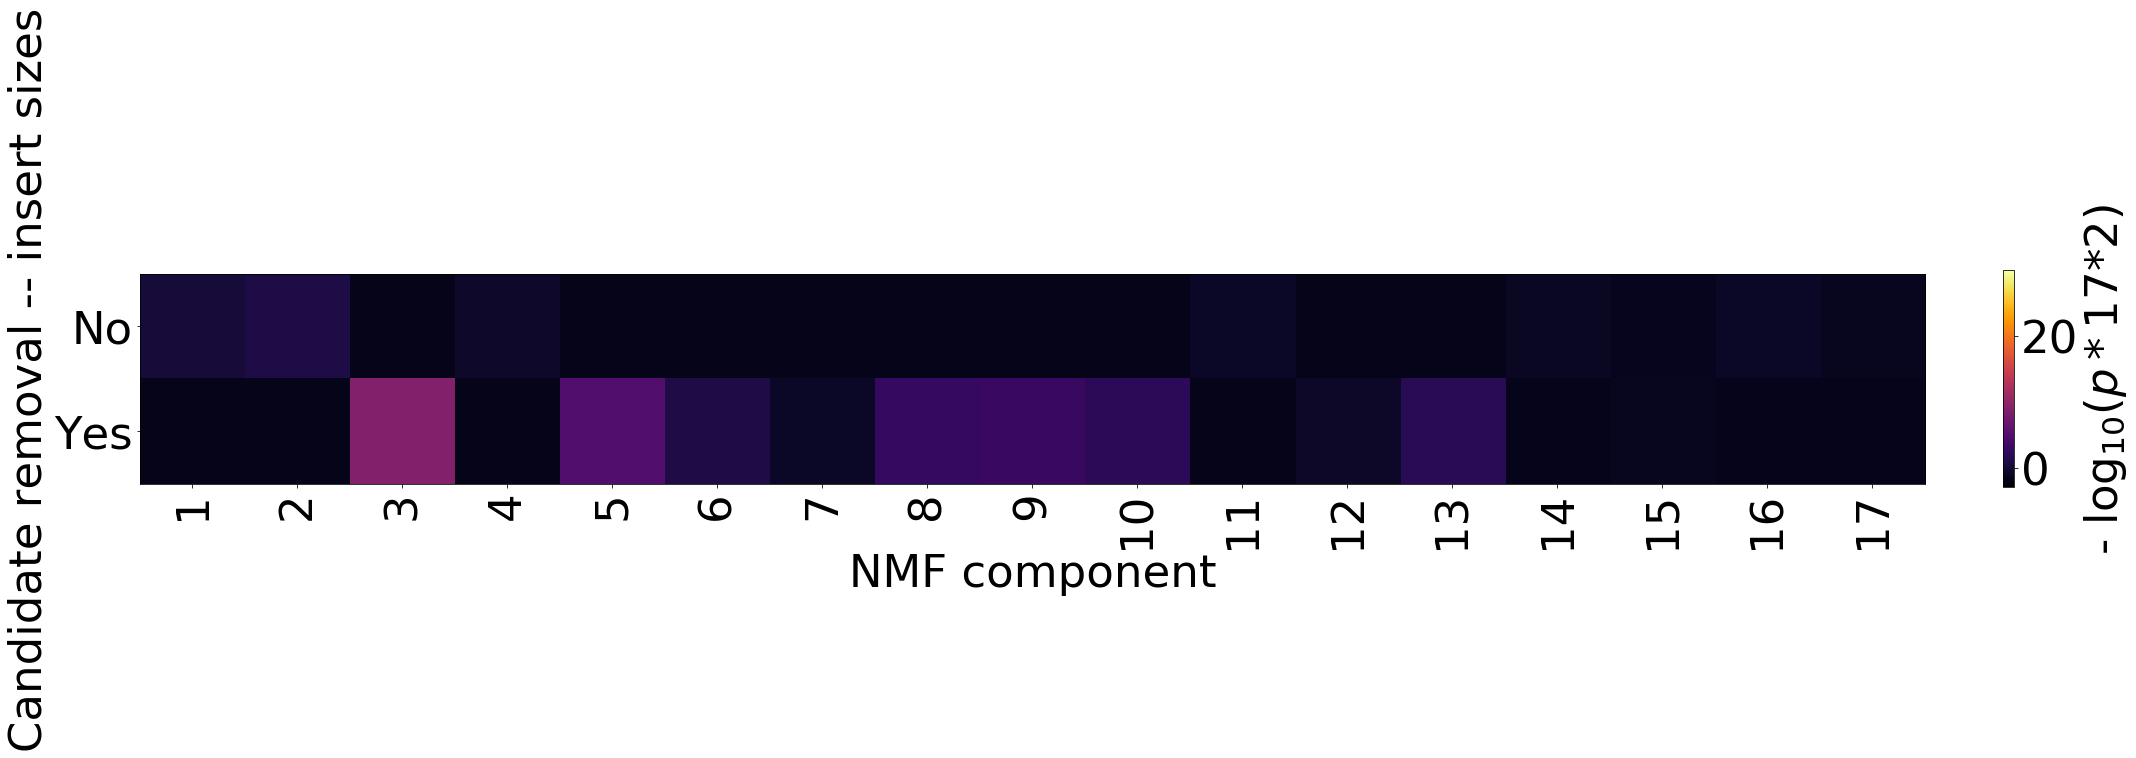

*****************
Category  0 None
*****************
Category  1 H24259
*****************
Category  2 RO 02366
*****************
Category  3 H24111
*****************
Category  4 H23887
*****************
Category  5 H23964
*****************
Category  6 H24089
*****************
Category  7 H24409
*****************
Category  8 H23604
*****************
Category  9 H25574
*****************
Category  10 H23758
*****************
Category  11 H24078
*****************
Category  12 H23914
*****************
Category  13 H24005
*****************
Category  14 H24510
*****************
Category  15 Skin 02
*****************
Category  16 RO 01701
*****************
Category  17 H24297
*****************
Category  18 H23941
*****************
Category  19 H24218


<Figure size 432x288 with 0 Axes>

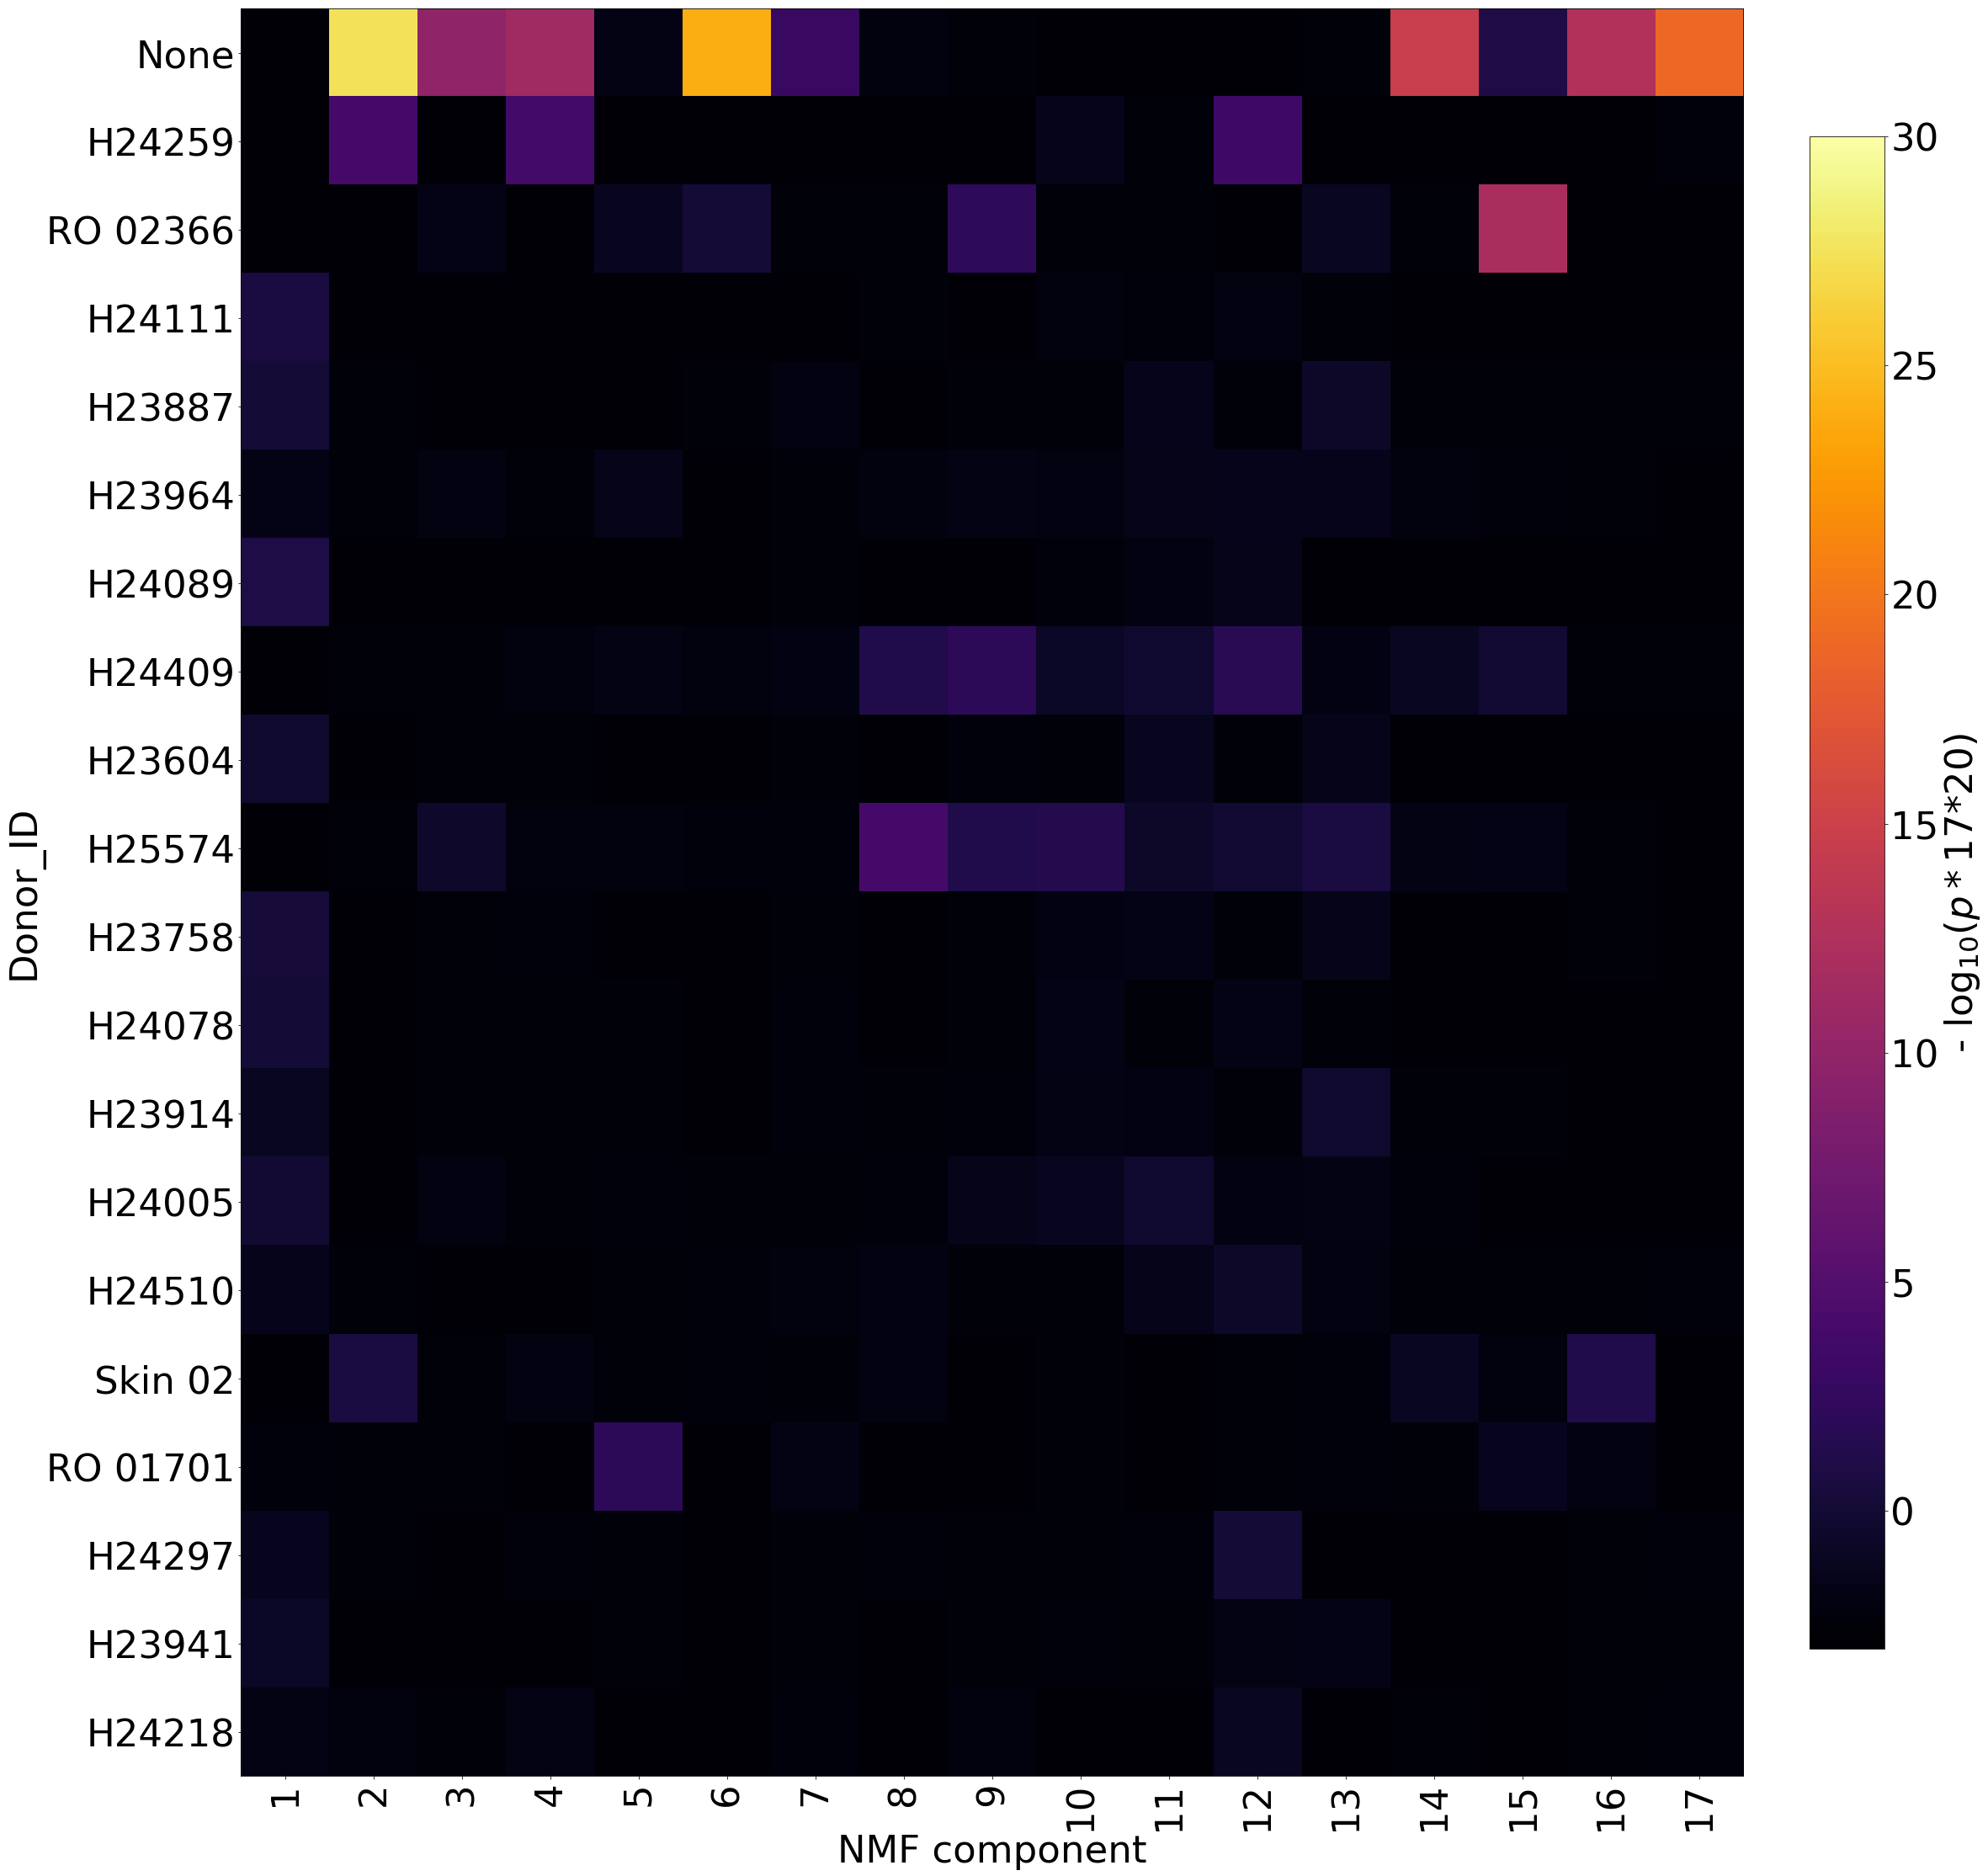

*****************
Category  0 None
*****************
Category  1 Cauc
*****************
Category  2 Afr-Am
*****************
Category  3 Hisp
*****************
Category  4 Cauc/Other


<Figure size 432x288 with 0 Axes>

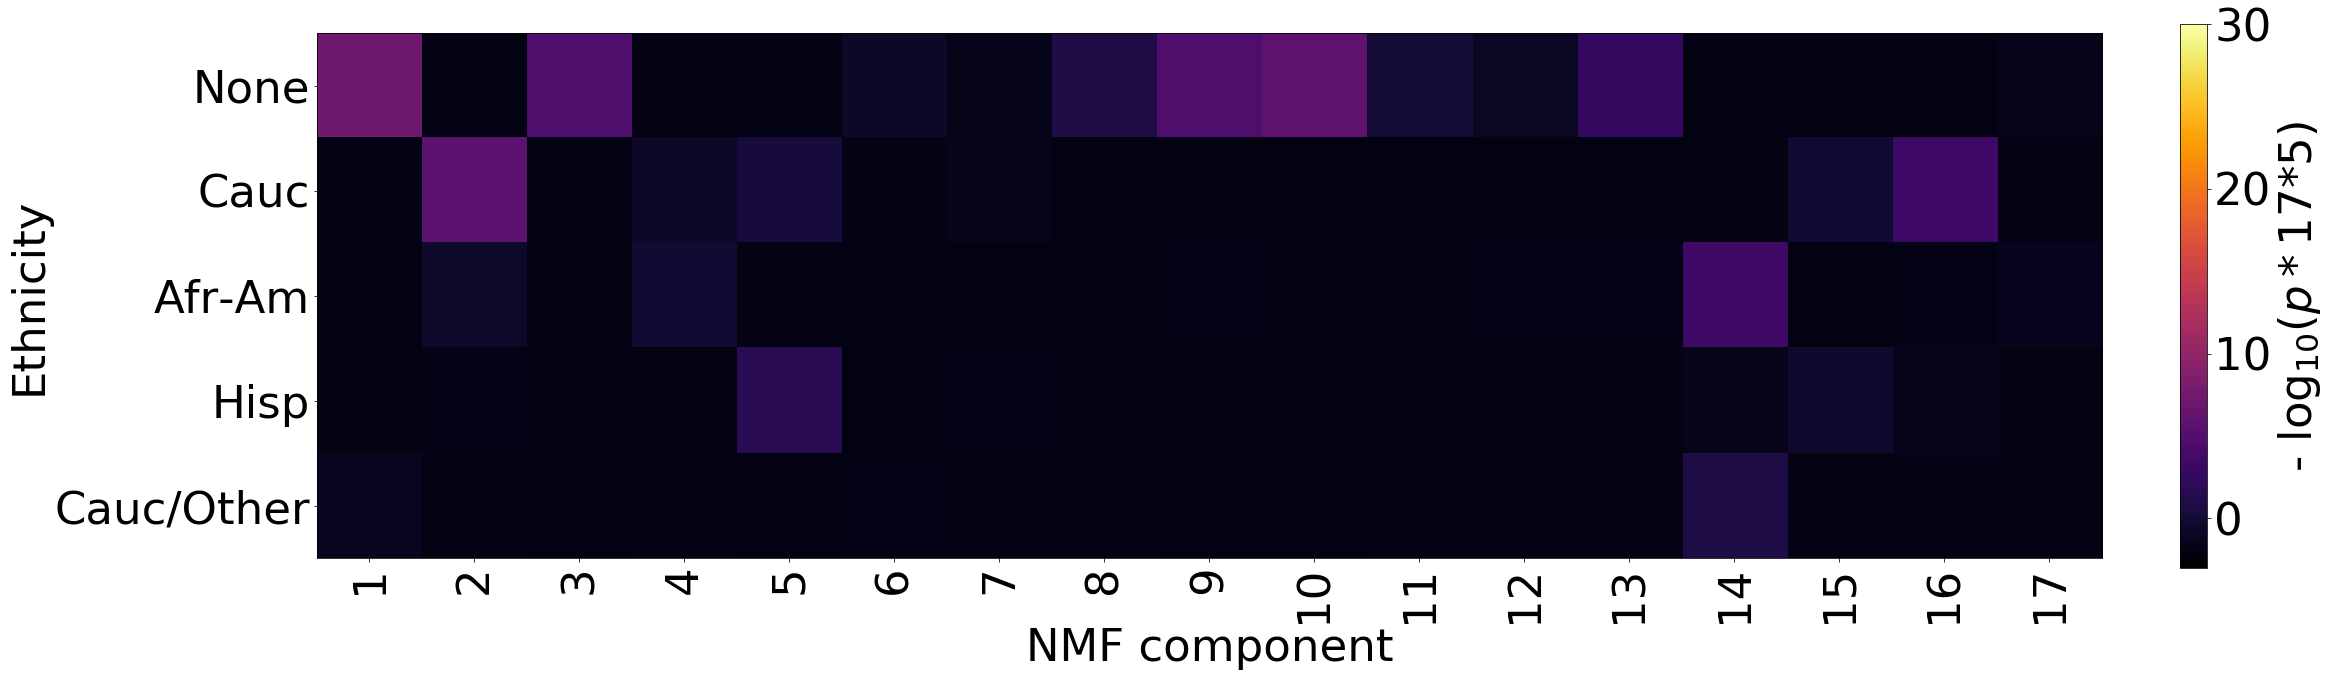

*****************
Category  0 minElute
*****************
Category  1 None
*****************
Category  2 Sucrose
*****************
Category  3 microcon
*****************
Category  4 min-elute
*****************
Category  5 new Sucrose
*****************
Category  6 micrcon
*****************
Category  7 MinElute


<Figure size 432x288 with 0 Axes>

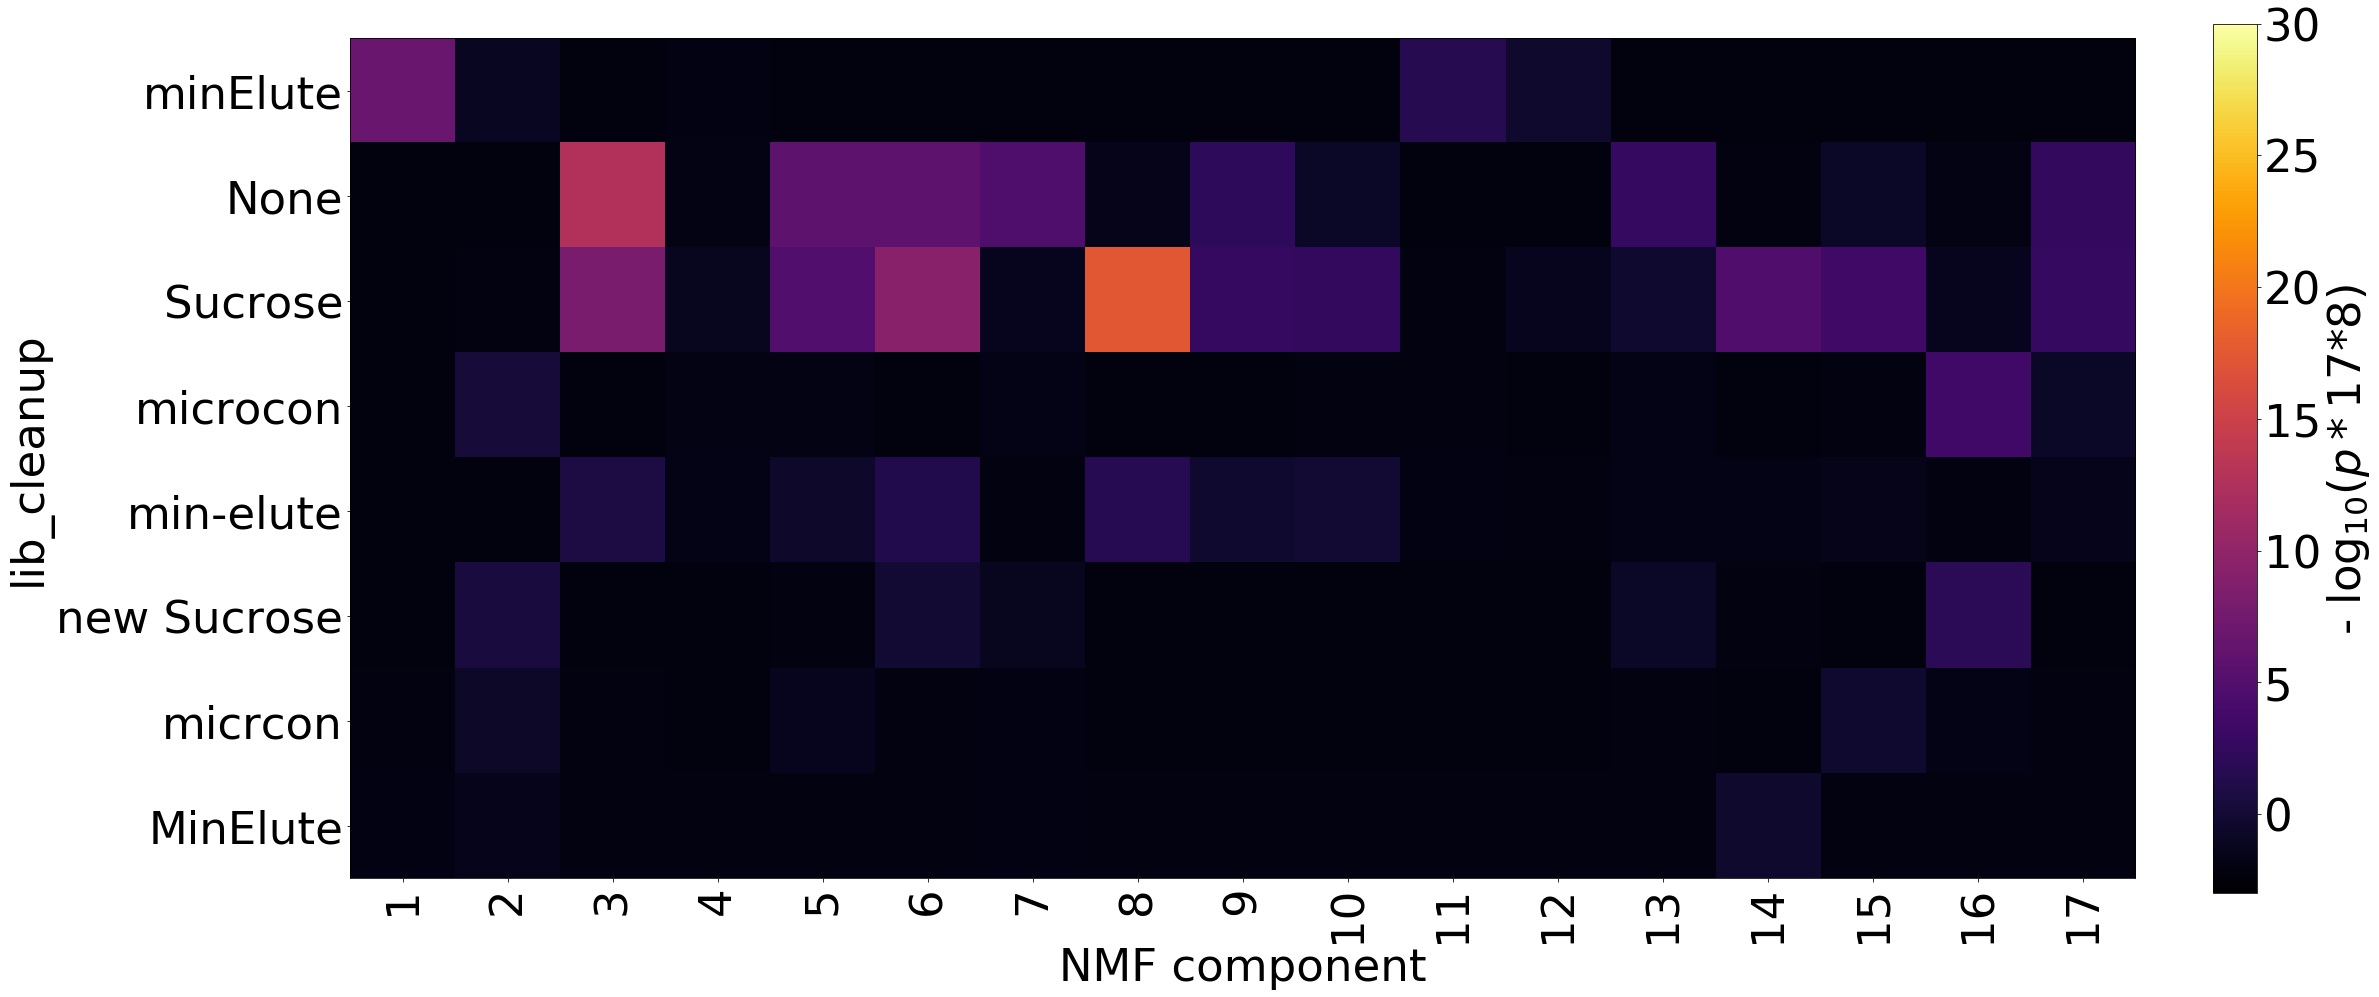

*****************
Category  0 A+Sucrose
*****************
Category  1 PBS+A
*****************
Category  2 None
*****************
Category  3 Buffer A
*****************
Category  4 PBS
*****************
Category  5 Sucrose HLB solution+A


<Figure size 432x288 with 0 Axes>

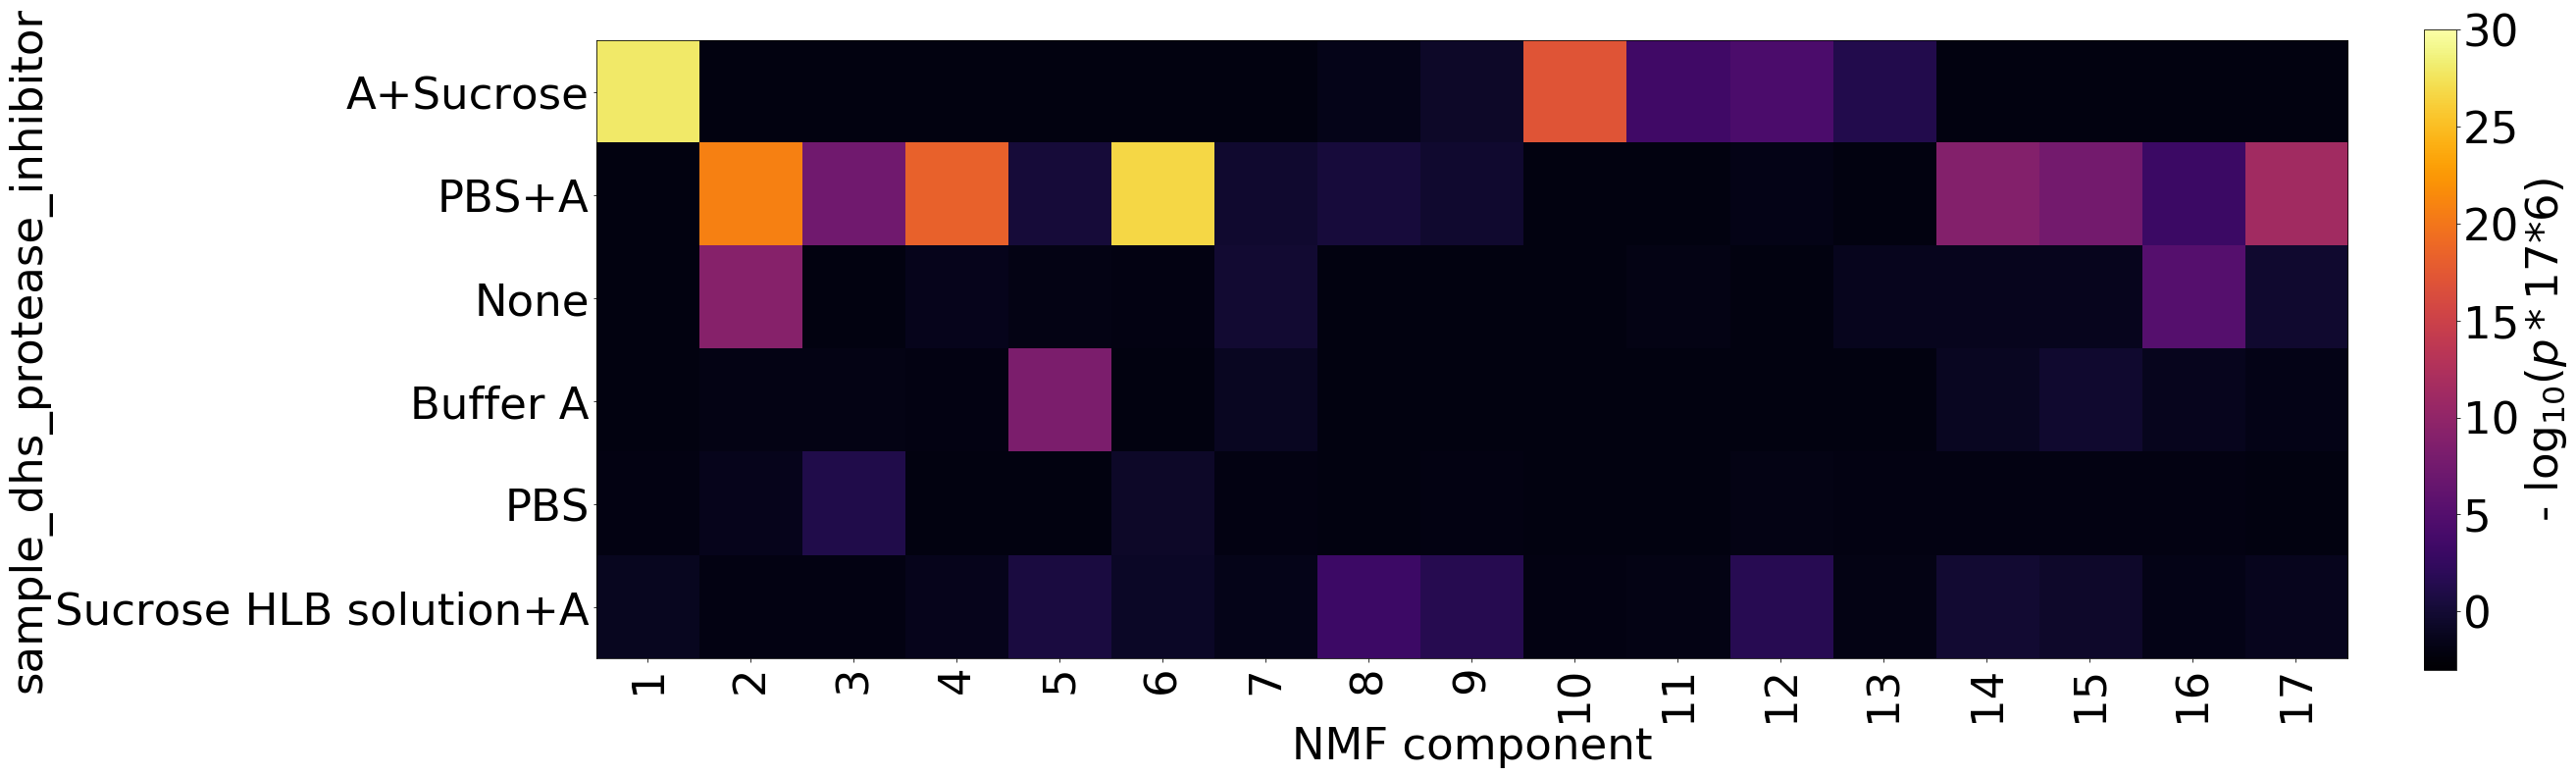

In [16]:
k=17
decomp = OONMF.NMFobject(theNcomps=k)
decomp.matrix_input_name(Basis_finname='2018-06-08NC'+str(k)+'_NNDSVD_Basis.npy')
decomp.read_matrix_input()
decomp.Basis_Names = sampnamePD.full_name.values
rosetta = OMD.get_rosetta(MetaData, decomp.Basis_Names)
for my_cat_str in categories:
    MetaData[my_cat_str].fillna('None', inplace=True)
    (SystemChart,SystemTypes) = OMD.make_significance_plot(MetaData, decomp.Basis, my_cat_str, rosetta,thecmap='inferno', NMFCOMPS=k,filename_addon='', write_mode=False)